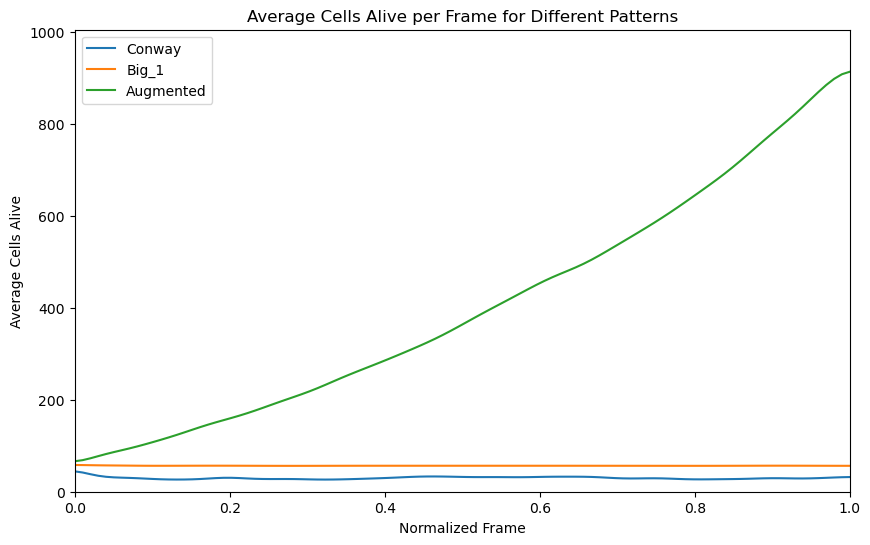

In [33]:
%run output_plotter.py

In [44]:
%run animator.py

GIF saved as game_of_life.gif


In [6]:
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def read_csv(file_path):
    frames = []
    values = []
    with open(file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            frames.append(int(row['frame']))
            values.append(float(row['average_alive_cells']))
    return frames, values

def create_graph(file_path):
    frames, values = read_csv(file_path)
    
    # Create smooth curve
    X_Y_Spline = make_interp_spline(frames, values)
    X_ = np.linspace(min(frames), max(frames), 500)
    Y_ = X_Y_Spline(X_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(X_, Y_, label='Soft Curve')
    plt.xlabel('Frame')
    plt.ylabel('Average Cells Alive')
    plt.title(f'Average Cells Alive per Frame\n{file_path}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the graph
    output_file = file_path.rsplit('.', 1)[0] + '_graph.png'
    plt.savefig(output_file)
    plt.close()
    print(f"Graph saved as {output_file}")

def main():
    systems = ["augmented", "big1", "conway"]
    steps = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]
    for system in systems:
        for step in steps:
            
            file_pattern = "../GOF/"+system+"_"+step+"_*.csv"
            file_names = glob.glob(file_pattern)
    
            if not file_names:
                print(f"No files found matching the pattern: {file_pattern}")
                return
    
            for file_name in file_names:
                create_graph(file_name)
    
            print(f"Processed {len(file_names)} files.")

if __name__ == "__main__":
    main()

Graph saved as ../GOF/augmented_0.2_5_graph.png
Graph saved as ../GOF/augmented_0.2_4_graph.png
Graph saved as ../GOF/augmented_0.2_6_graph.png
Graph saved as ../GOF/augmented_0.2_10_graph.png
Graph saved as ../GOF/augmented_0.2_8_graph.png
Graph saved as ../GOF/augmented_0.2_9_graph.png
Graph saved as ../GOF/augmented_0.2_2_graph.png
Graph saved as ../GOF/augmented_0.2_1_graph.png
Graph saved as ../GOF/augmented_0.2_7_graph.png
Graph saved as ../GOF/augmented_0.2_3_graph.png
Processed 10 files.
Graph saved as ../GOF/augmented_0.3_3_graph.png
Graph saved as ../GOF/augmented_0.3_6_graph.png
Graph saved as ../GOF/augmented_0.3_9_graph.png
Graph saved as ../GOF/augmented_0.3_10_graph.png
Graph saved as ../GOF/augmented_0.3_5_graph.png
Graph saved as ../GOF/augmented_0.3_7_graph.png
Graph saved as ../GOF/augmented_0.3_8_graph.png
Graph saved as ../GOF/augmented_0.3_2_graph.png
Graph saved as ../GOF/augmented_0.3_4_graph.png
Graph saved as ../GOF/augmented_0.3_1_graph.png
Processed 10 files

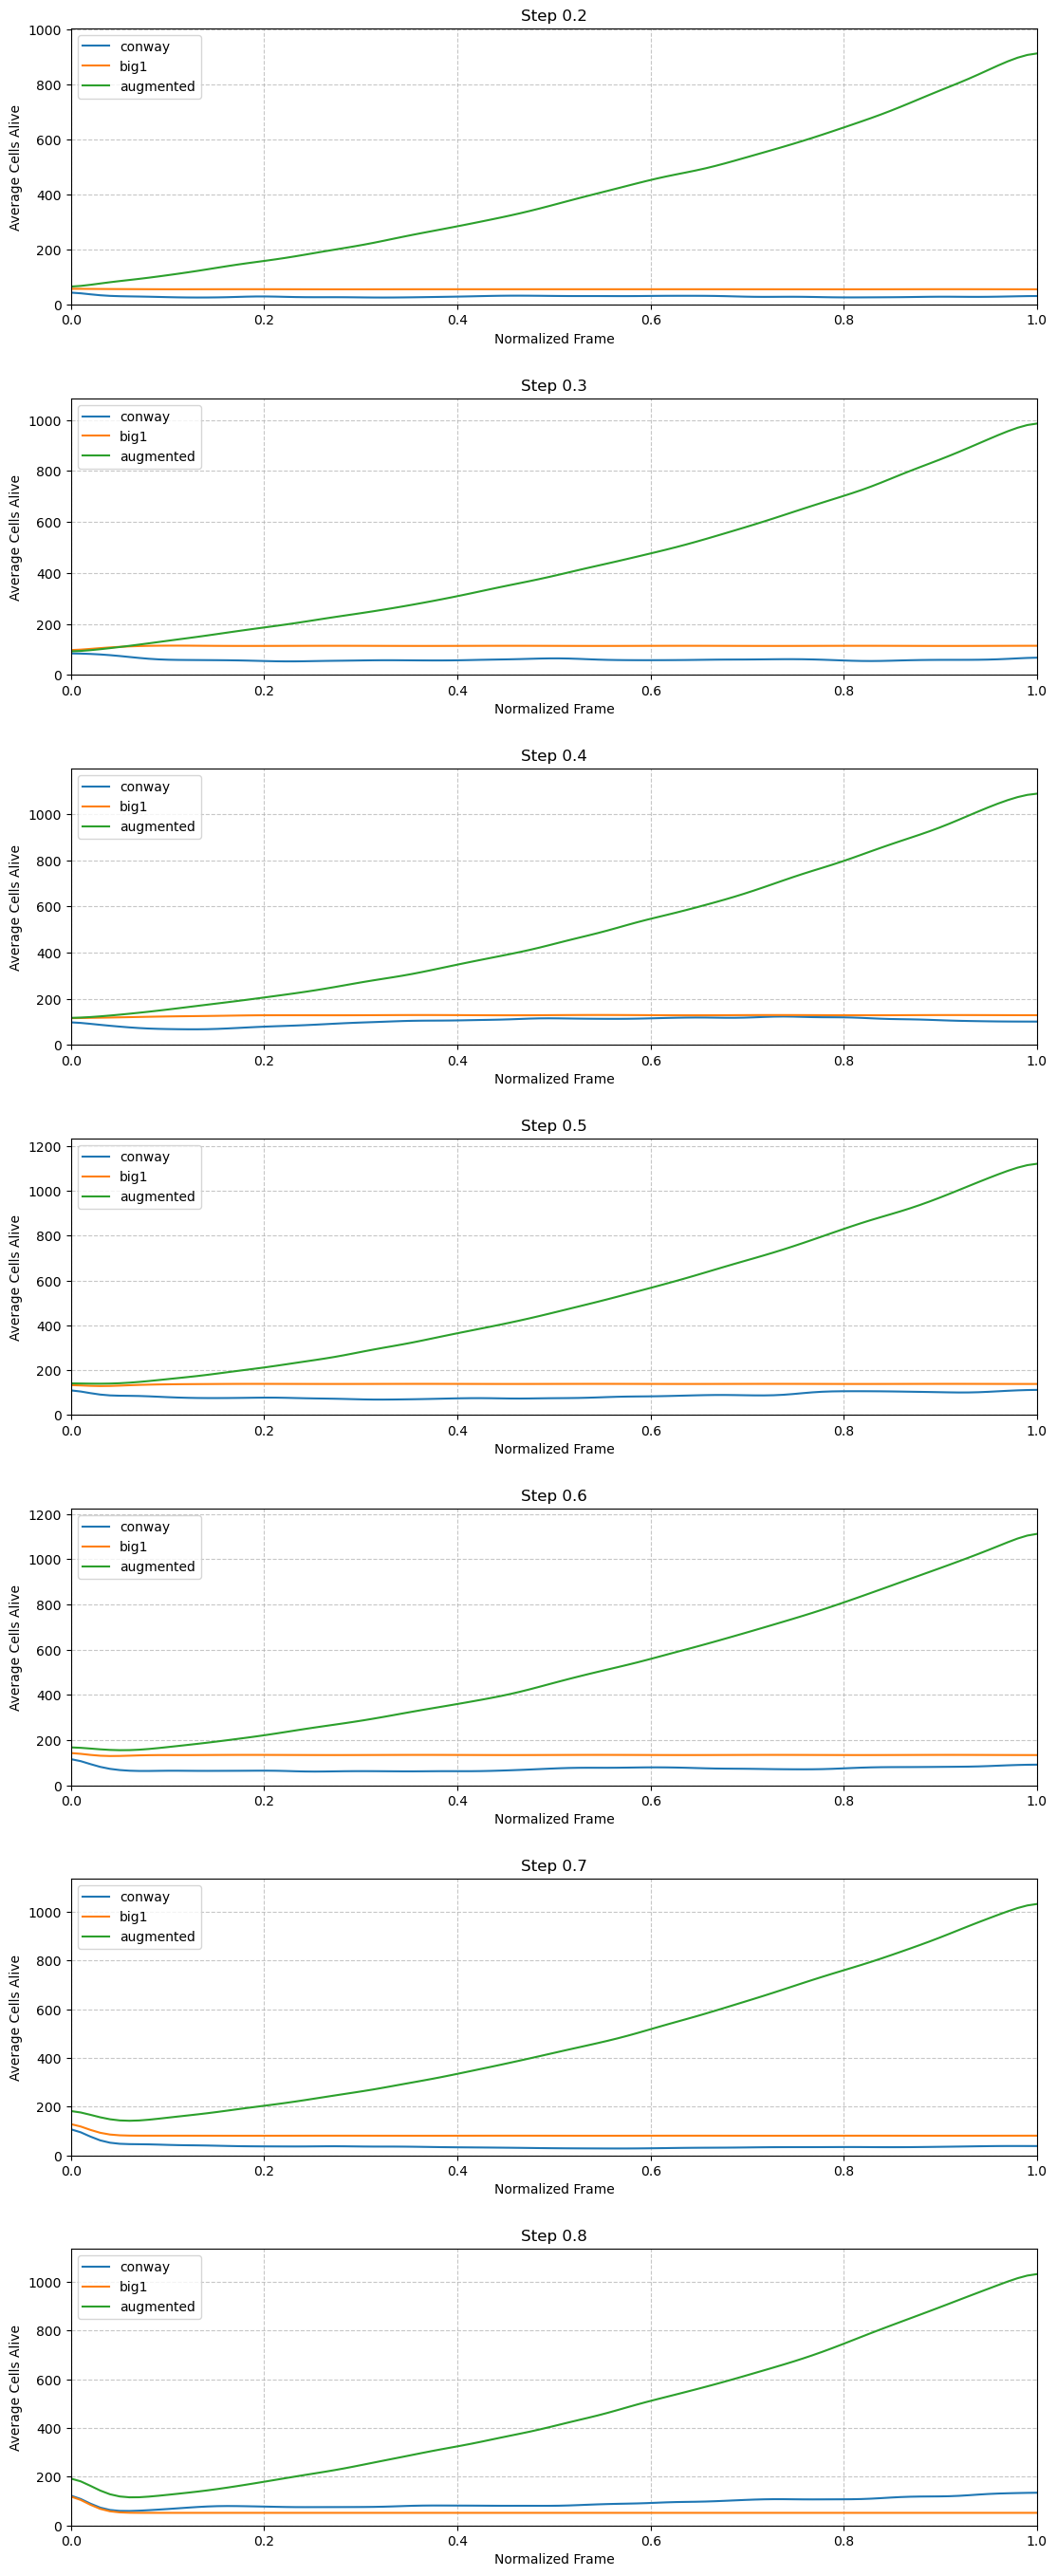

In [35]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

# Function to process each file pattern and return interpolated and smoothed data
def process_files(file_pattern, label):
    file_names = glob.glob(file_pattern)
    data = []

    for file_name in file_names:
        df = pd.read_csv(file_name)
        cells_alive = df["average_alive_cells"].values
        data.append(cells_alive)

    normalized_data = []
    for dataset in data:
        frames = np.linspace(0, 1, len(dataset))
        normalized_data.append((frames, dataset))

    common_frames = np.linspace(0, 1, 100)

    interpolated_data = []
    for frames, cells in normalized_data:
        interpolation_function = interp1d(
            frames, cells, kind="linear", fill_value="extrapolate"
        )
        interpolated_data.append(interpolation_function(common_frames))

    average_cells = np.mean(interpolated_data, axis=0)
    smooth_average_cells = gaussian_filter1d(average_cells, sigma=2)

    return common_frames, smooth_average_cells, label

# Define file patterns grouped by step
steps = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]
systems = ["conway", "big1", "augmented"]
file_patterns_by_step = {step: [f"../GOF/{system}_{step}_*.csv" for system in systems] for step in steps}

# Create a grid of subplots (one row per step)
fig, axes = plt.subplots(len(steps), 1, figsize=(12, 4 * len(steps)))
fig.tight_layout(pad=5.0)  # Adjust space between subplots

# Plot each step in its respective subplot
for ax, (step, file_patterns) in zip(axes, file_patterns_by_step.items()):
    max_y_values = []
    
    for file_pattern in file_patterns:
        # Extract the system label from the pattern
        system_label = file_pattern.split('/')[-1].split('_')[0]

        frames, smooth_cells, label = process_files(file_pattern, system_label)
        ax.plot(frames, smooth_cells, label=label)
        max_y_values.append(max(smooth_cells))

    # Set limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(max_y_values) * 1.1)
    ax.set_xlabel("Normalized Frame")
    ax.set_ylabel("Average Cells Alive")
    ax.set_title(f"Step {step}")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Show all plots
plt.show()


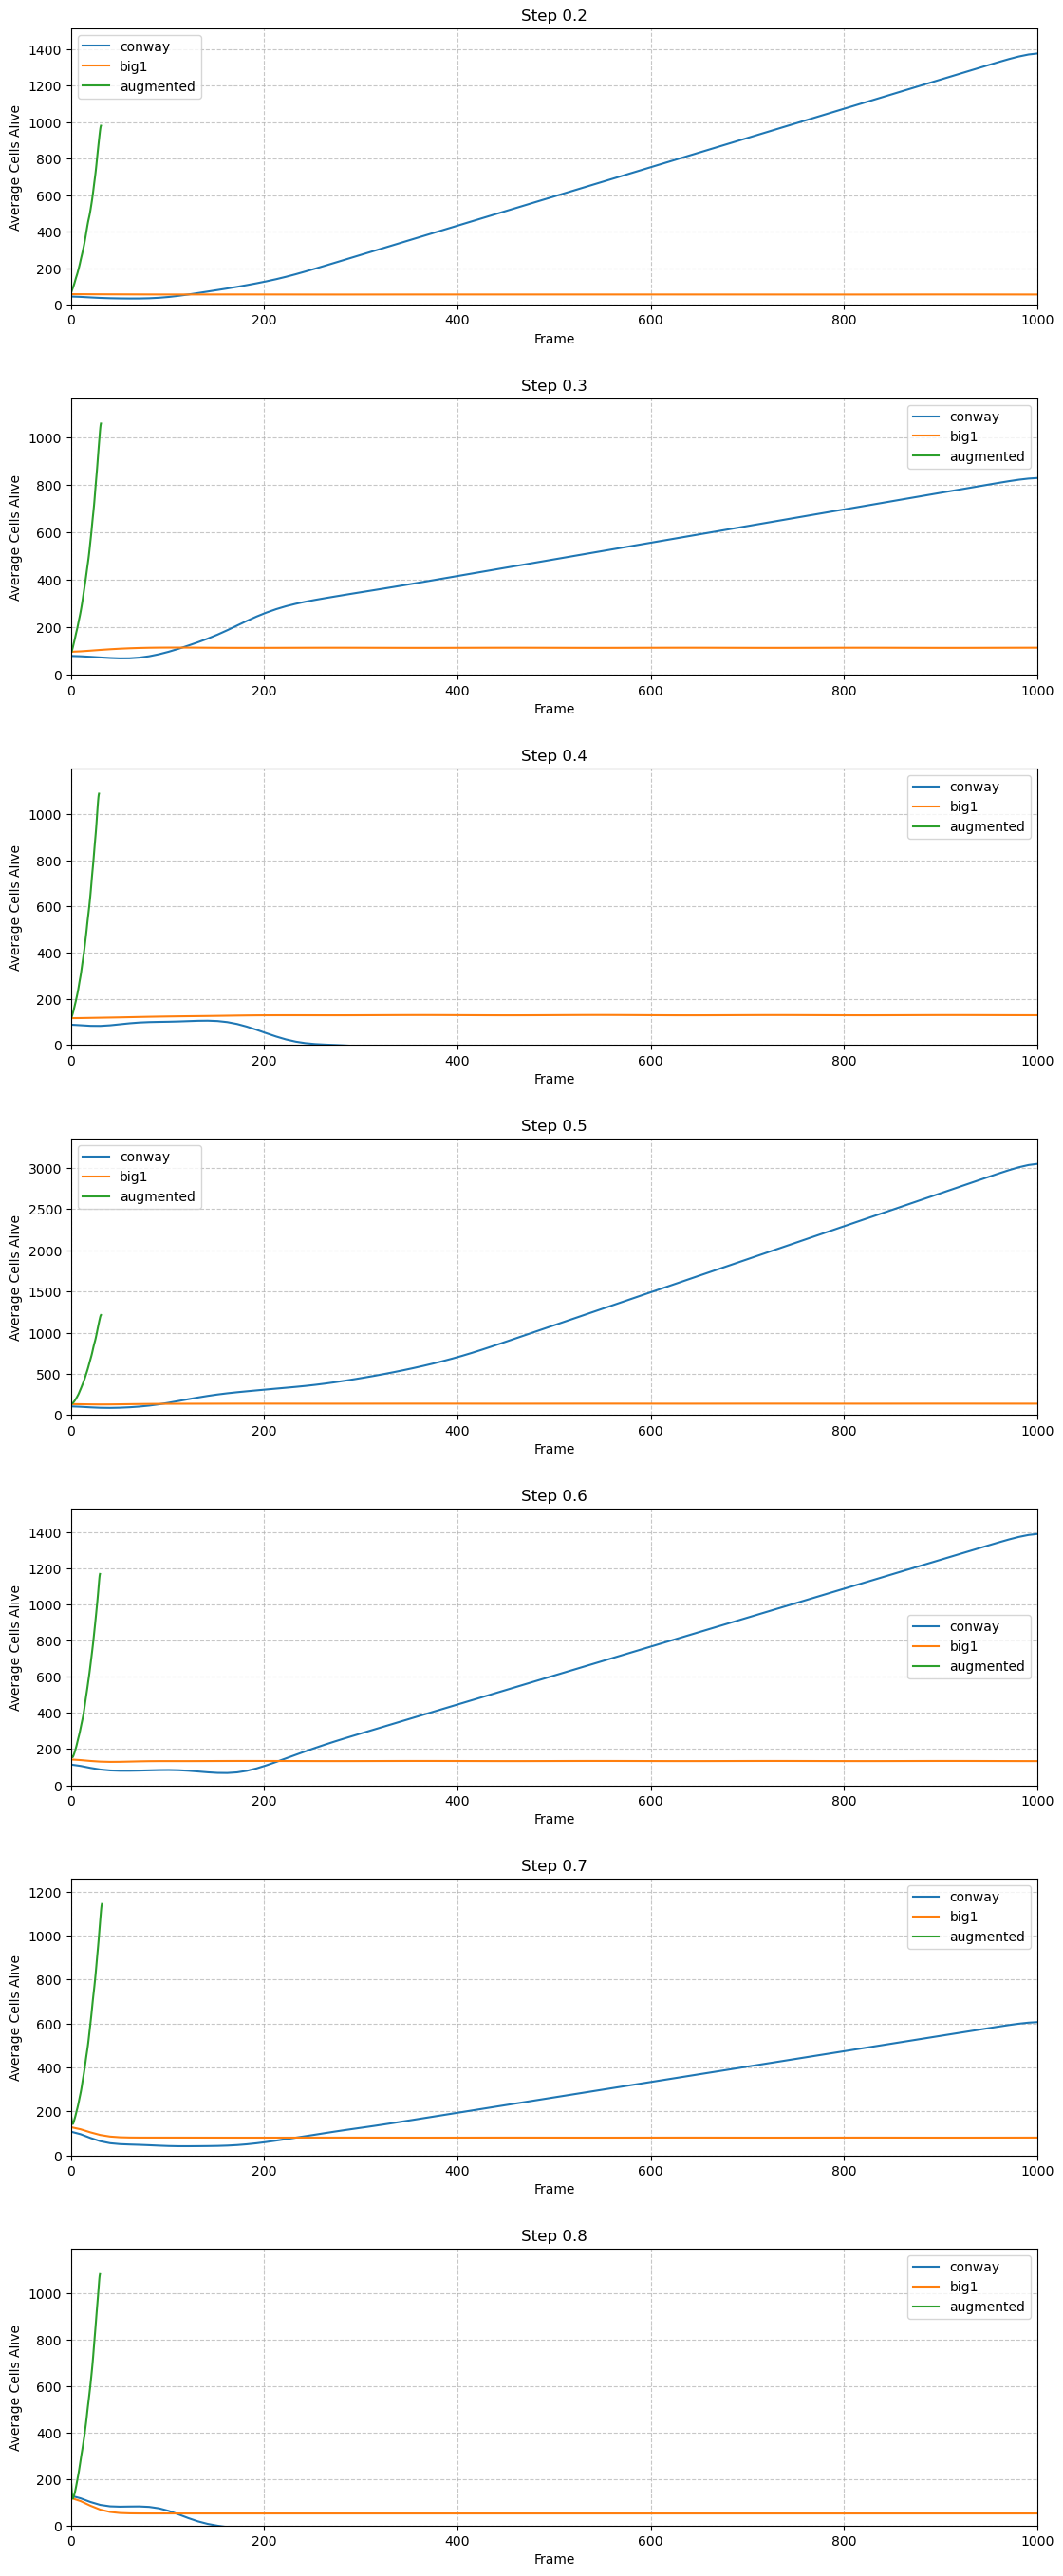

In [36]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

# Function to process each file pattern and return interpolated and smoothed data
def process_files(file_pattern, label):
    file_names = glob.glob(file_pattern)
    data = []

    for file_name in file_names:
        df = pd.read_csv(file_name)
        frames = df["frame"].values  # Read the frame numbers directly
        cells_alive = df["average_alive_cells"].values
        data.append((frames, cells_alive))

    # Determine the maximum number of frames across all files
    max_frames = max(max(frames) for frames, _ in data)
    
    # Prepare for interpolation
    common_frames = np.linspace(0, max_frames, 100)  # 100 points from 0 to max_frames

    interpolated_data = []
    for frames, cells in data:
        interpolation_function = interp1d(
            frames, cells, kind="linear", fill_value="extrapolate"
        )
        interpolated_data.append(interpolation_function(common_frames))

    average_cells = np.mean(interpolated_data, axis=0)
    smooth_average_cells = gaussian_filter1d(average_cells, sigma=2)

    return common_frames, smooth_average_cells, label

# Define file patterns grouped by step
steps = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]
systems = ["conway", "big1", "augmented"]
file_patterns_by_step = {step: [f"../GOF/{system}_{step}_*.csv" for system in systems] for step in steps}

# Create a grid of subplots (one row per step)
fig, axes = plt.subplots(len(steps), 1, figsize=(12, 4 * len(steps)))
fig.tight_layout(pad=5.0)  # Adjust space between subplots

# Plot each step in its respective subplot
for ax, (step, file_patterns) in zip(axes, file_patterns_by_step.items()):
    max_y_values = []
    
    for file_pattern in file_patterns:
        # Extract the system label from the pattern
        system_label = file_pattern.split('/')[-1].split('_')[0]

        frames, smooth_cells, label = process_files(file_pattern, system_label)
        ax.plot(frames, smooth_cells, label=label)
        max_y_values.append(max(smooth_cells))

    # Set limits and labels
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, max(max_y_values) * 1.1)
    ax.set_xlabel("Frame")
    ax.set_ylabel("Average Cells Alive")
    ax.set_title(f"Step {step}")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Show all plots
plt.show()


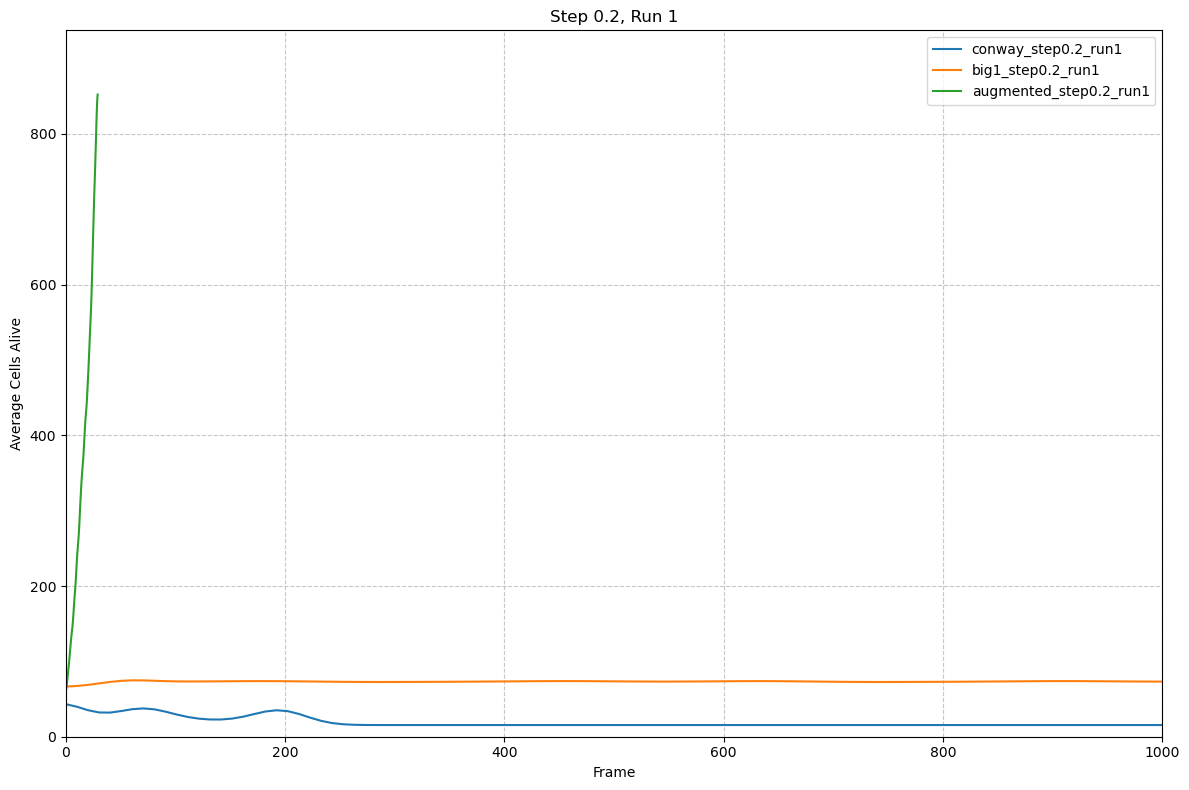

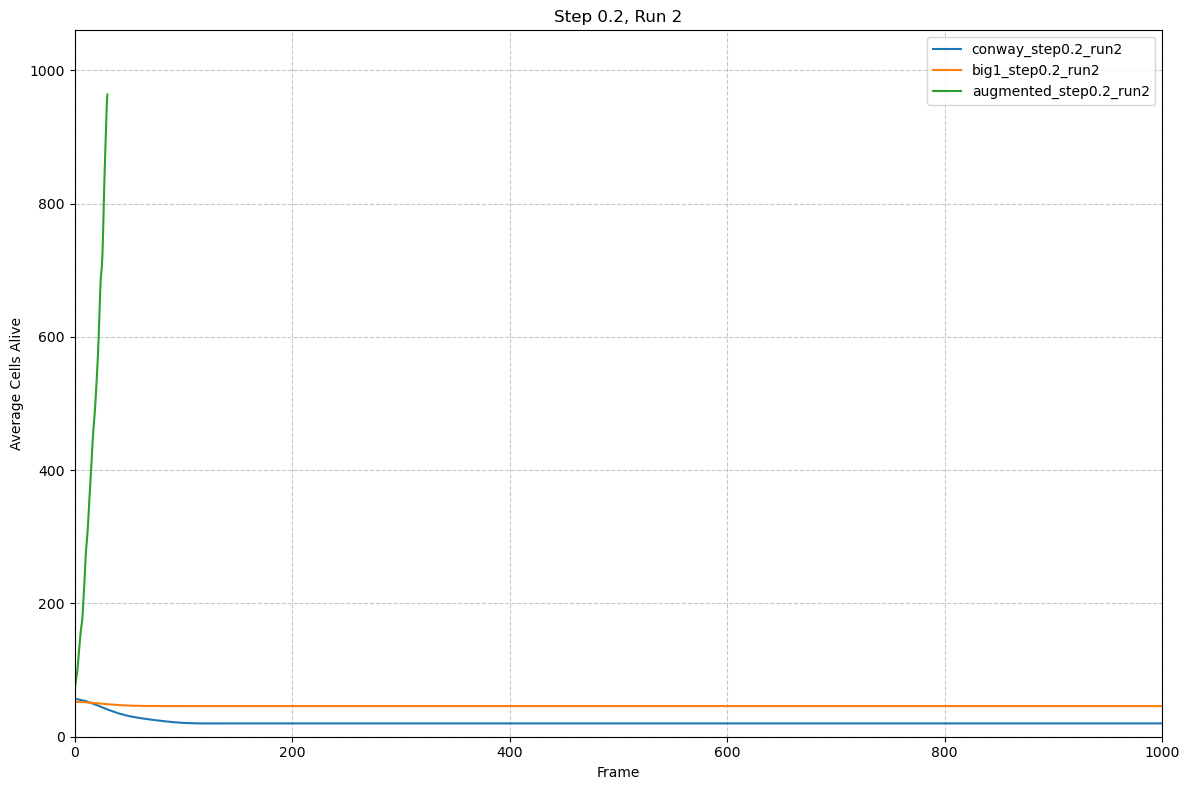

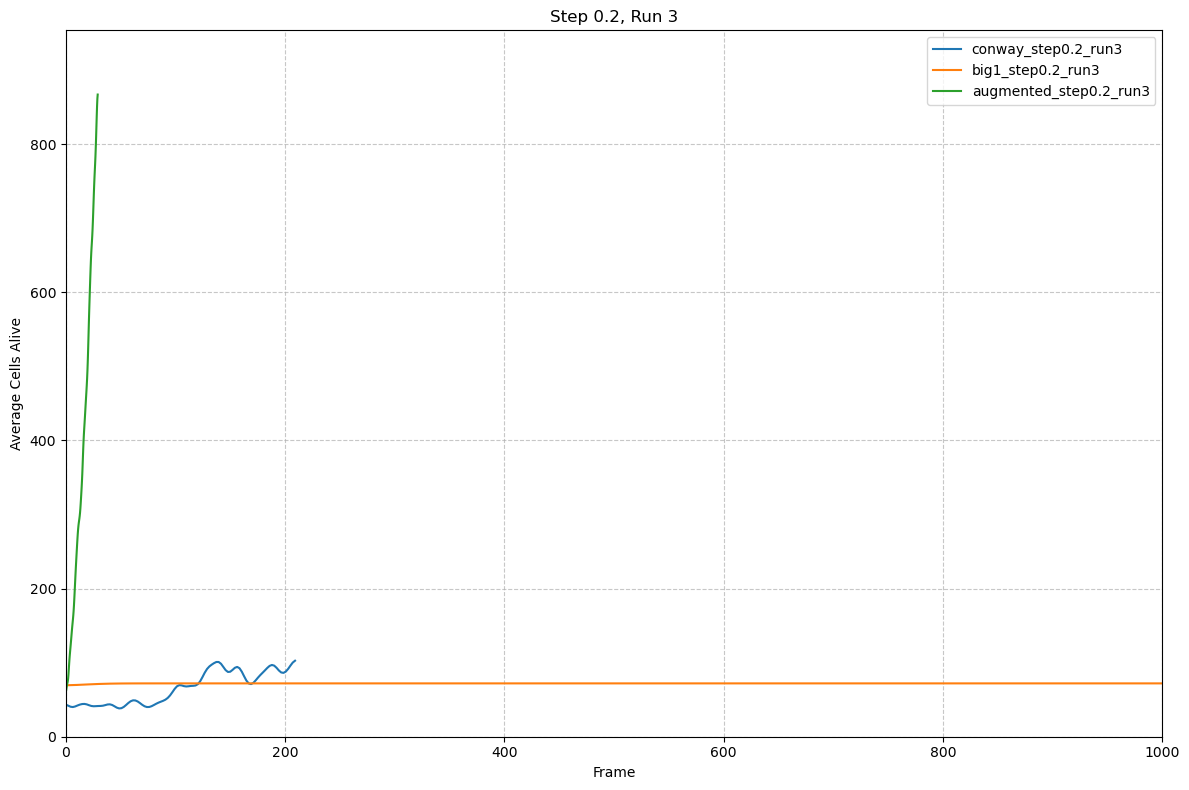

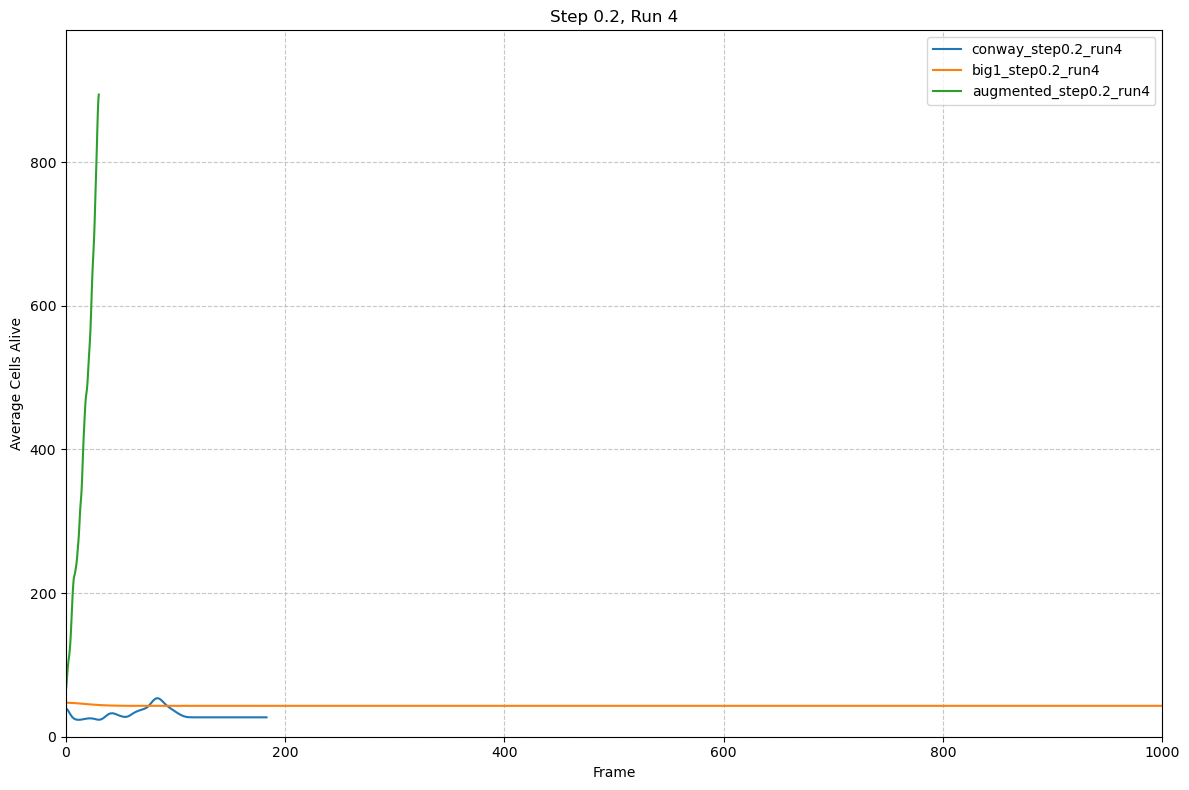

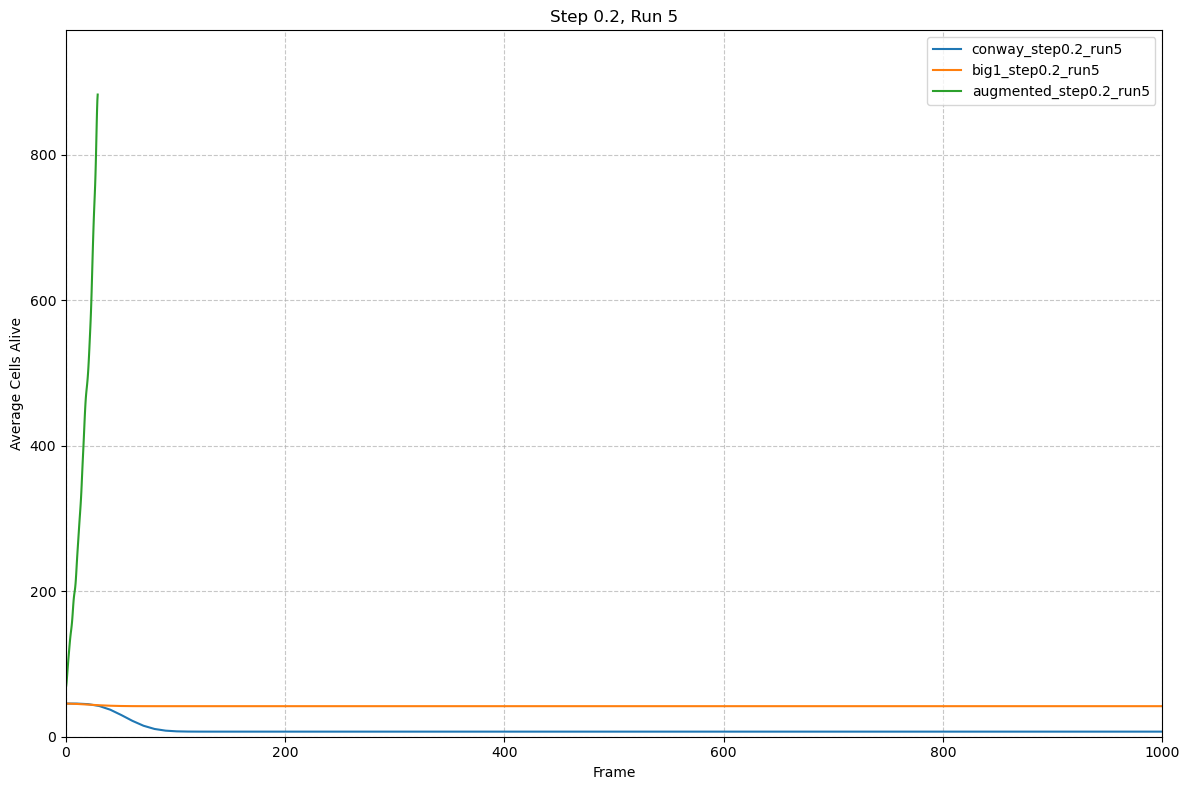

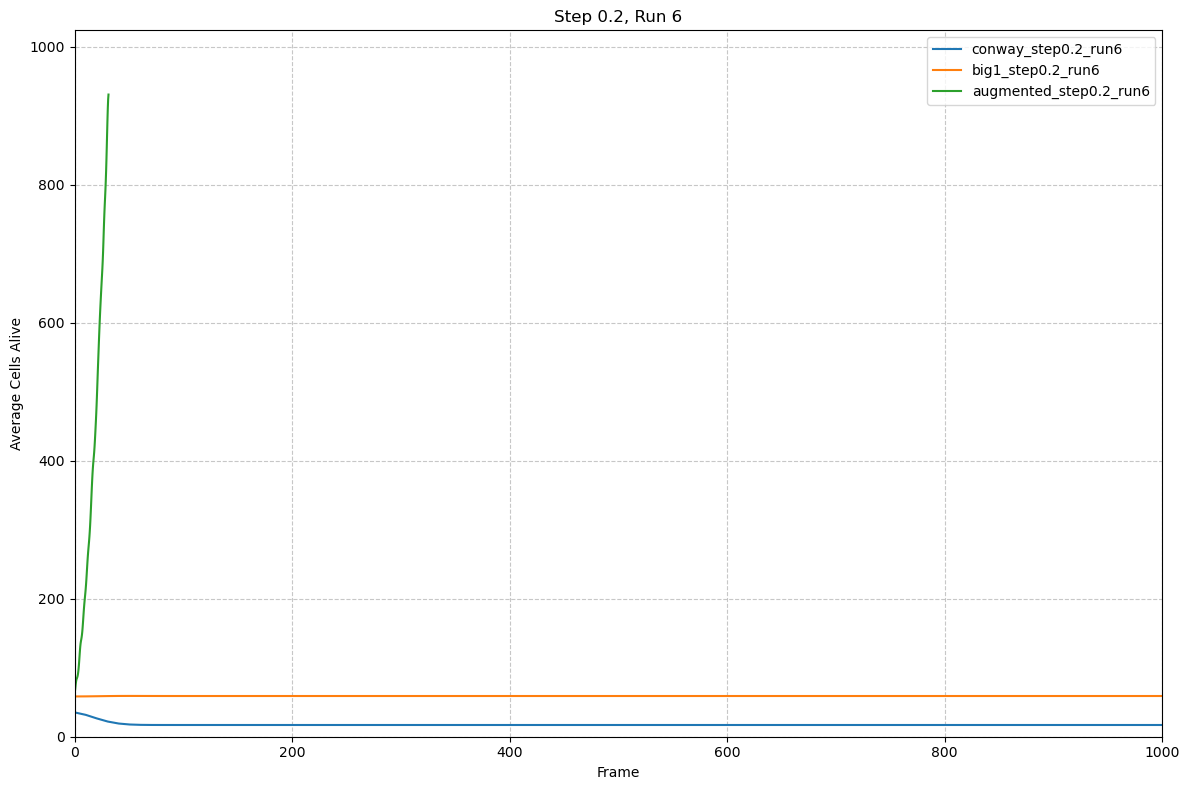

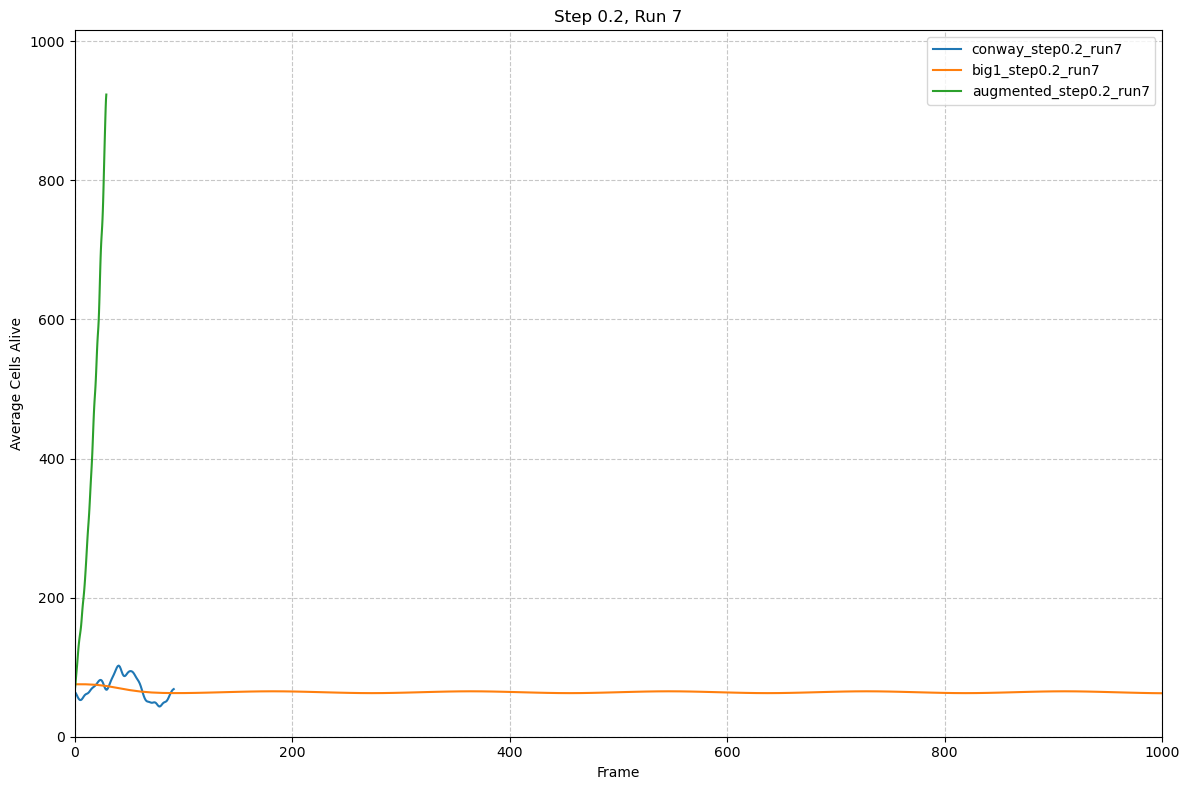

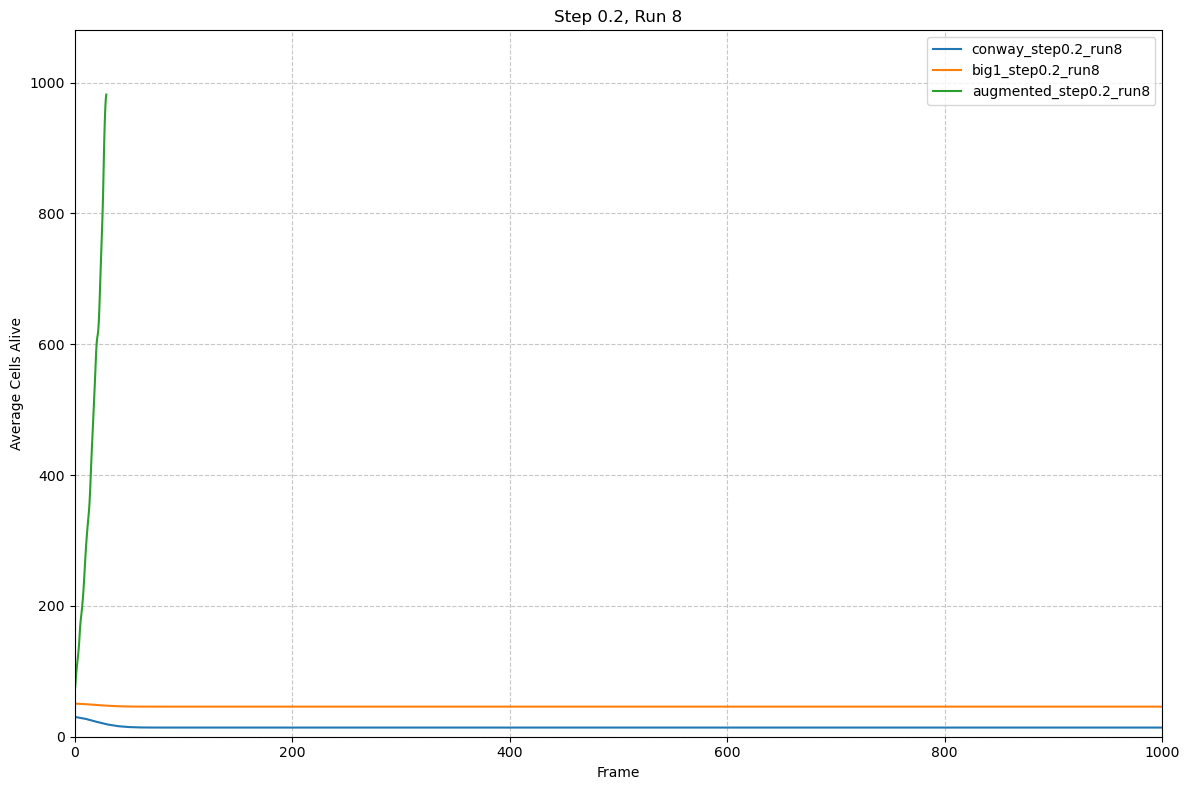

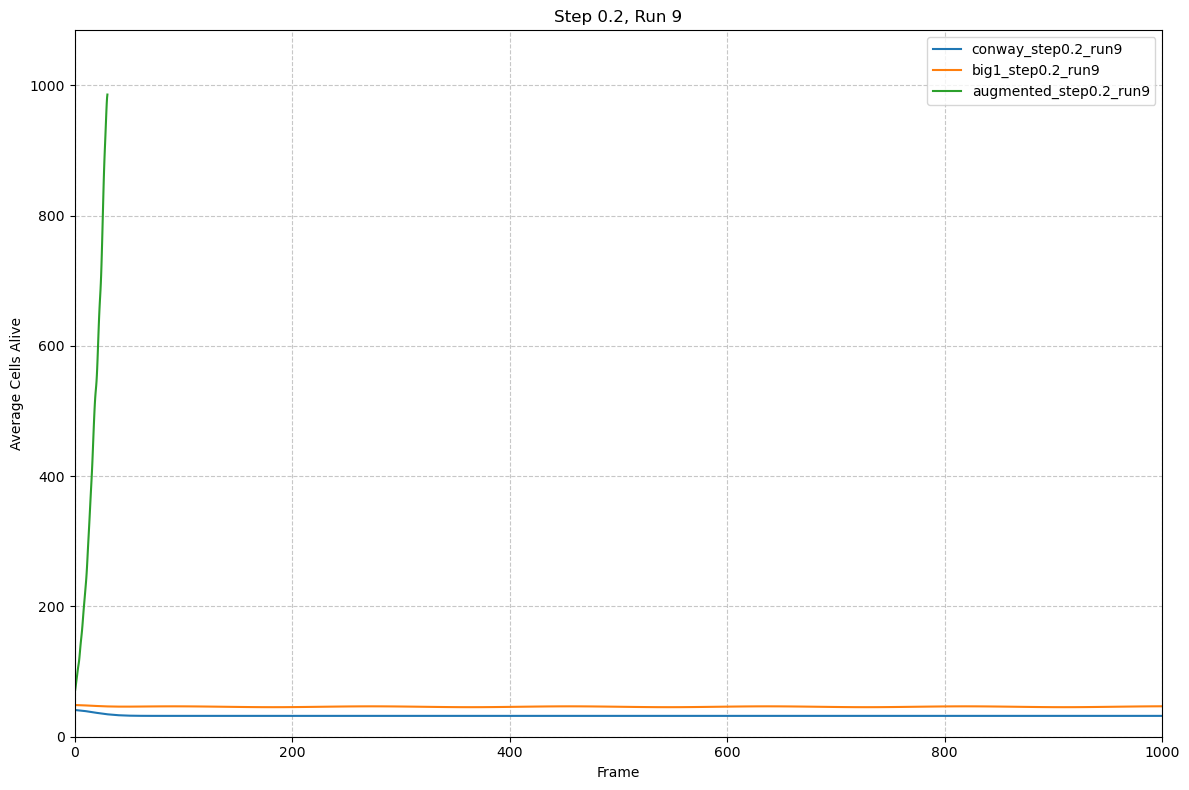

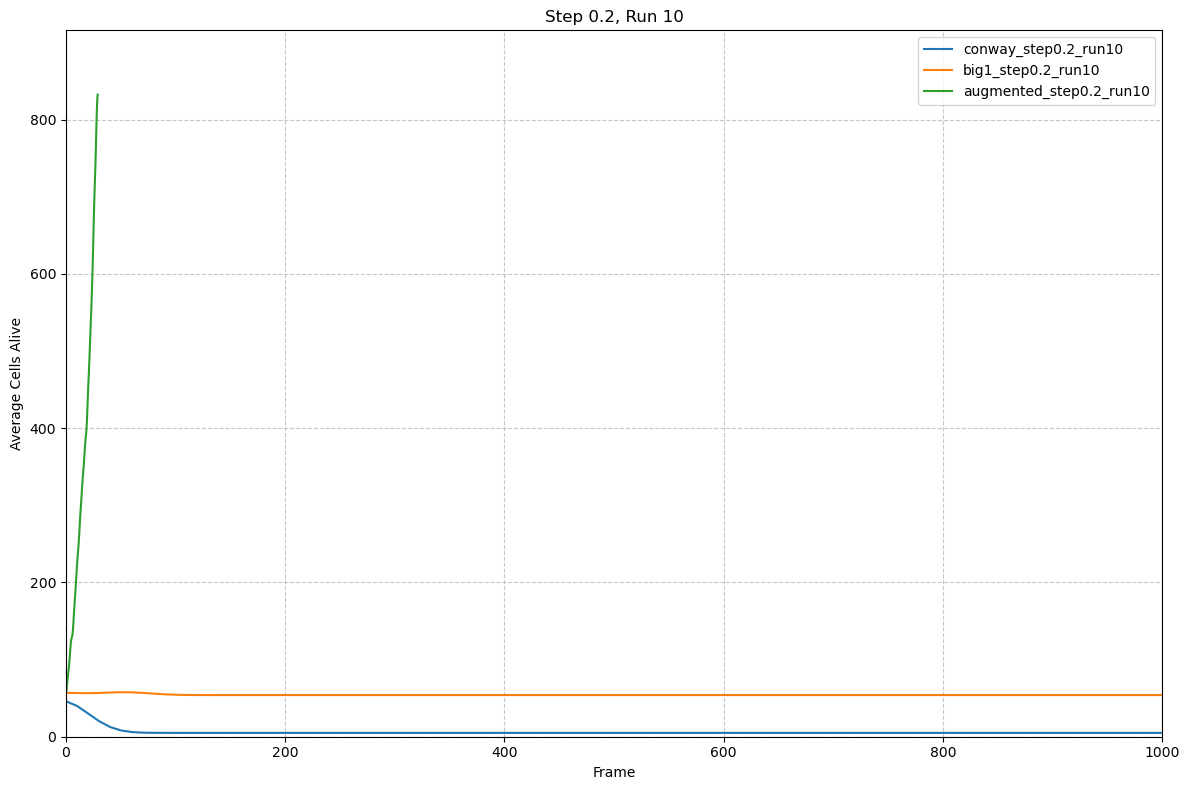

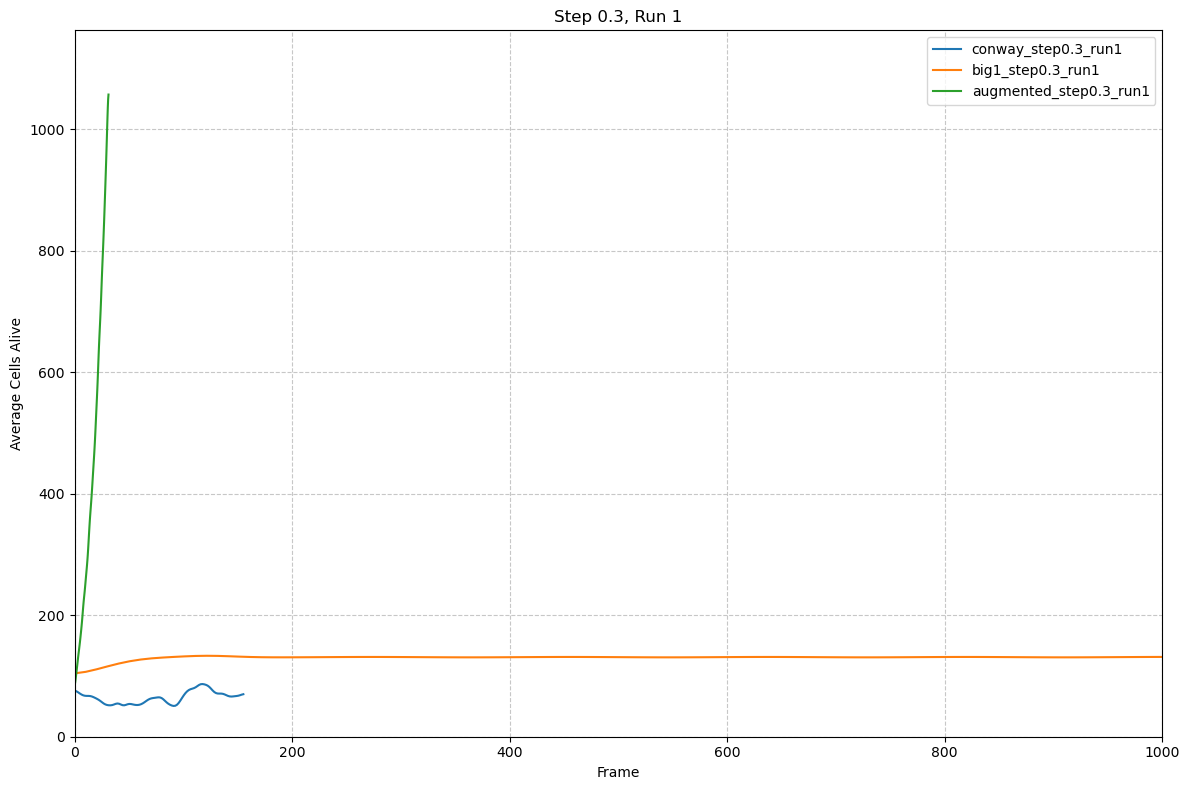

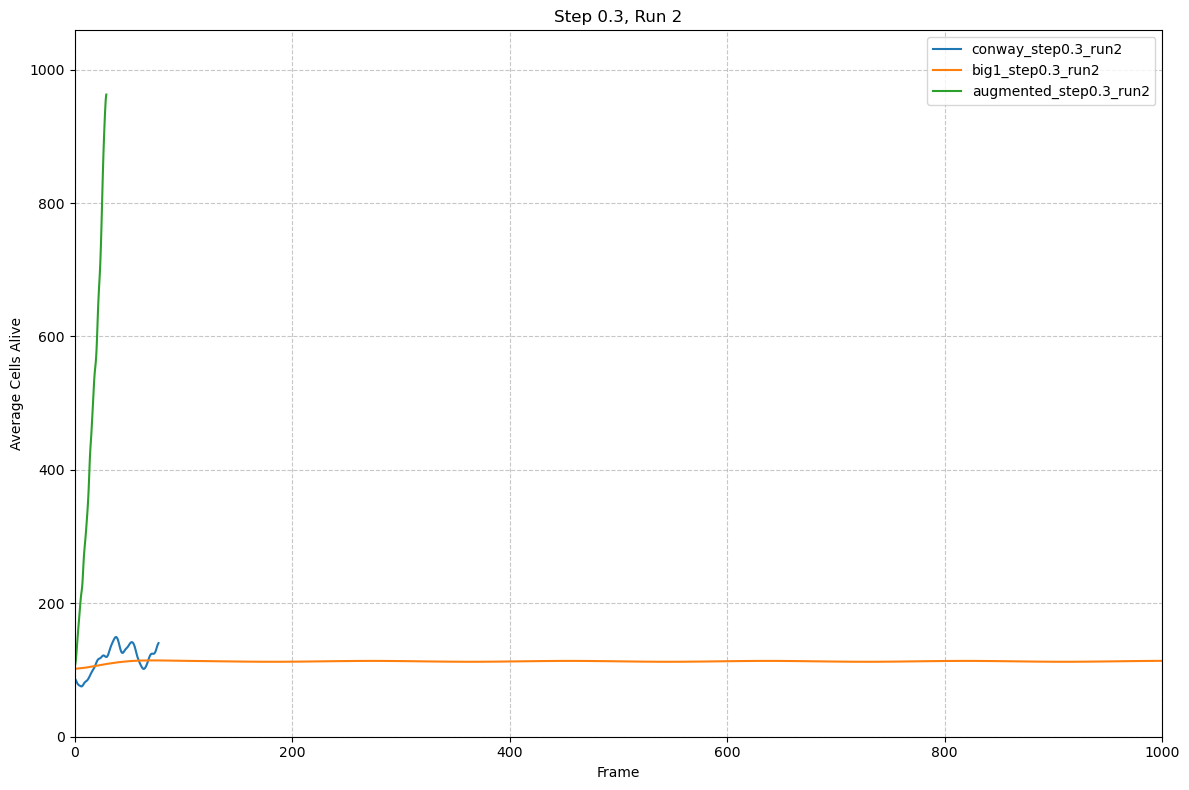

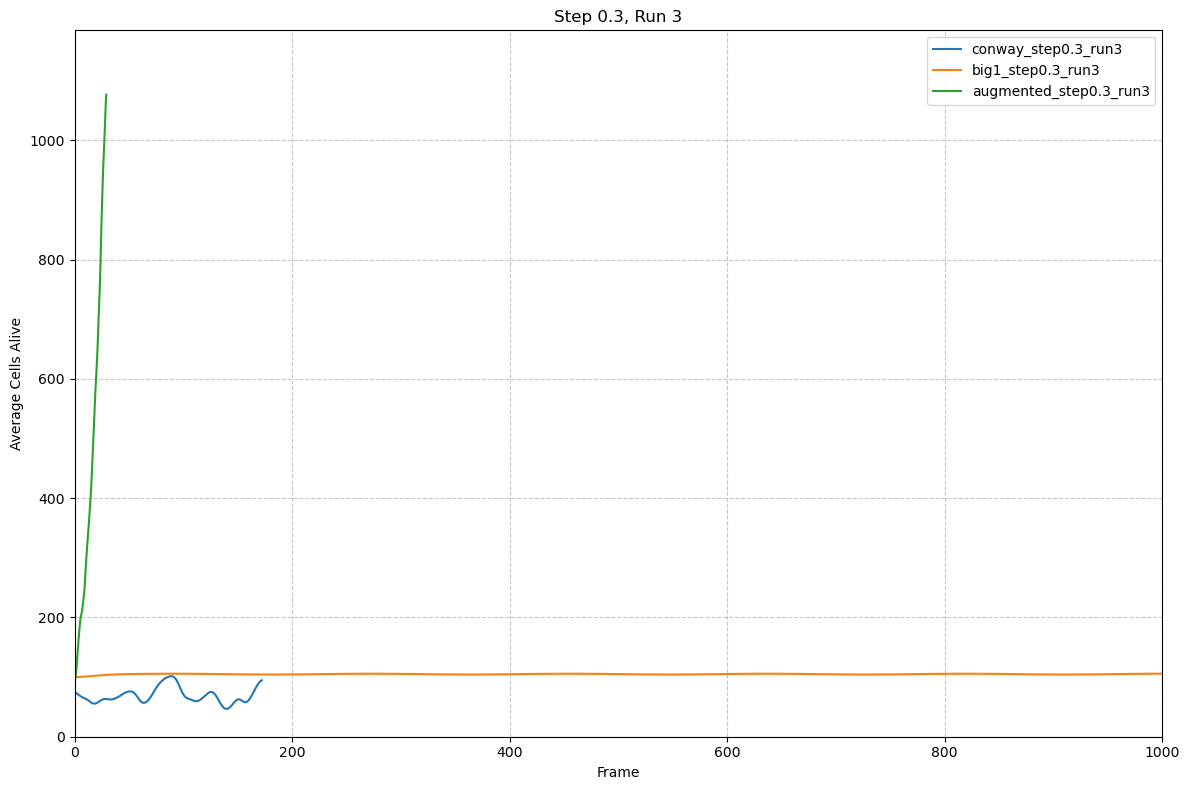

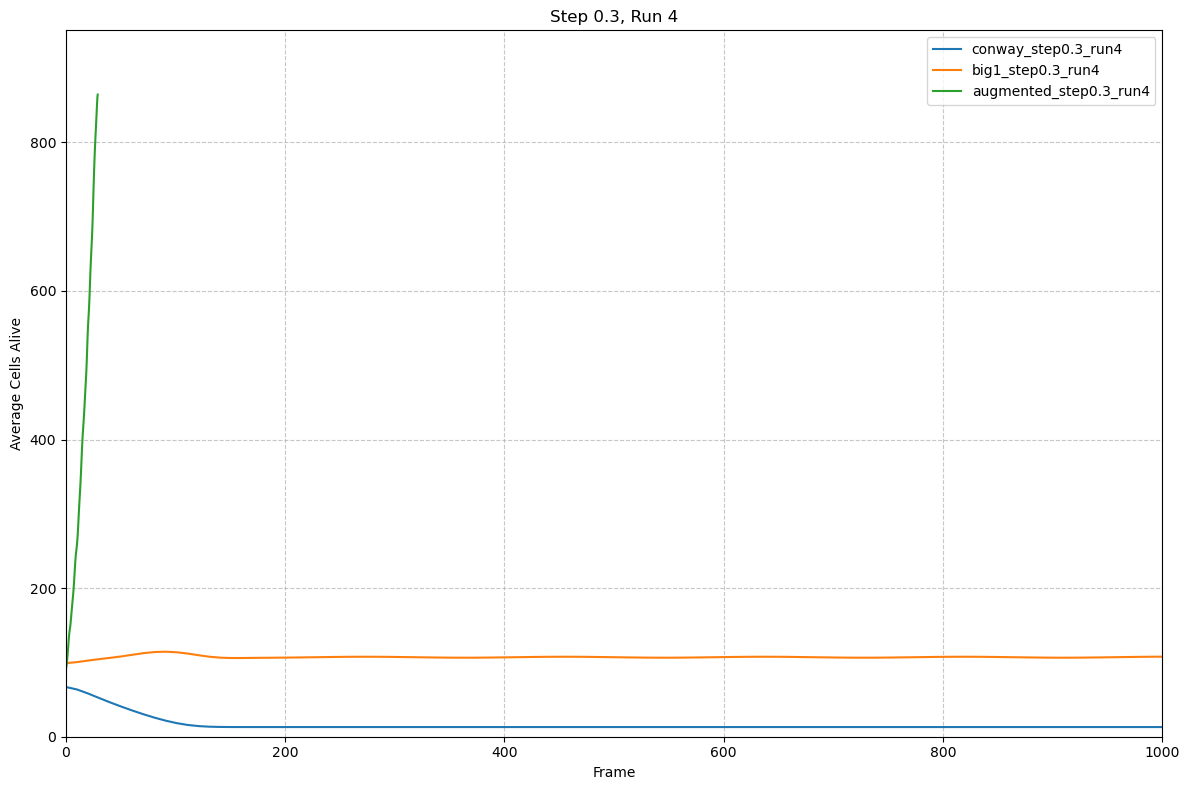

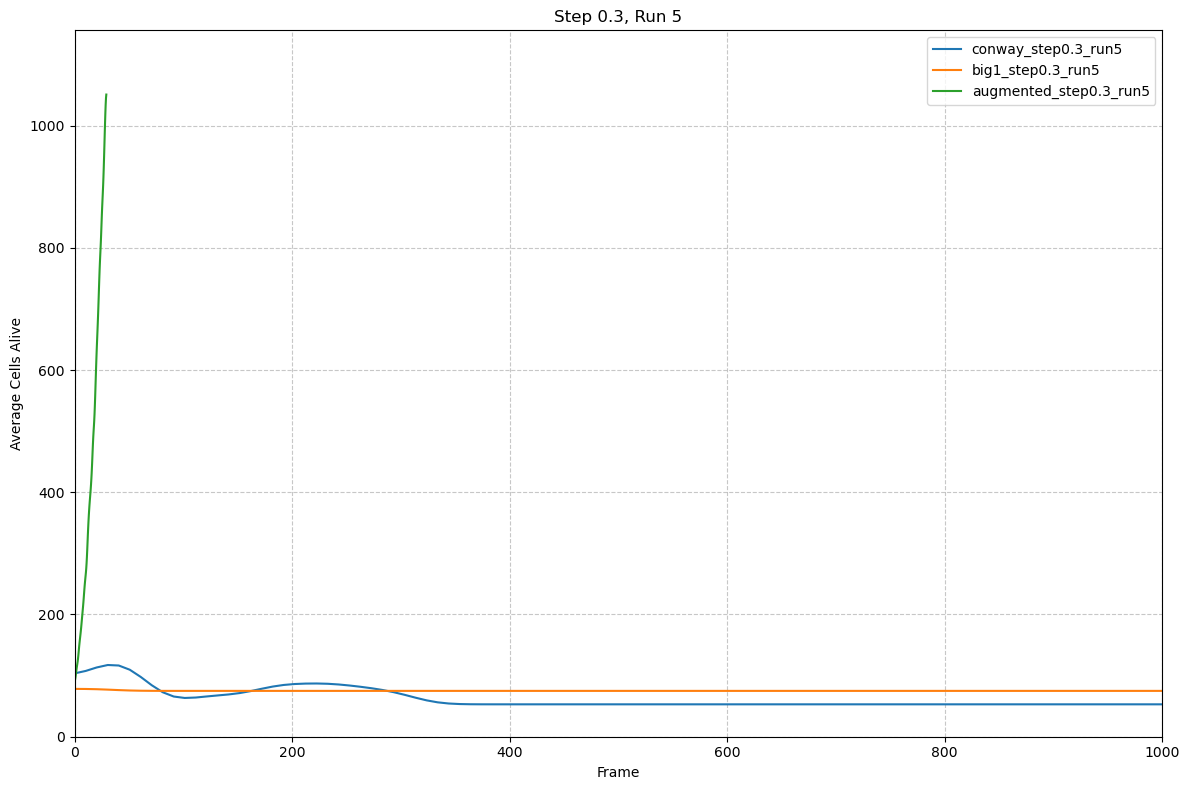

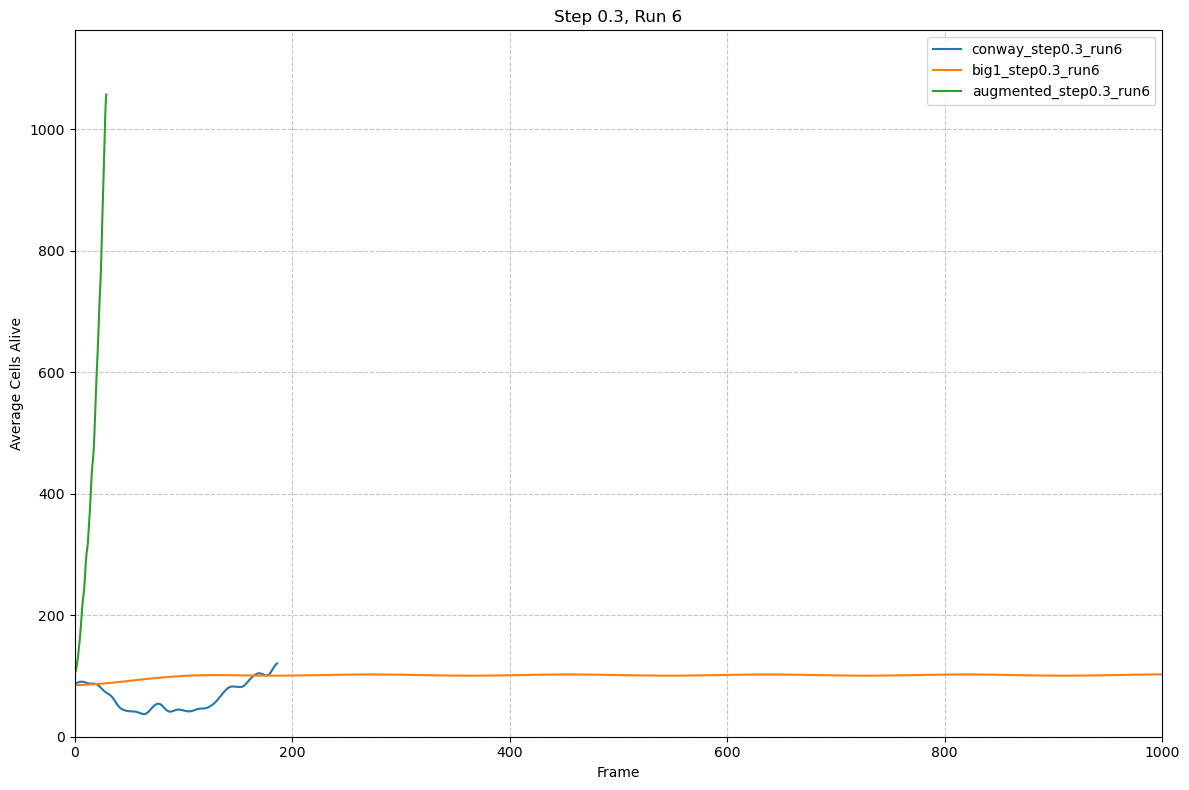

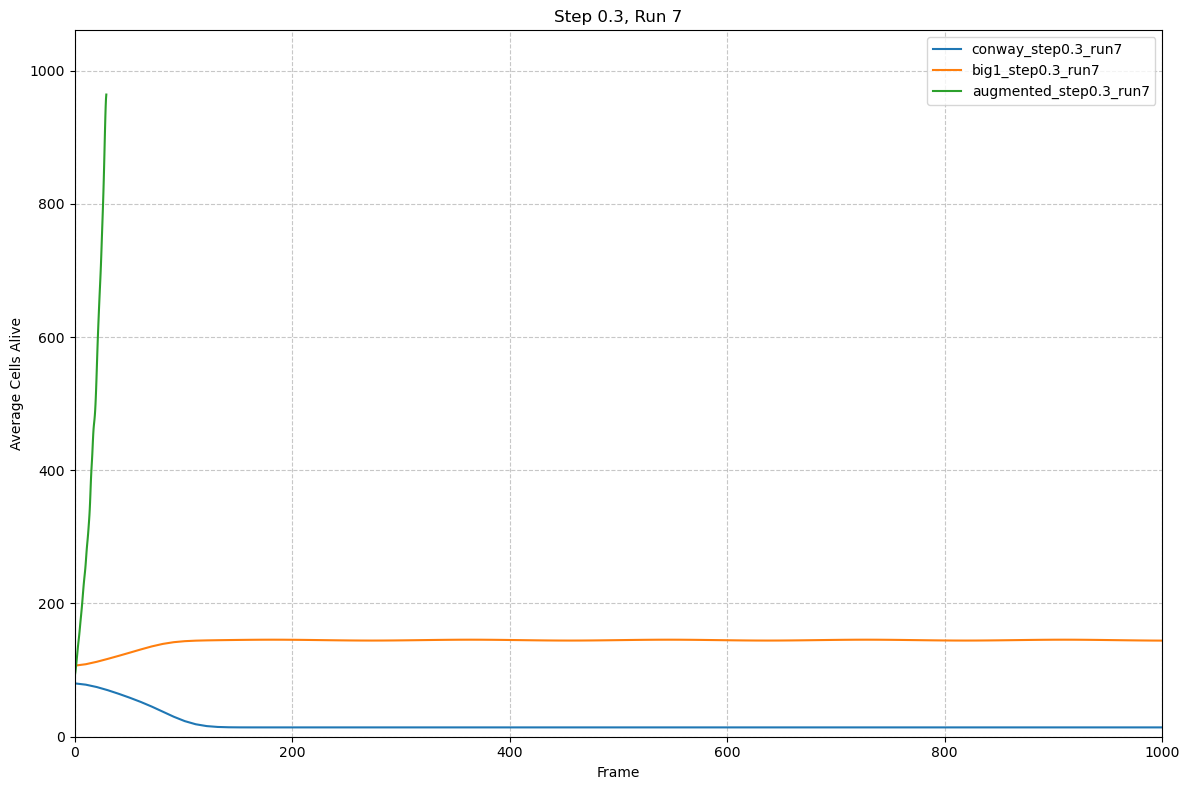

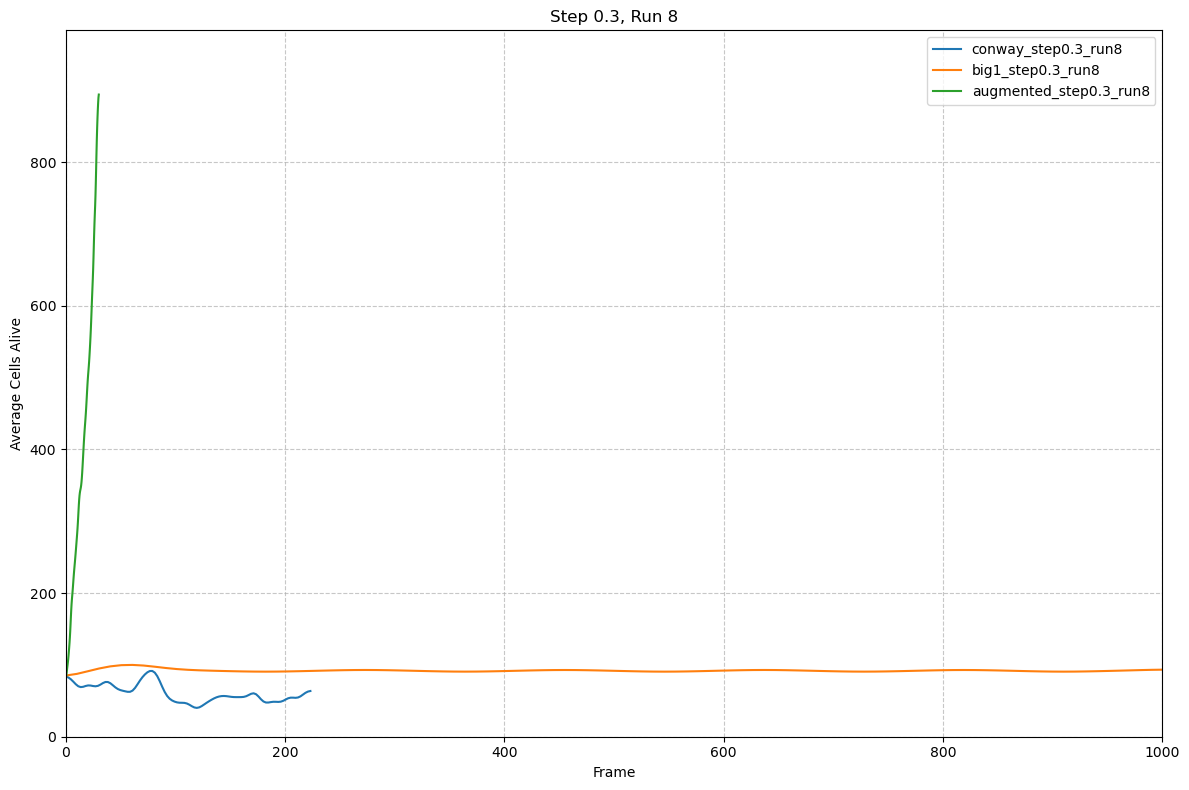

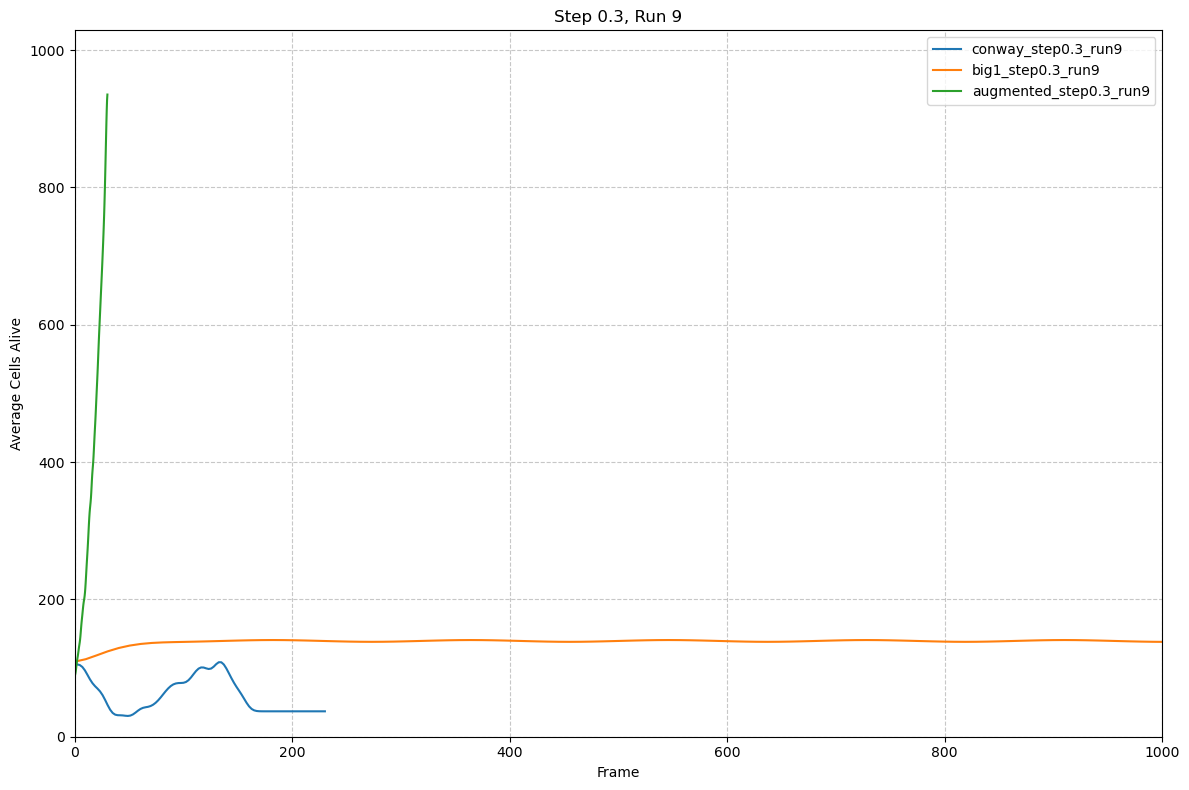

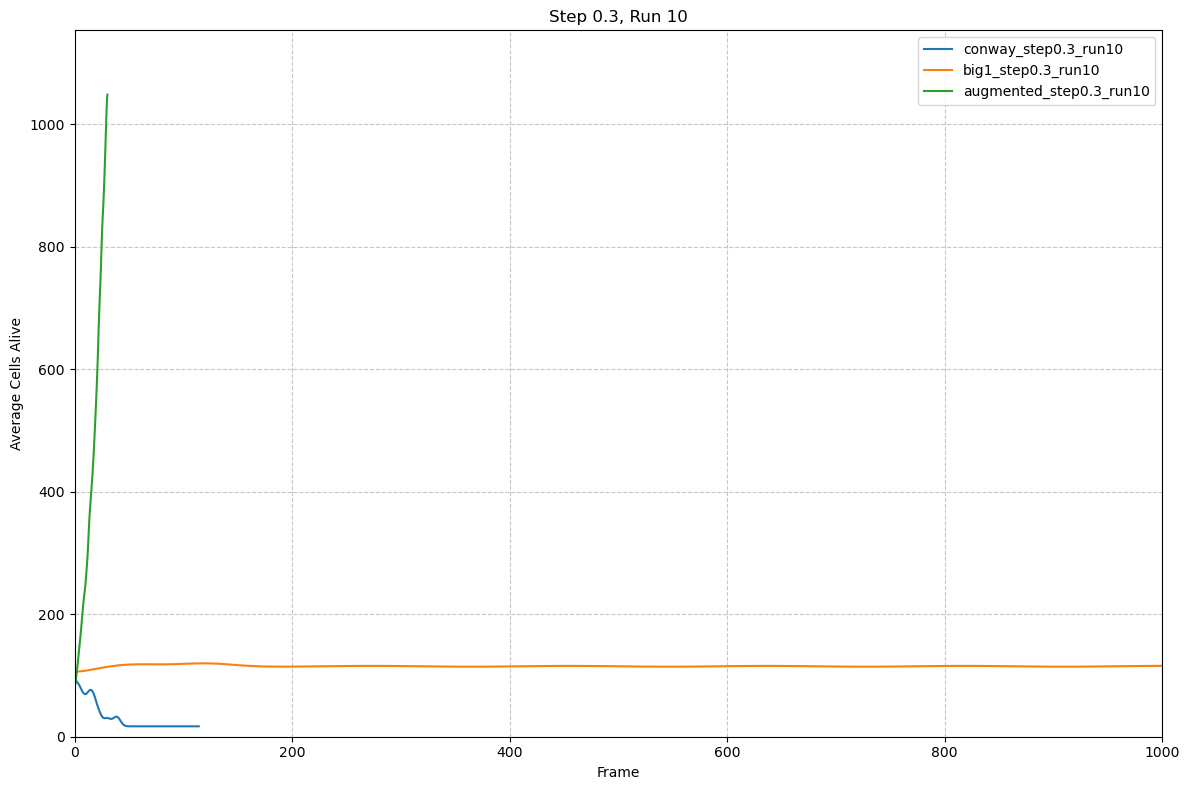

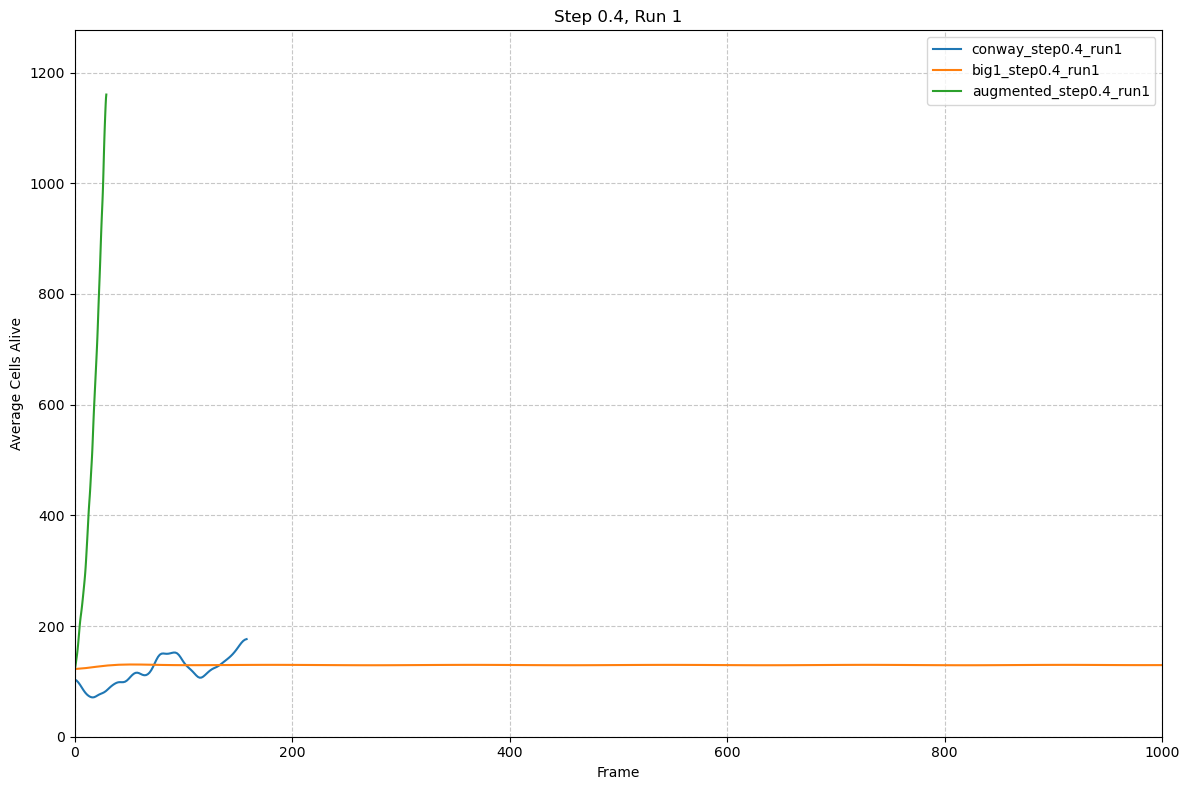

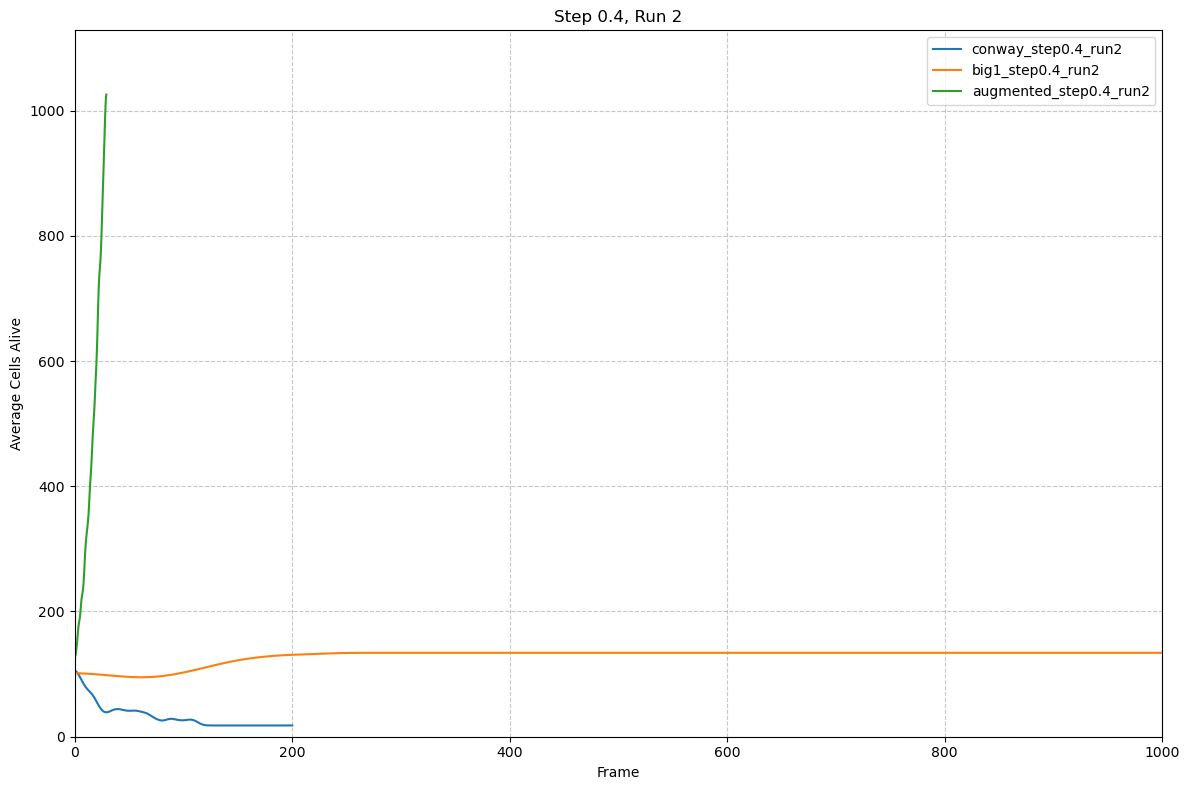

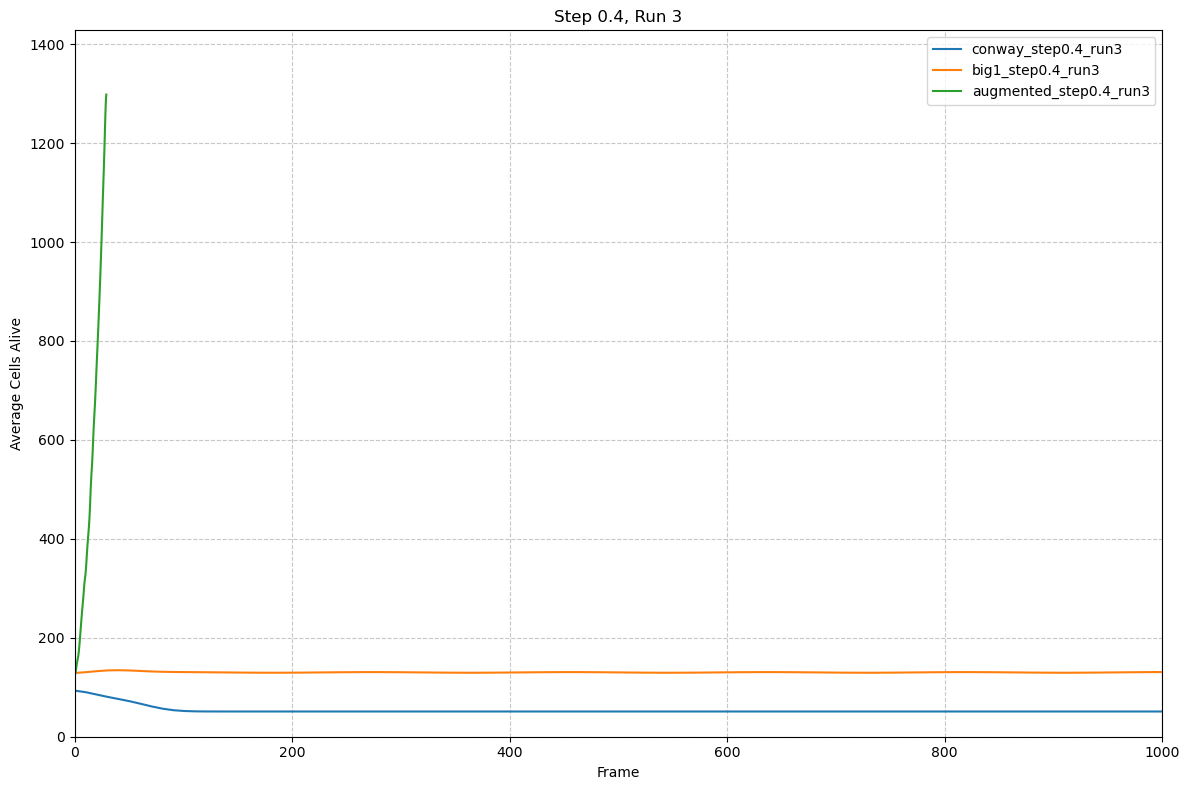

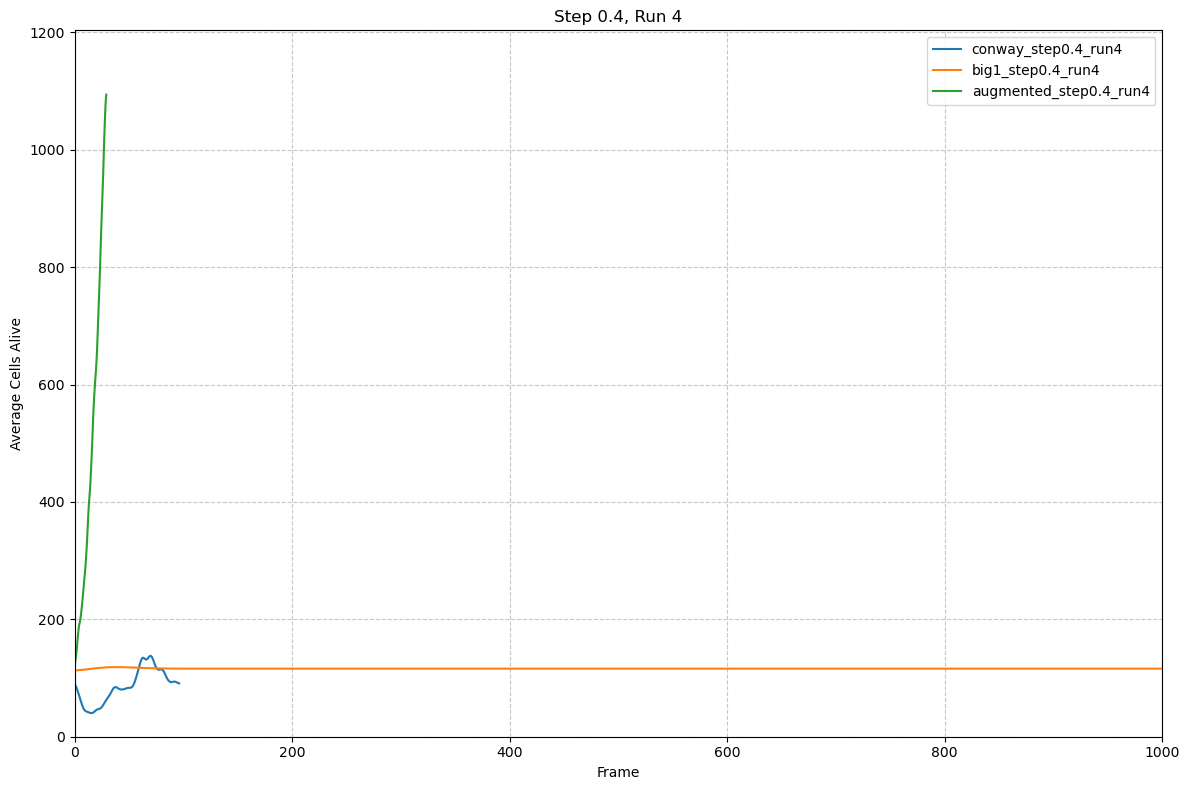

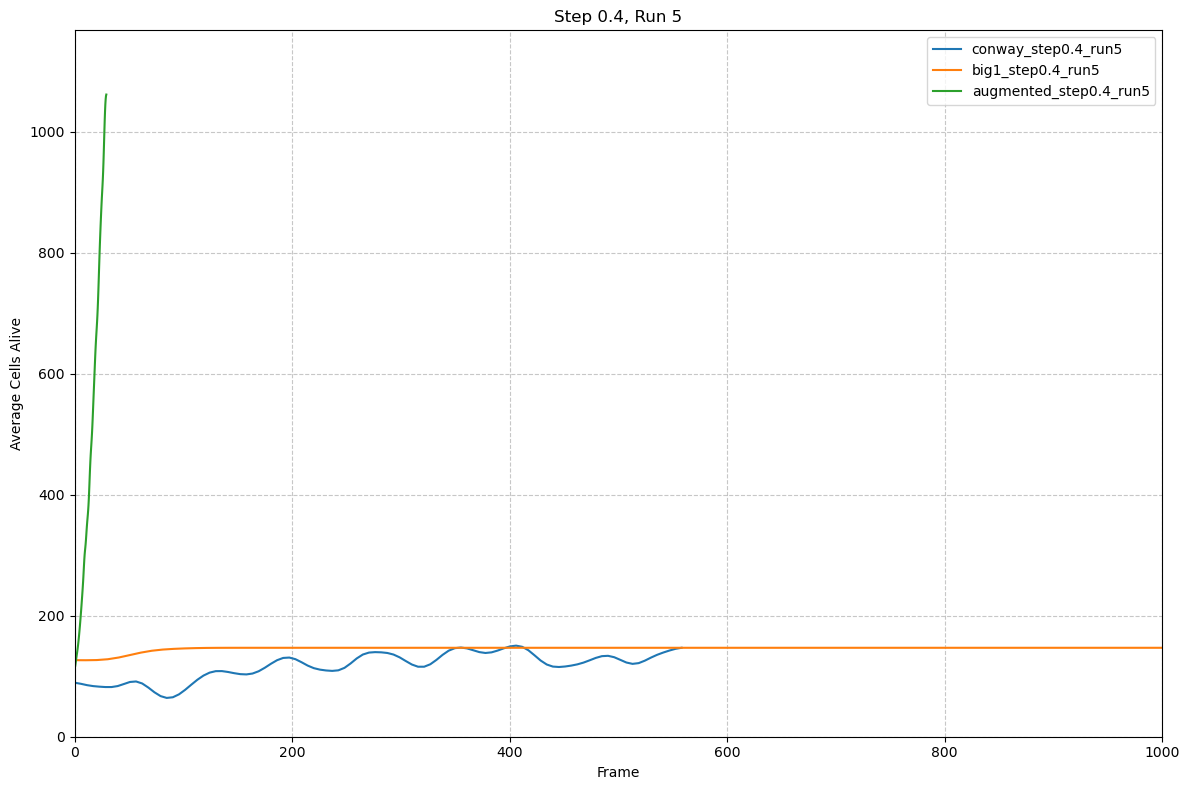

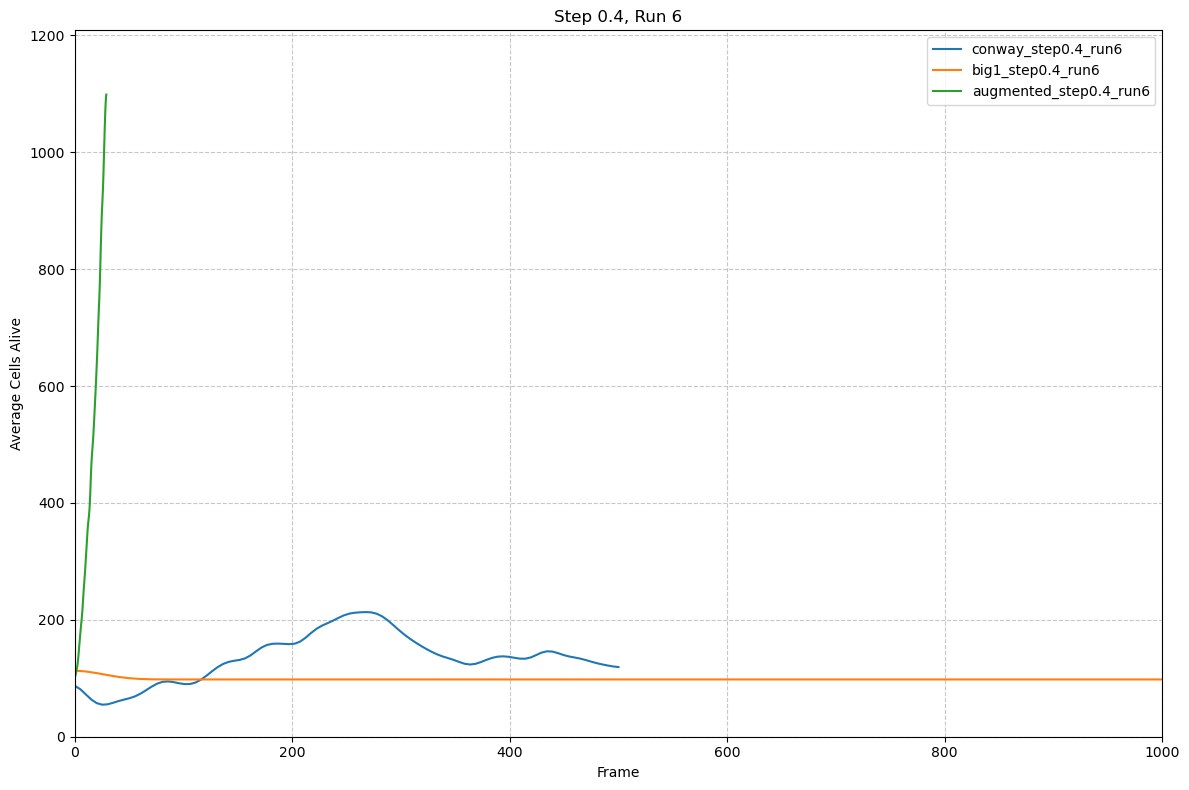

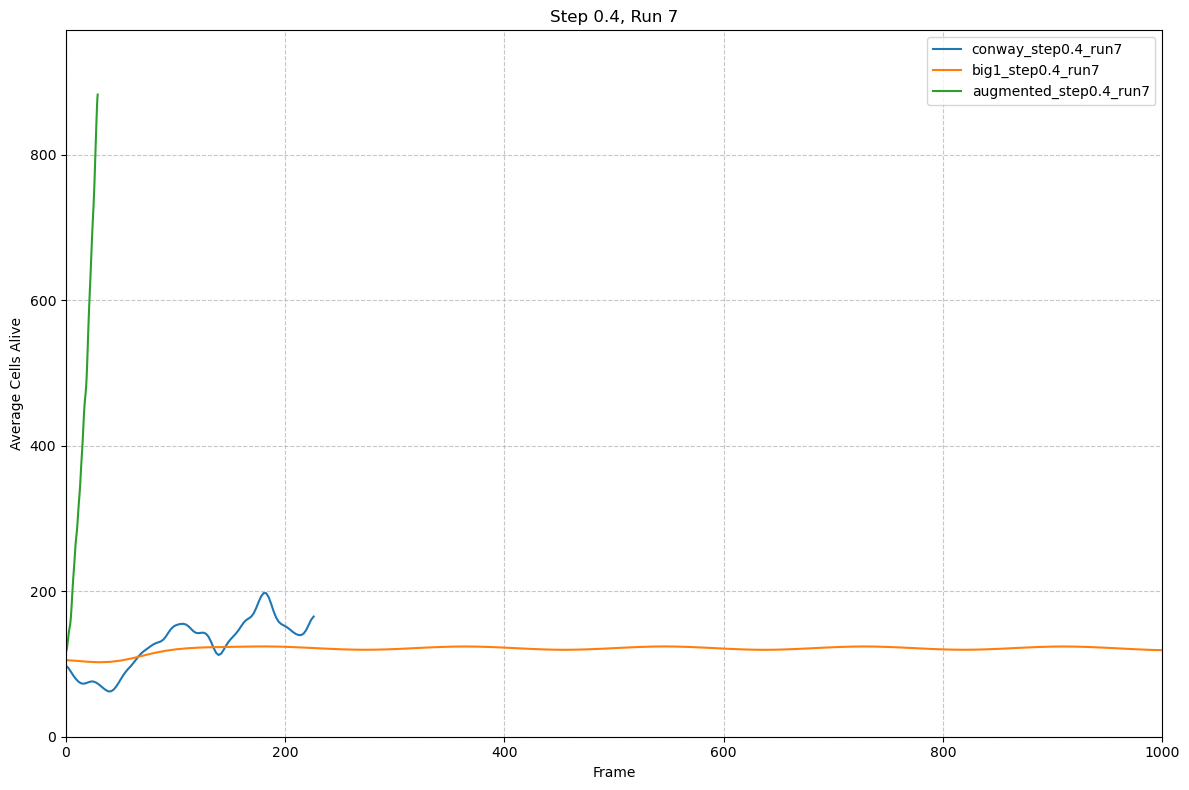

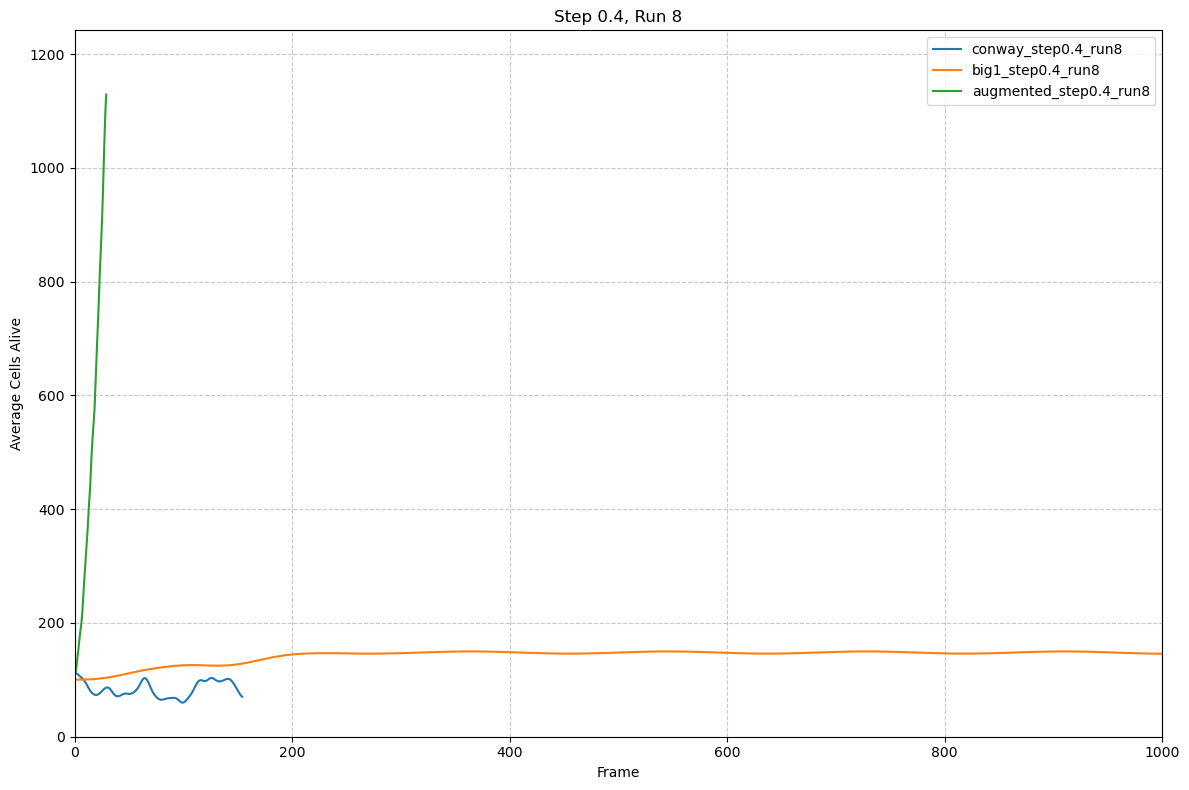

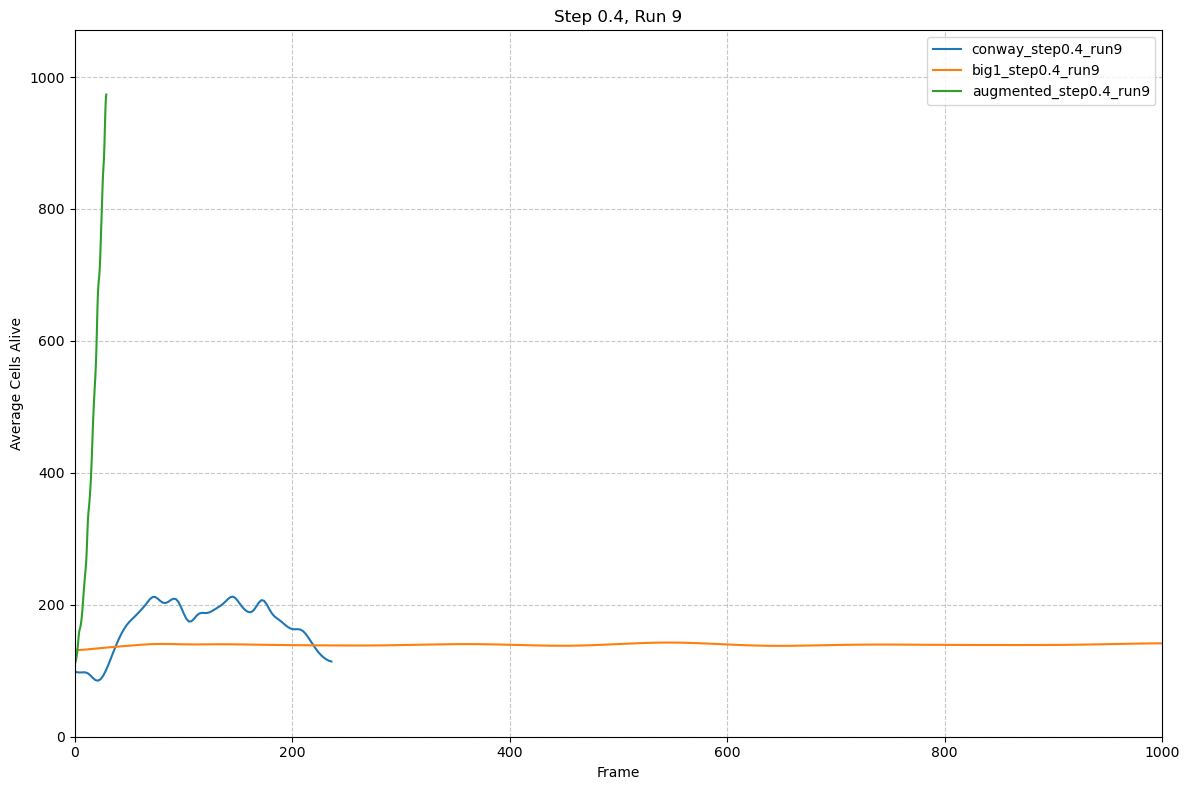

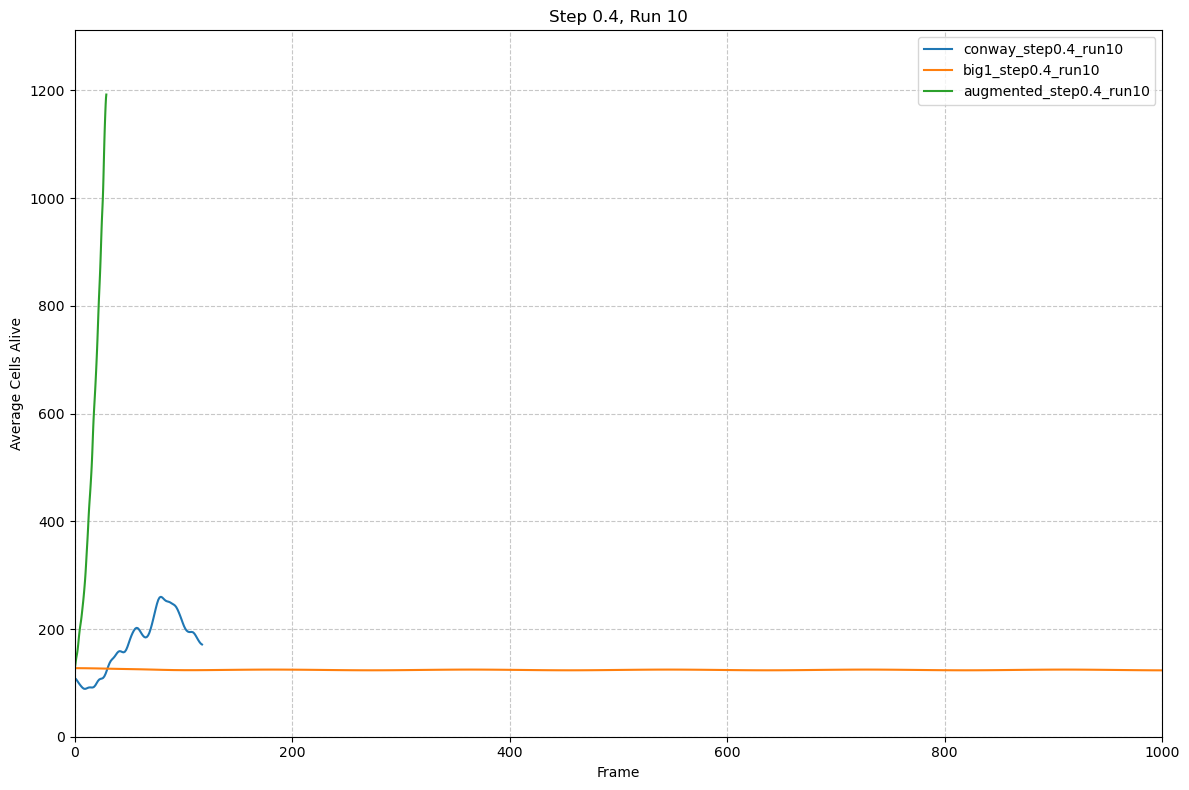

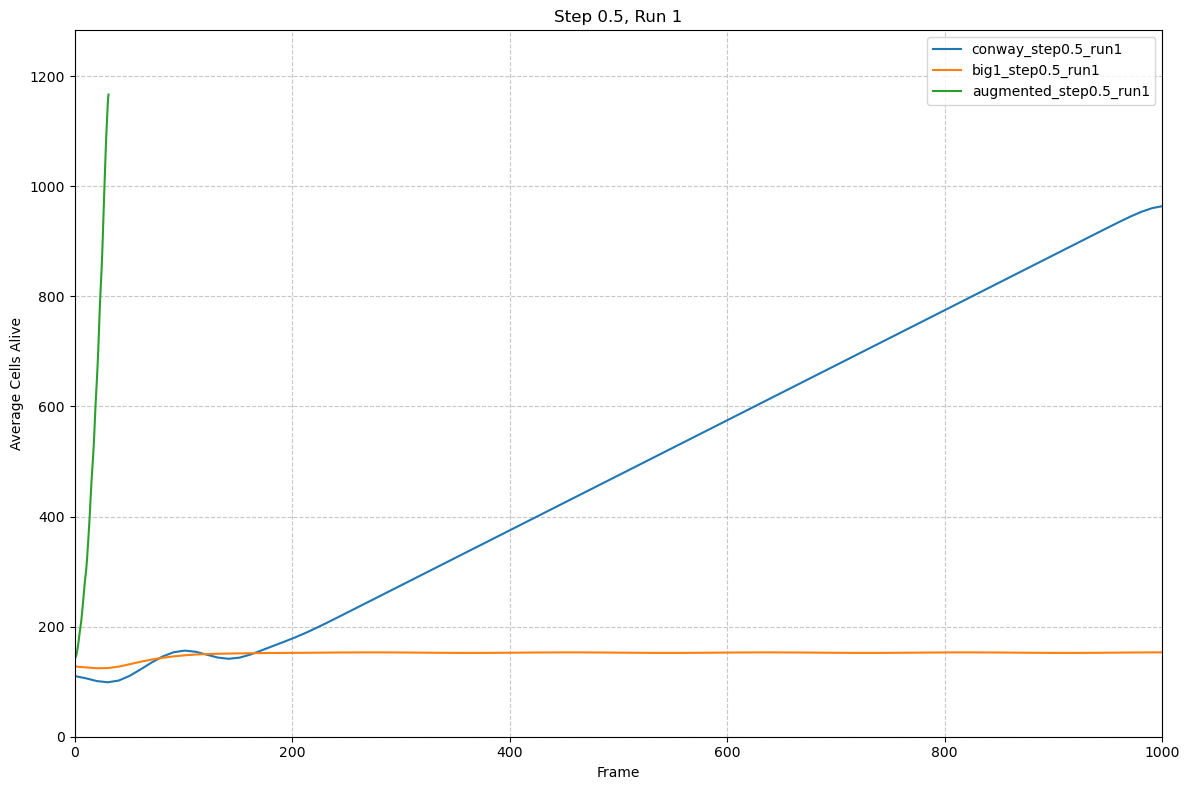

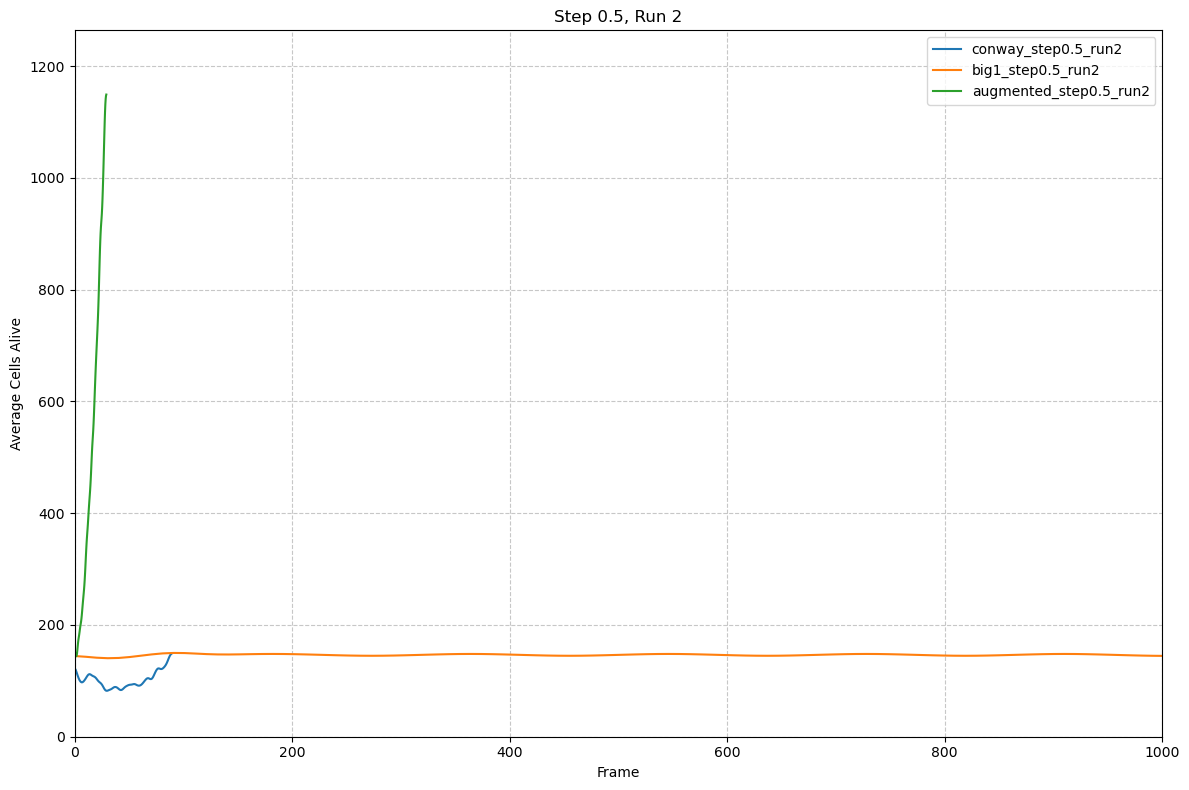

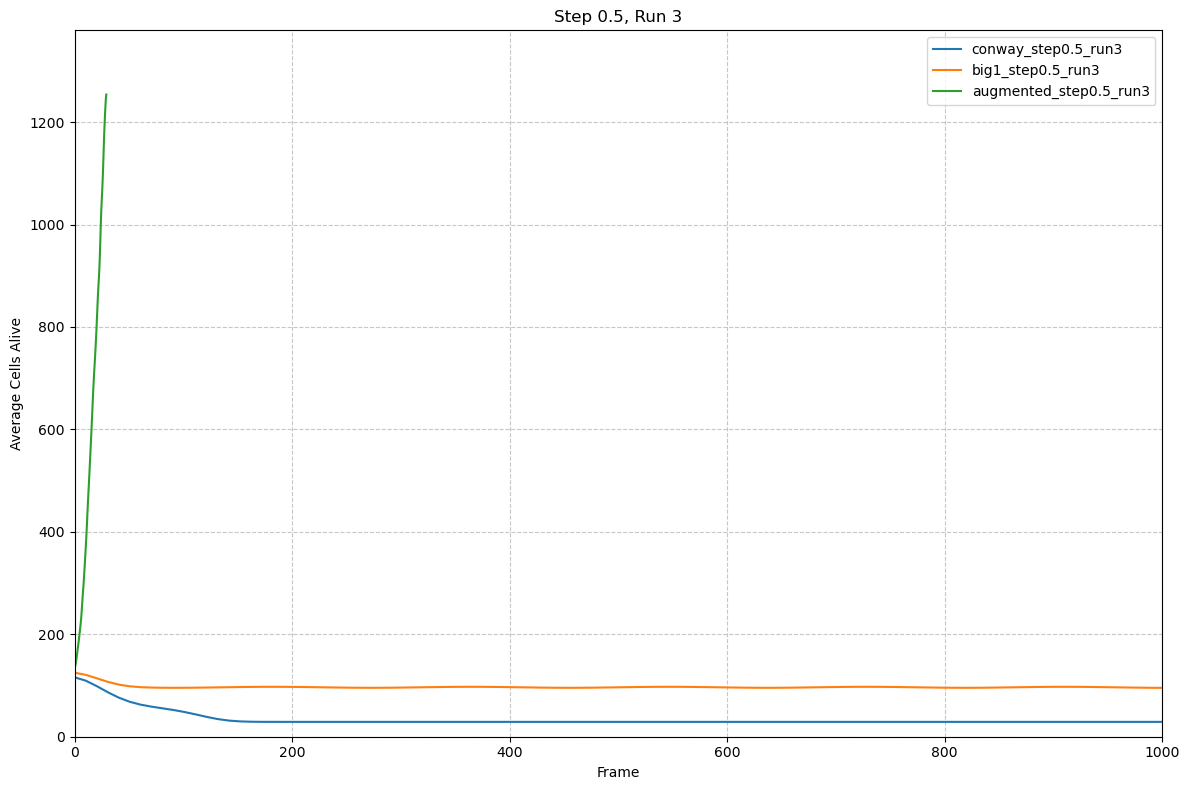

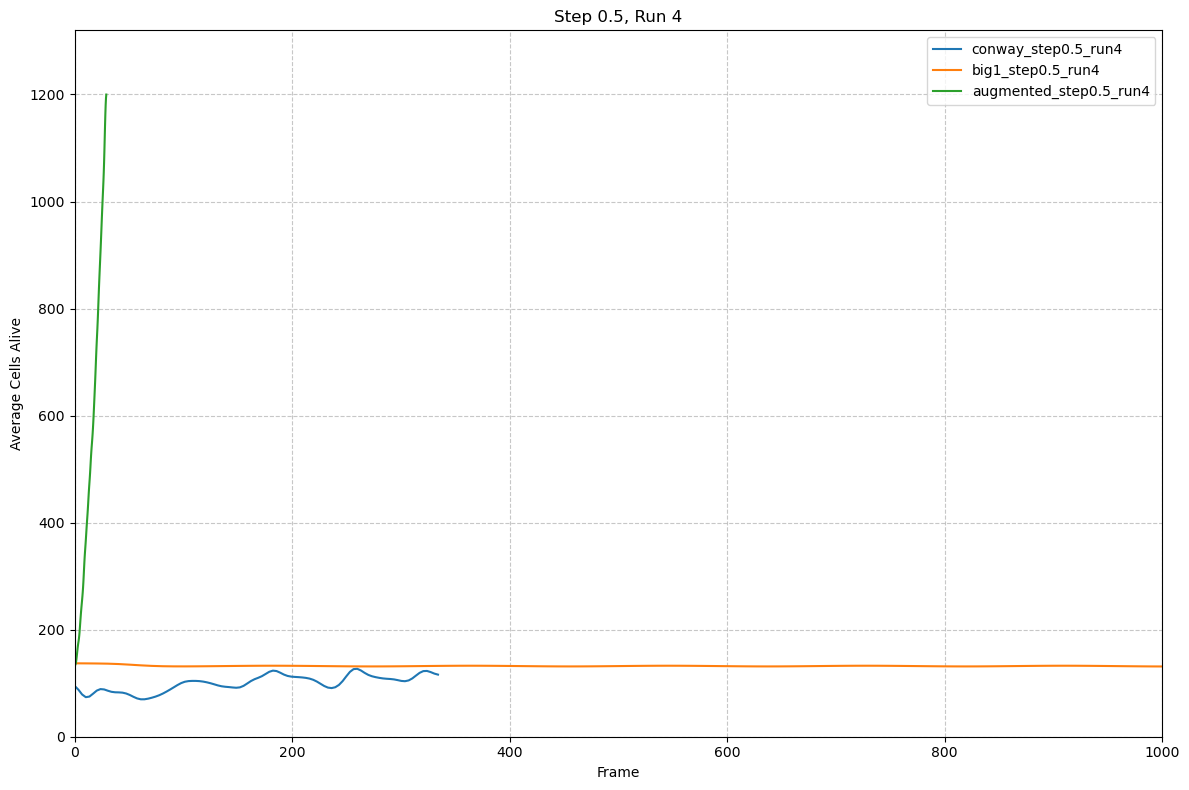

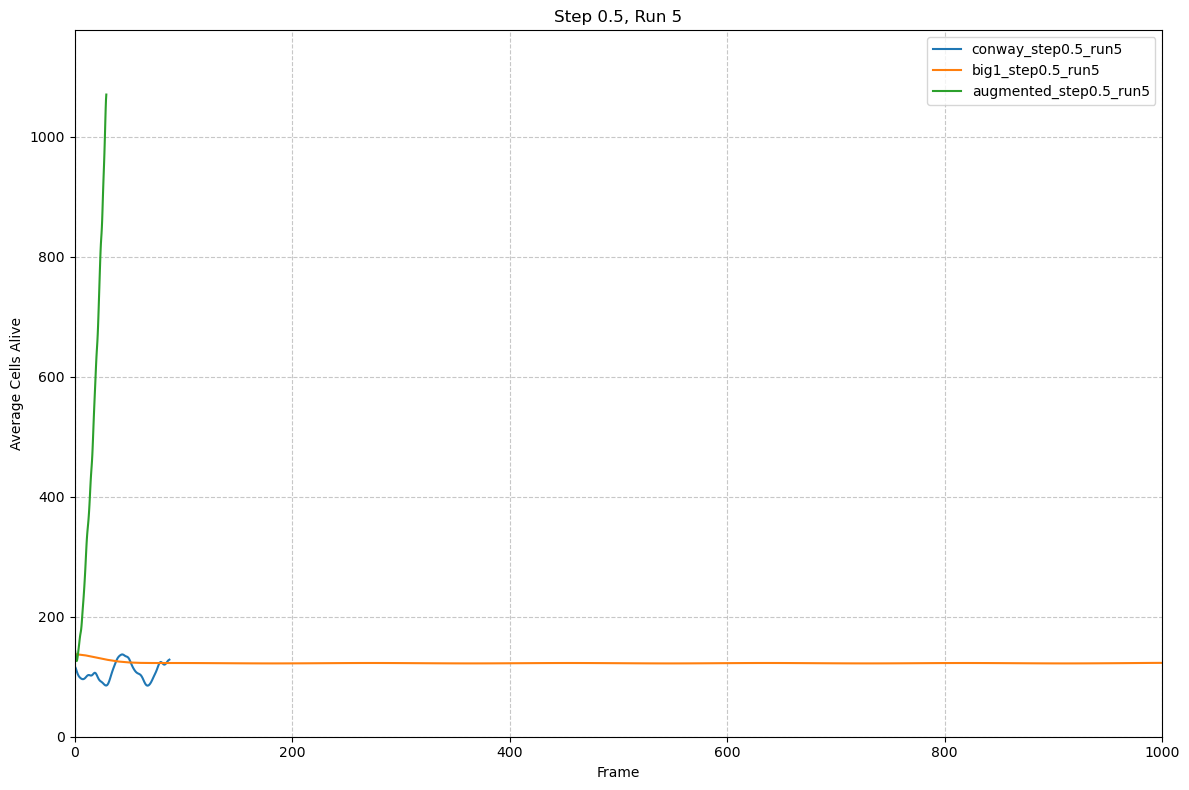

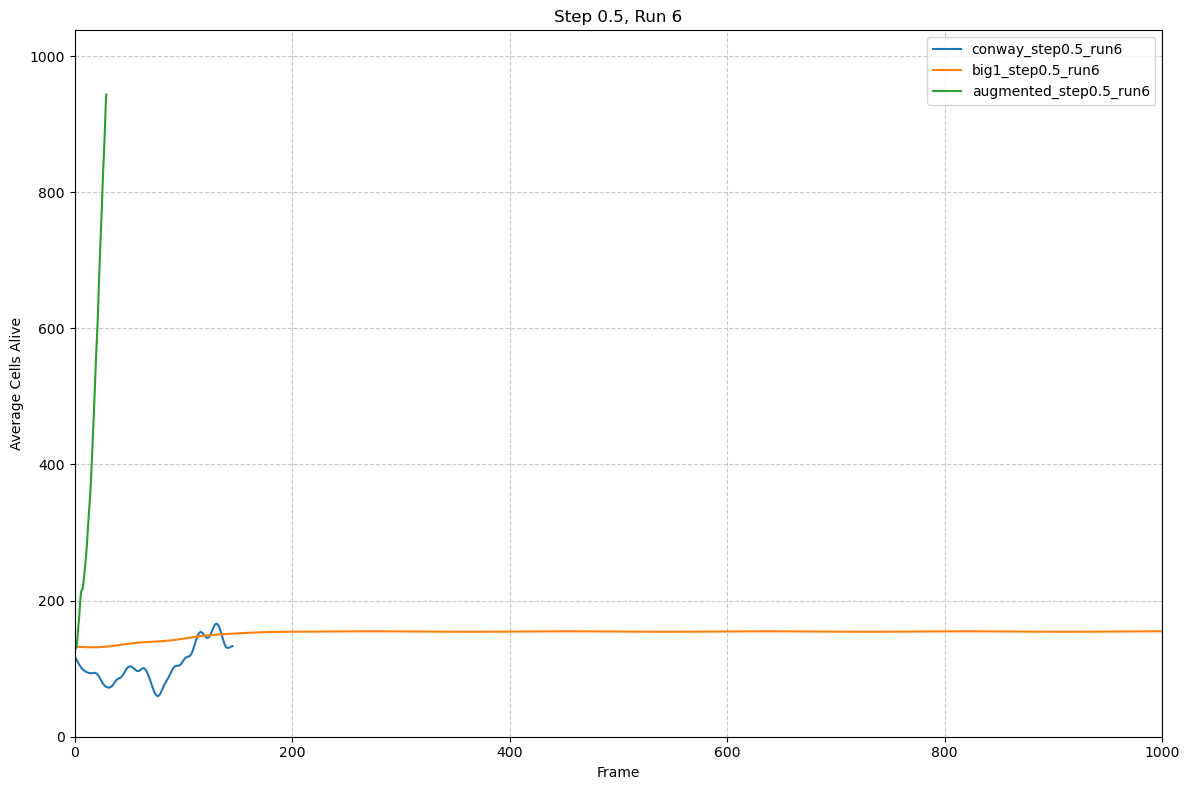

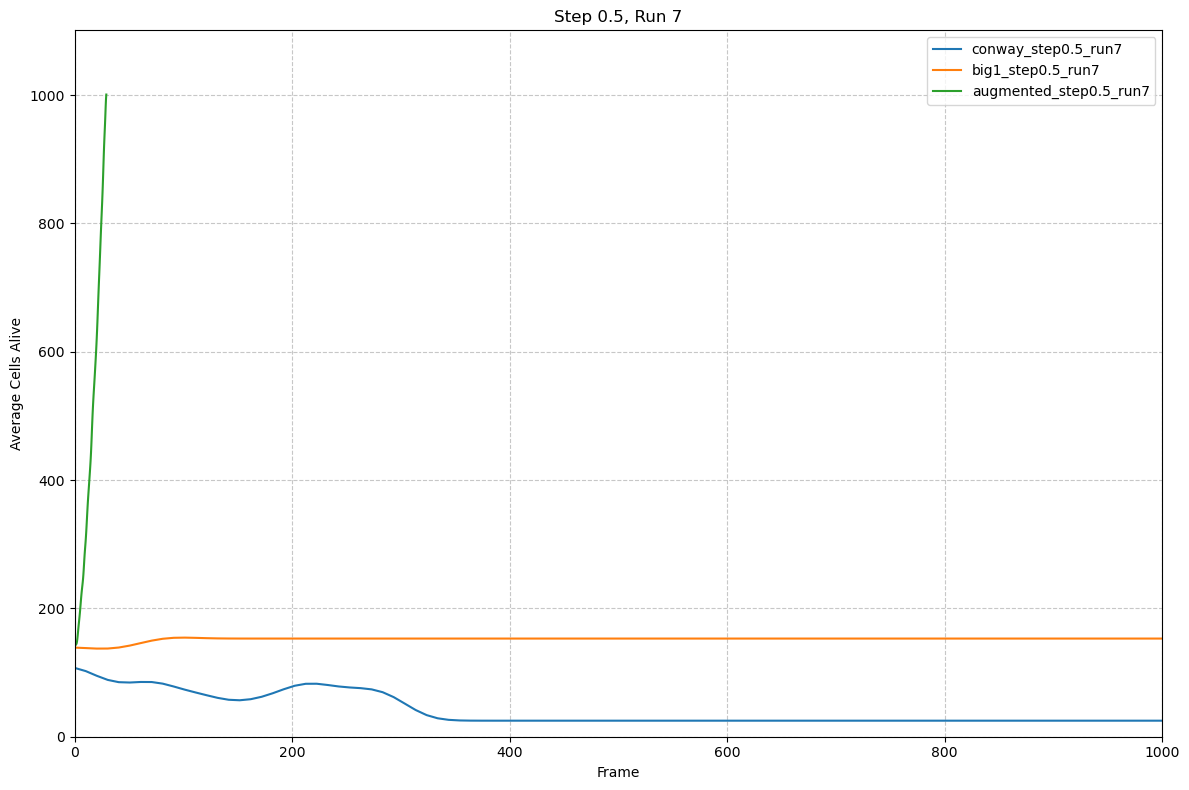

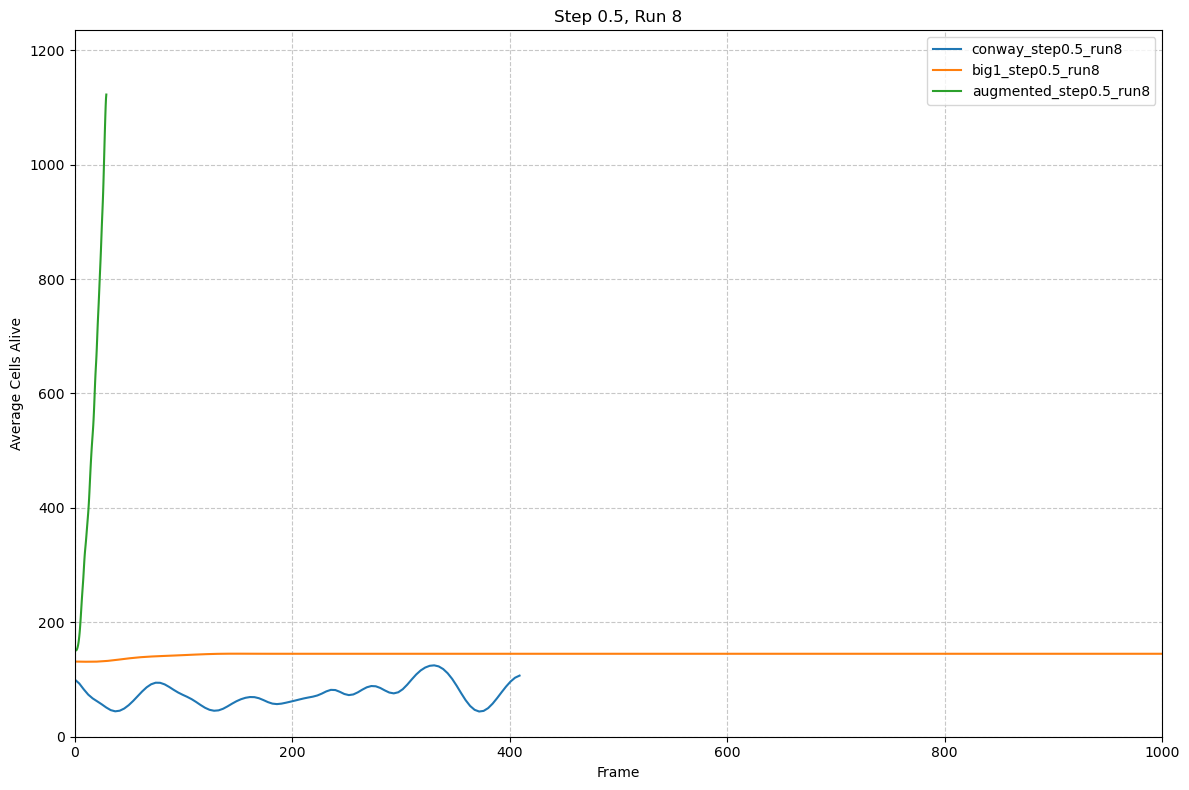

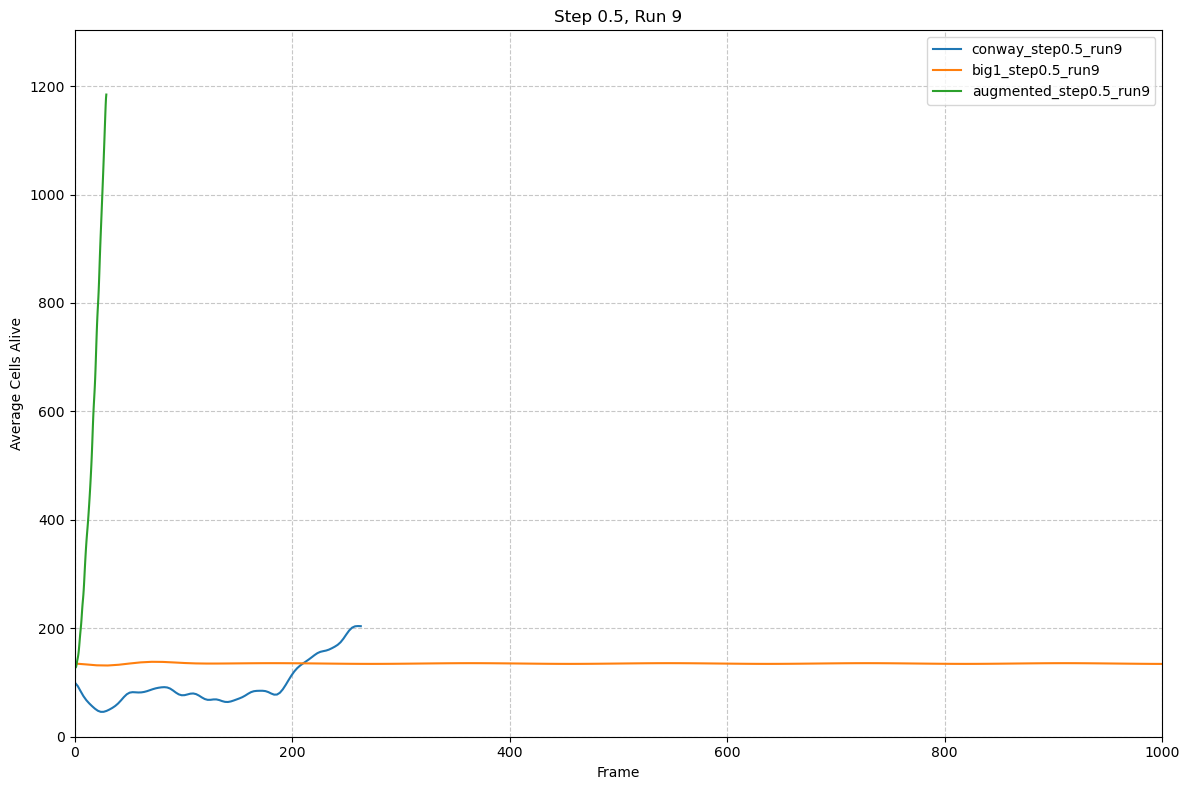

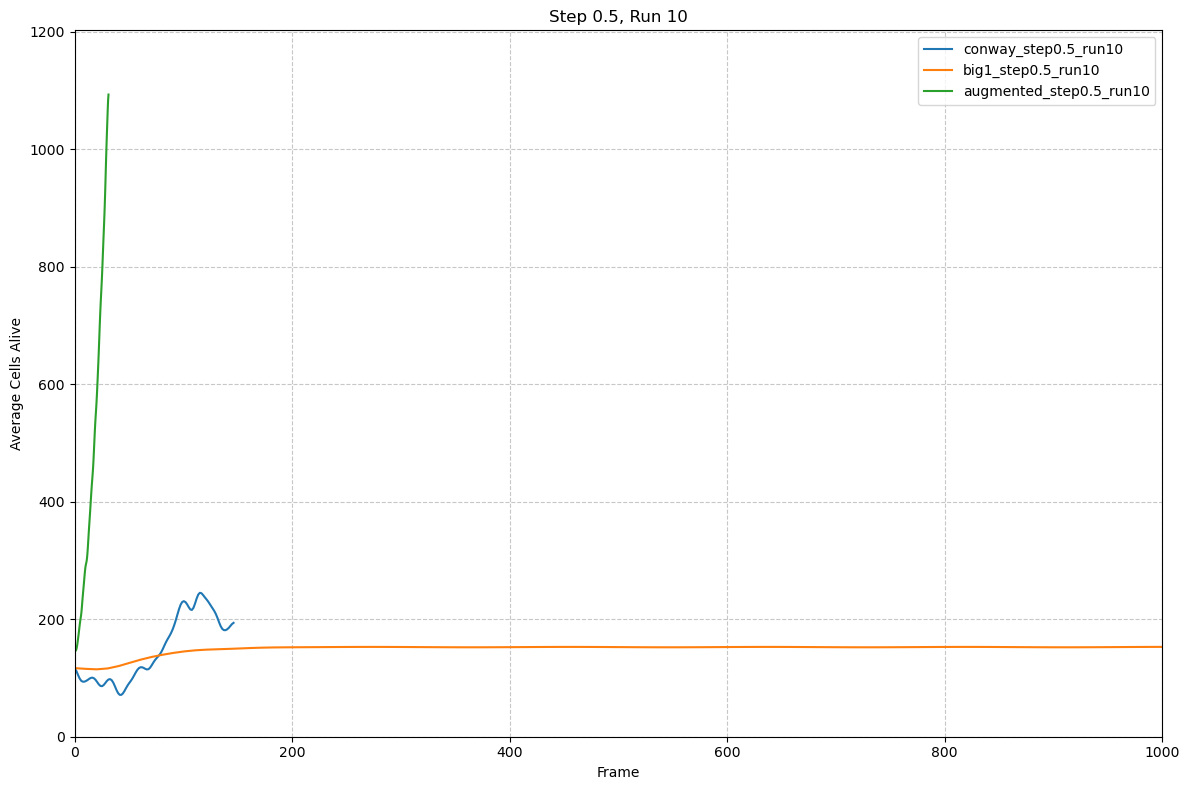

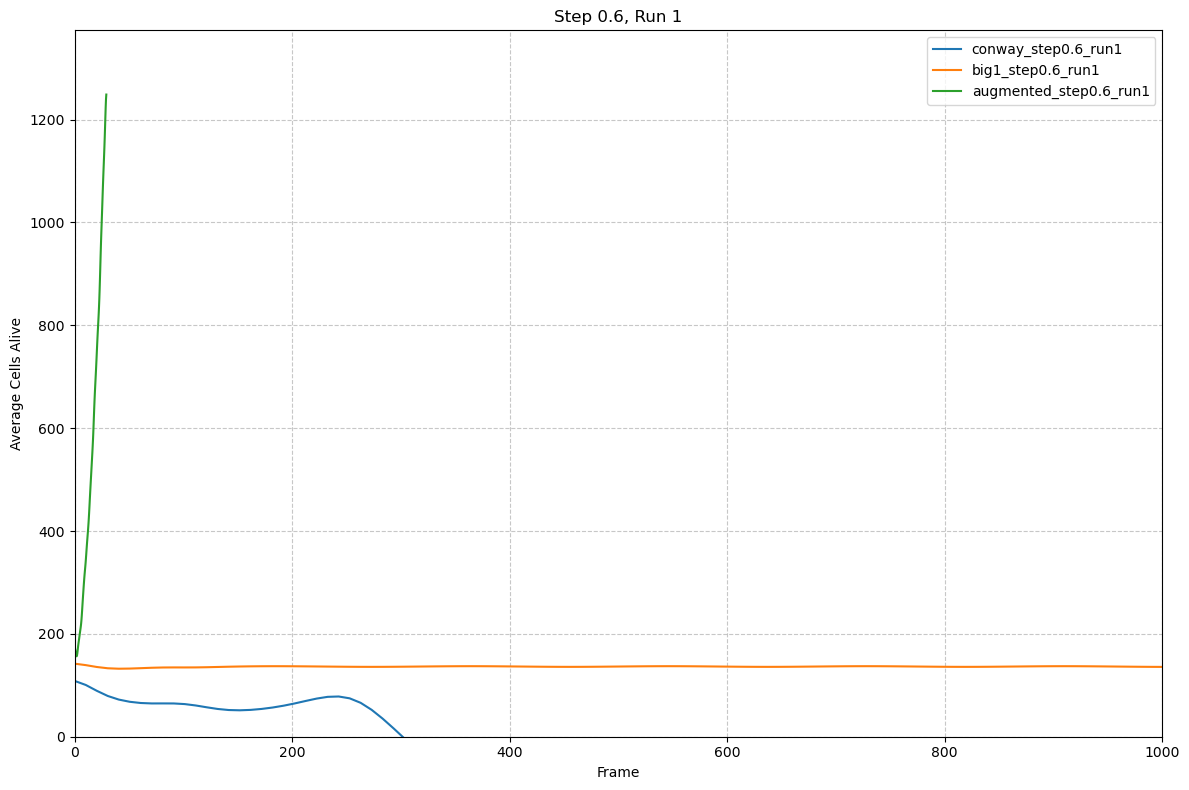

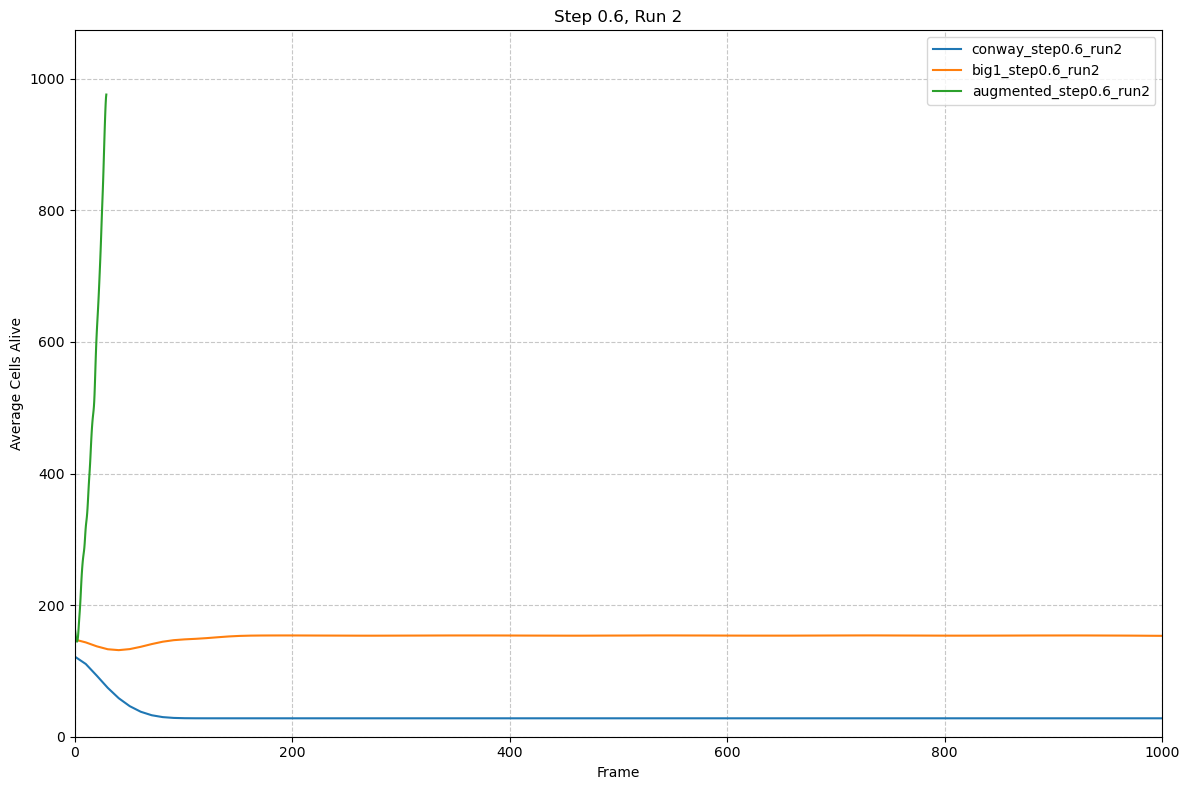

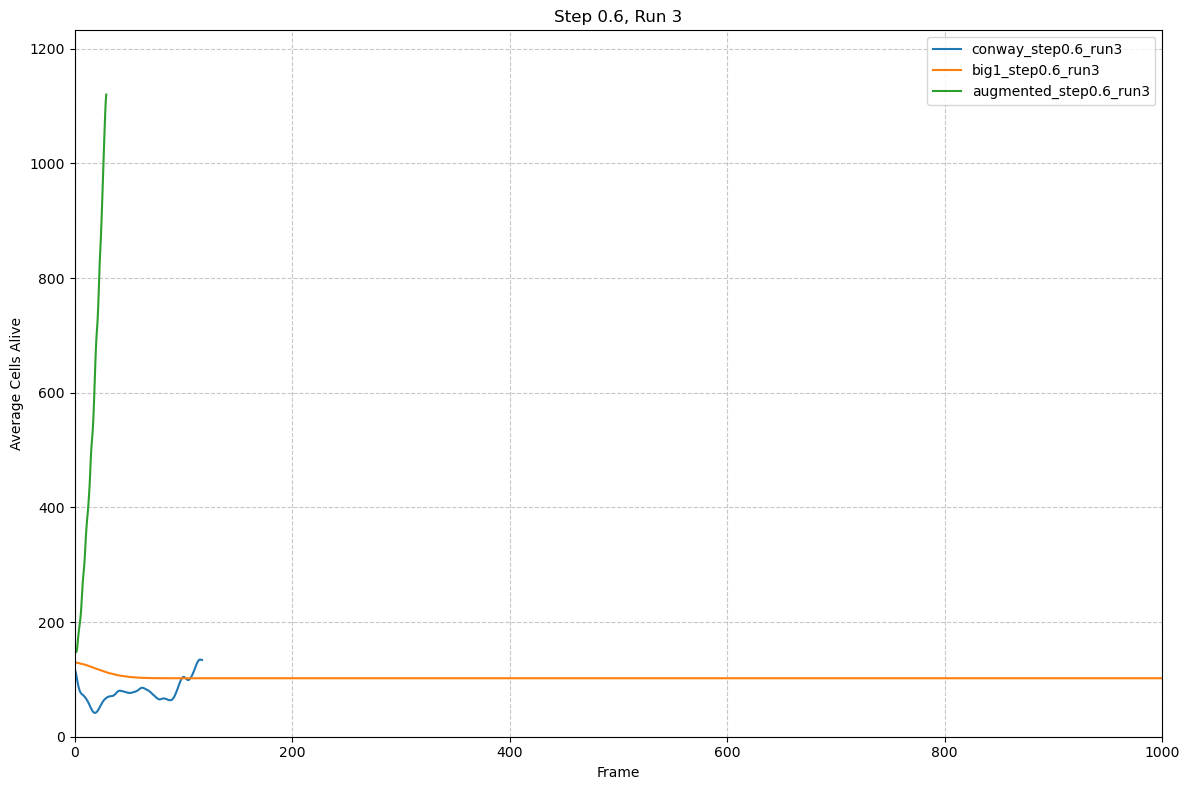

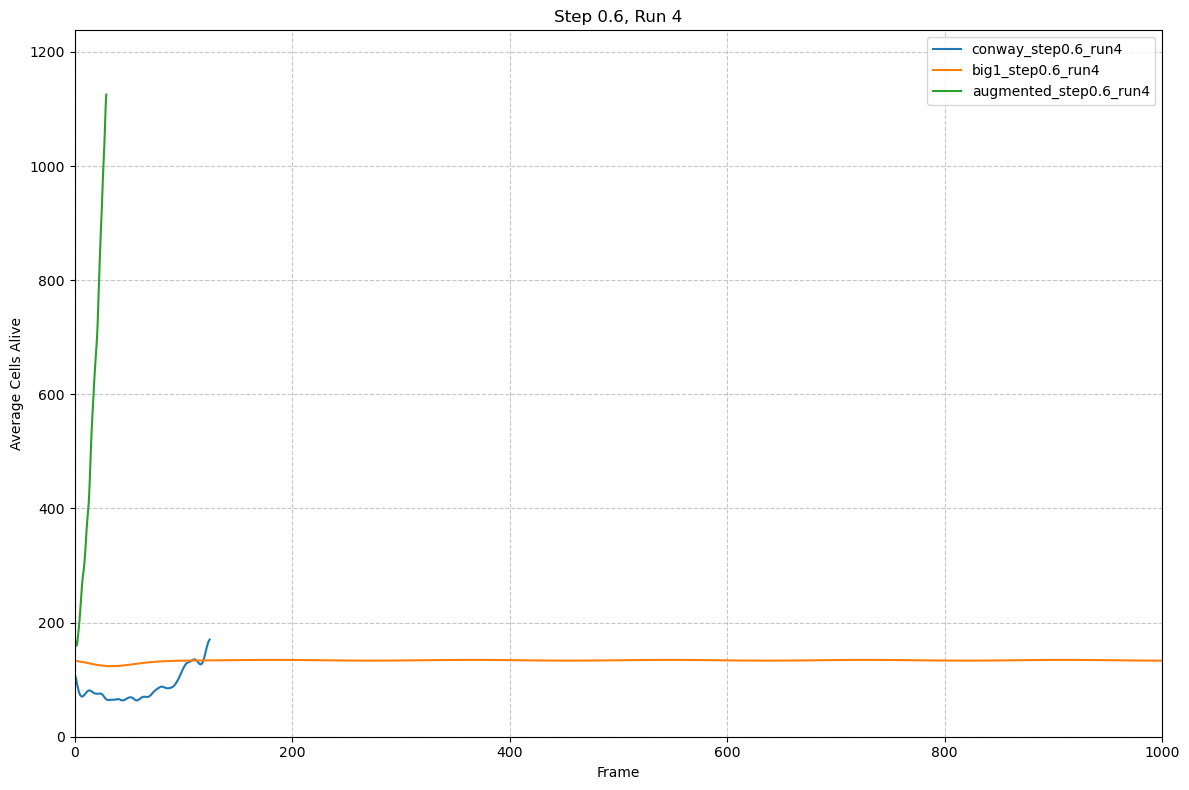

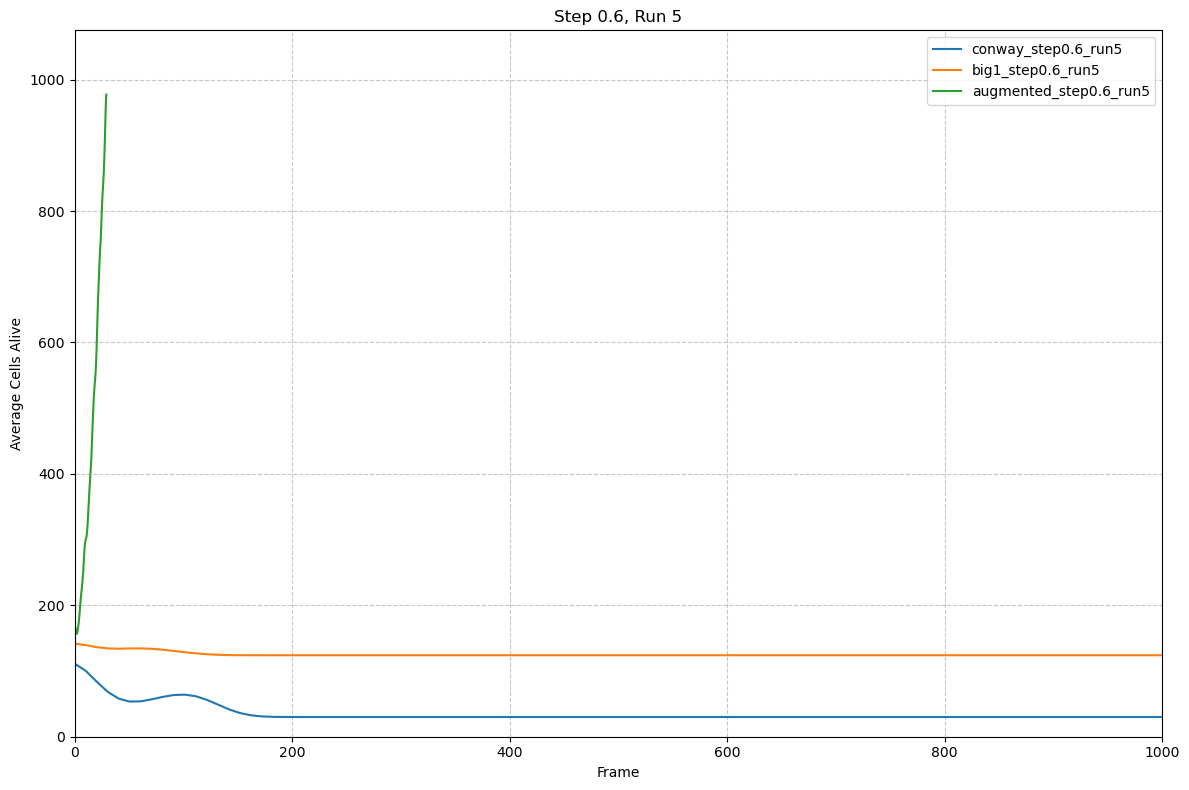

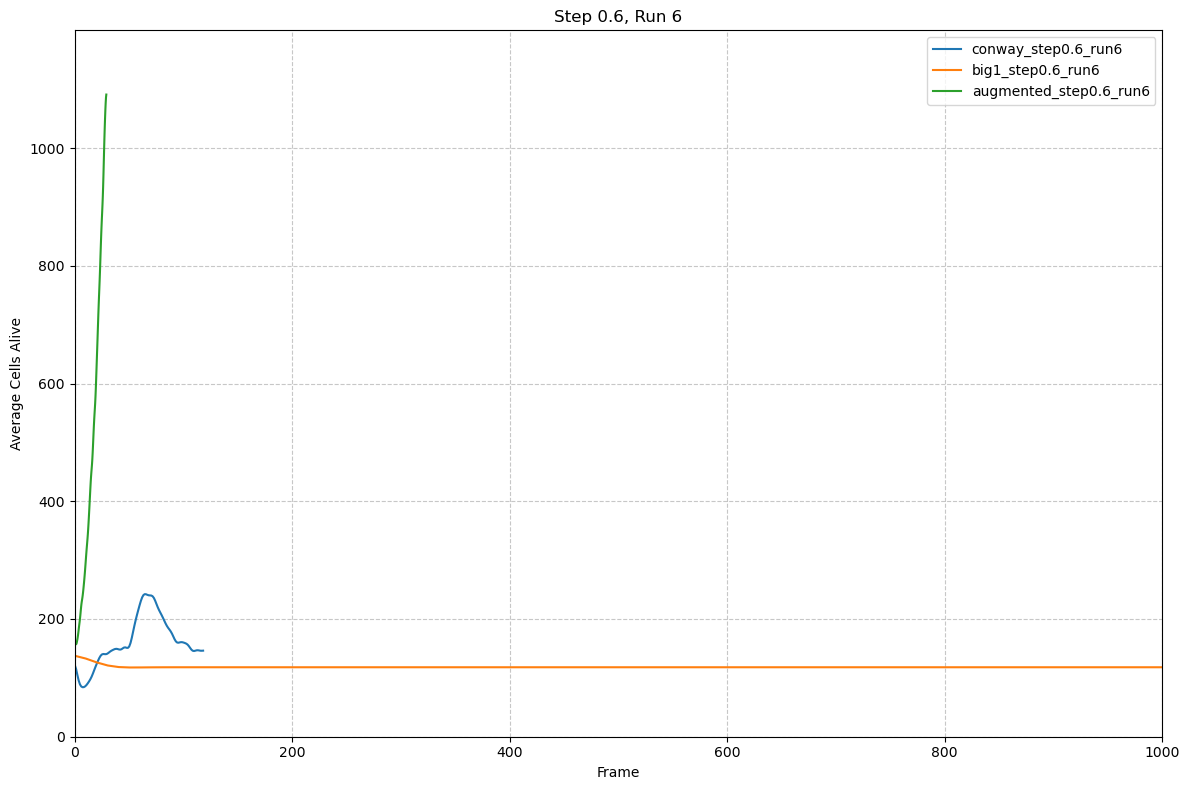

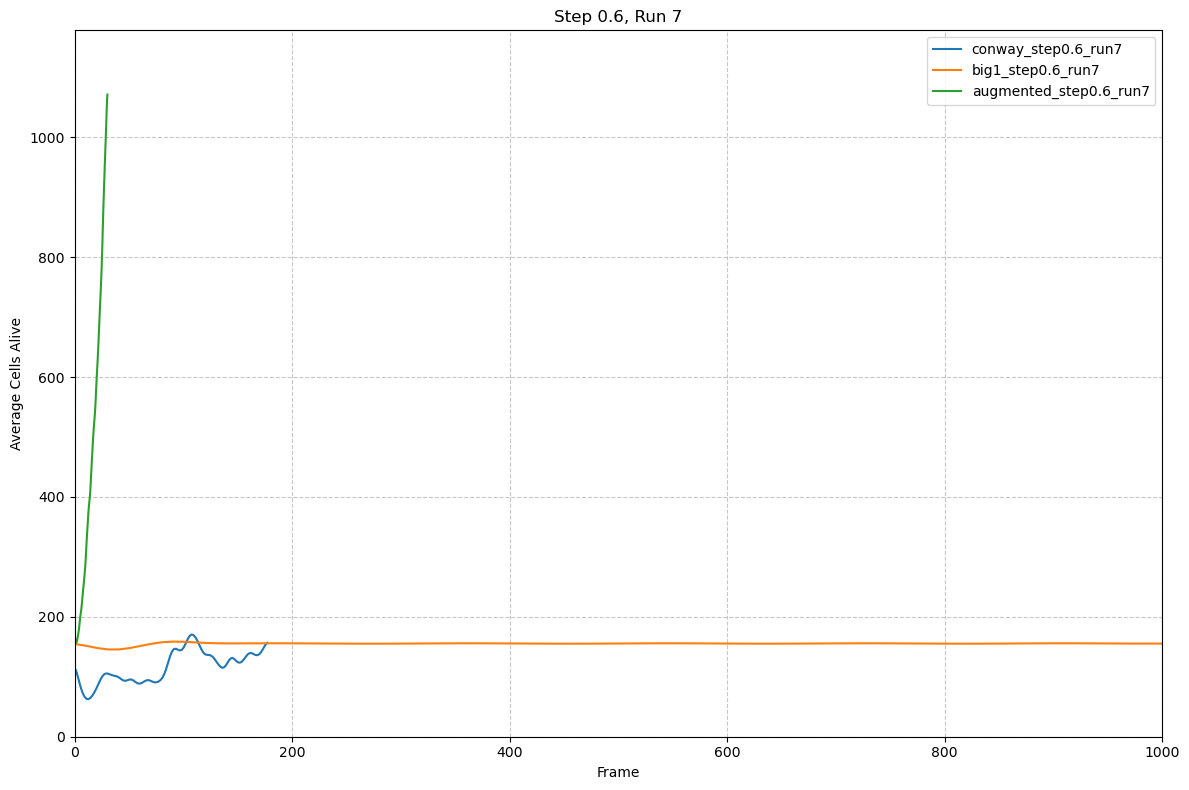

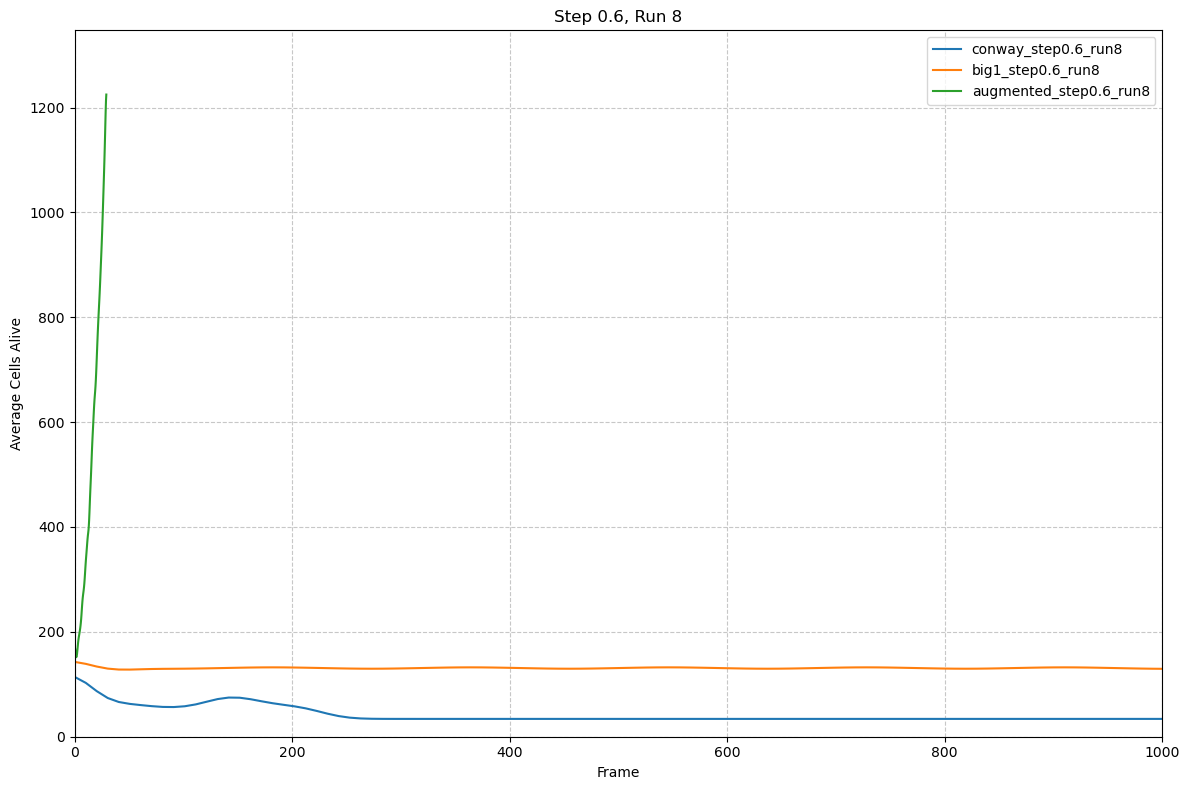

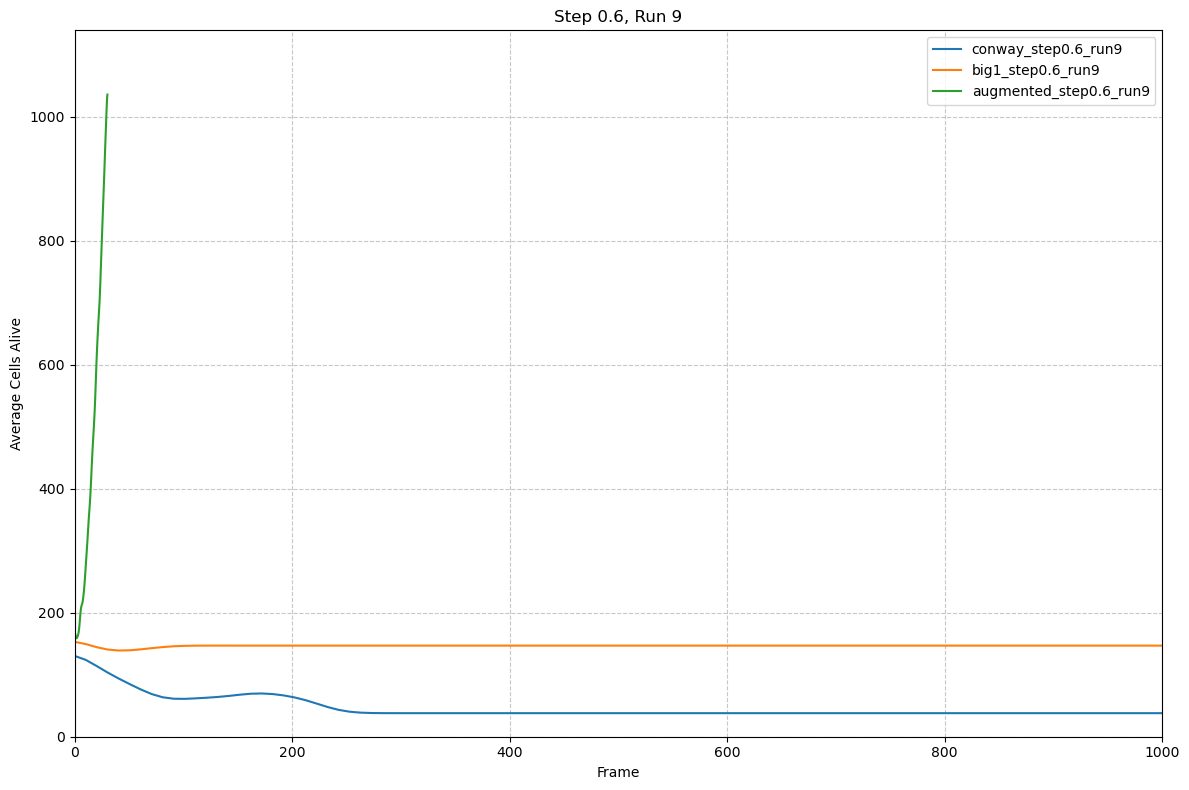

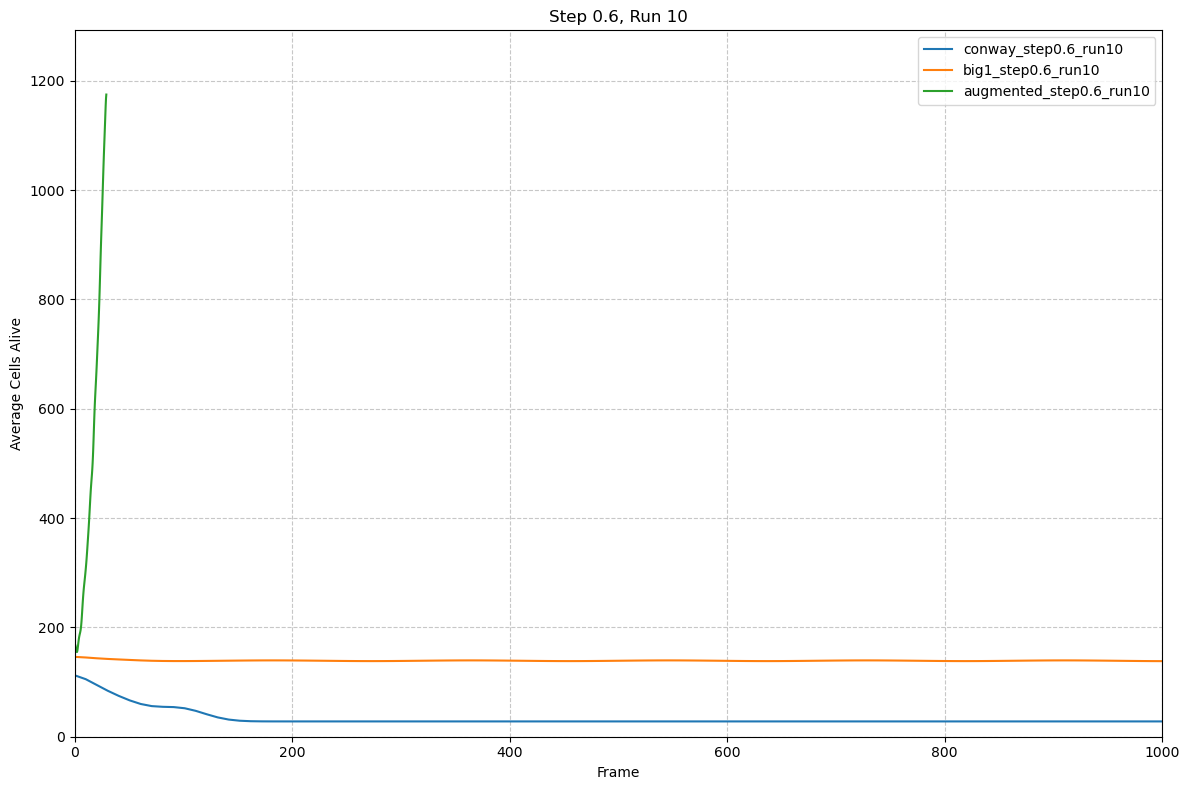

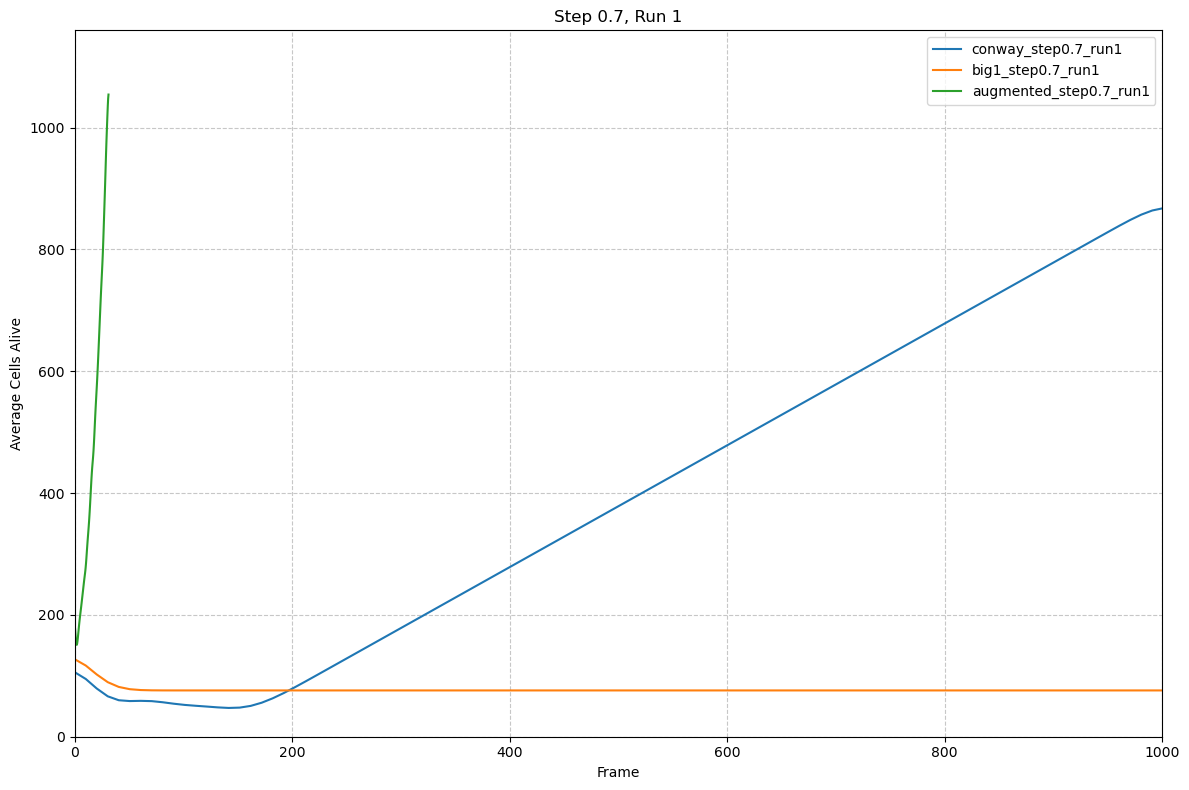

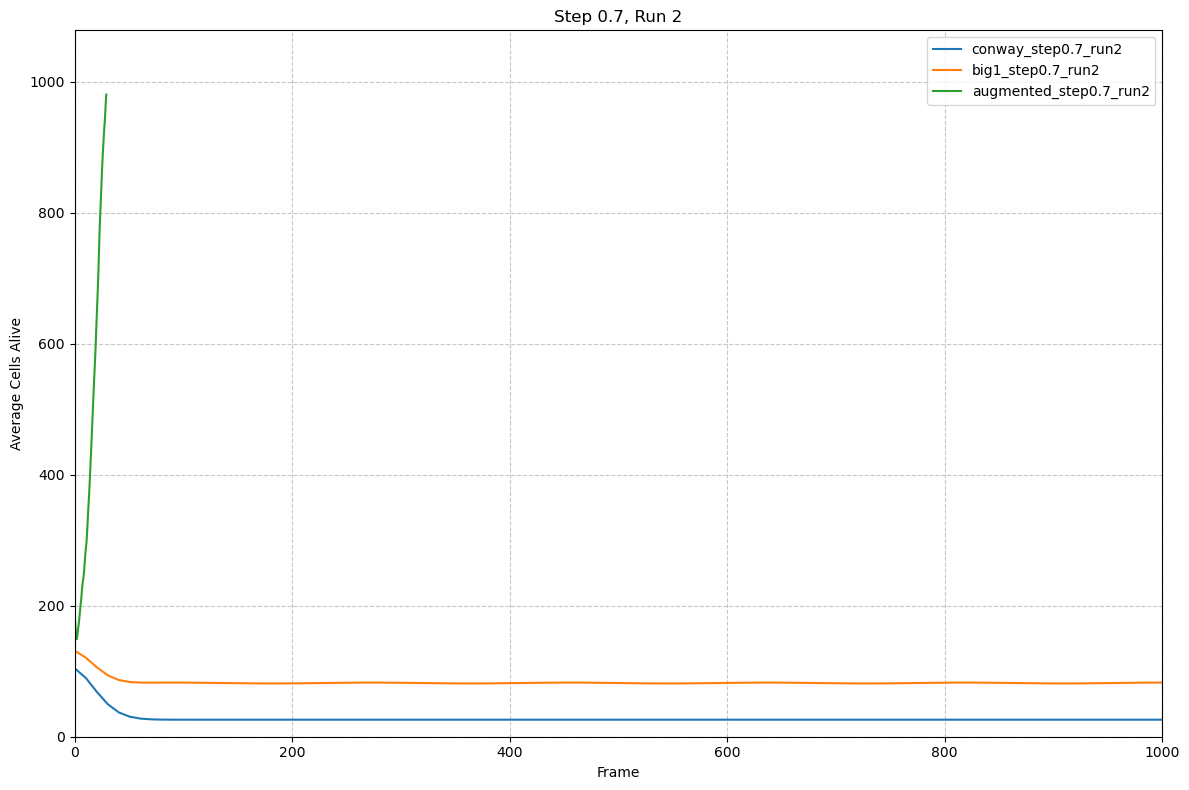

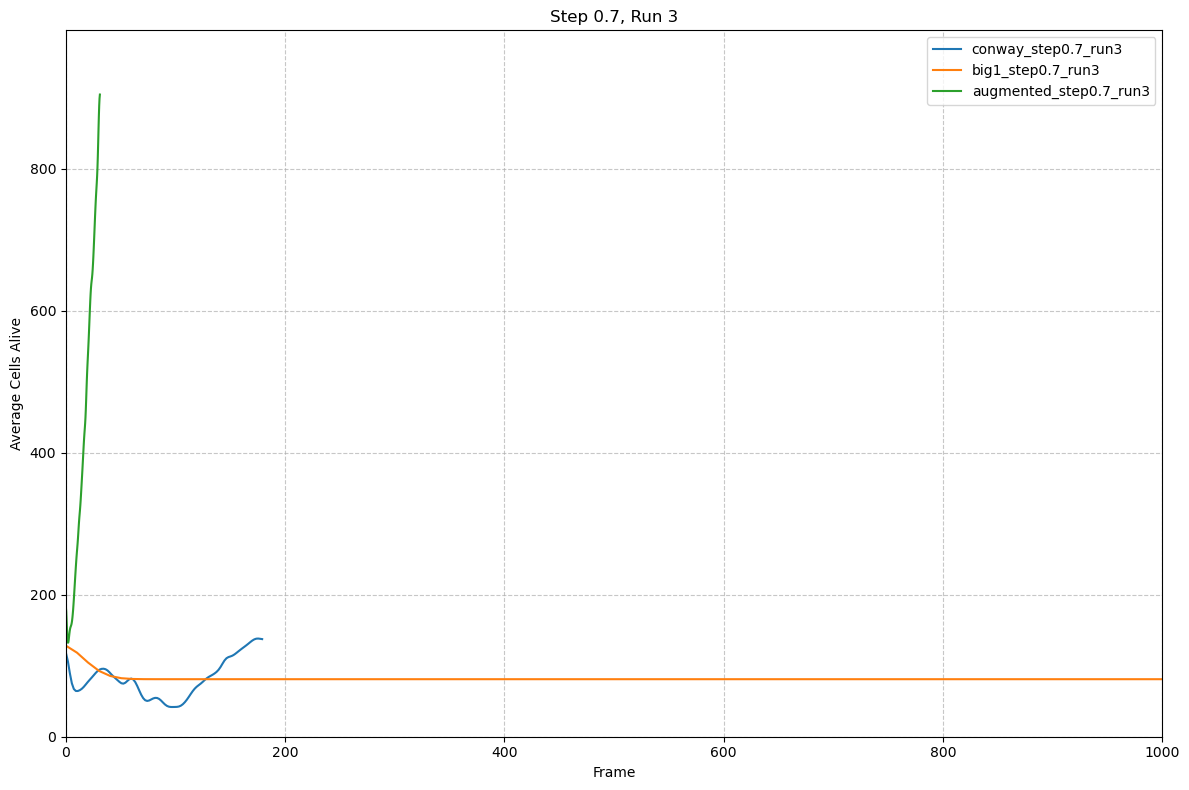

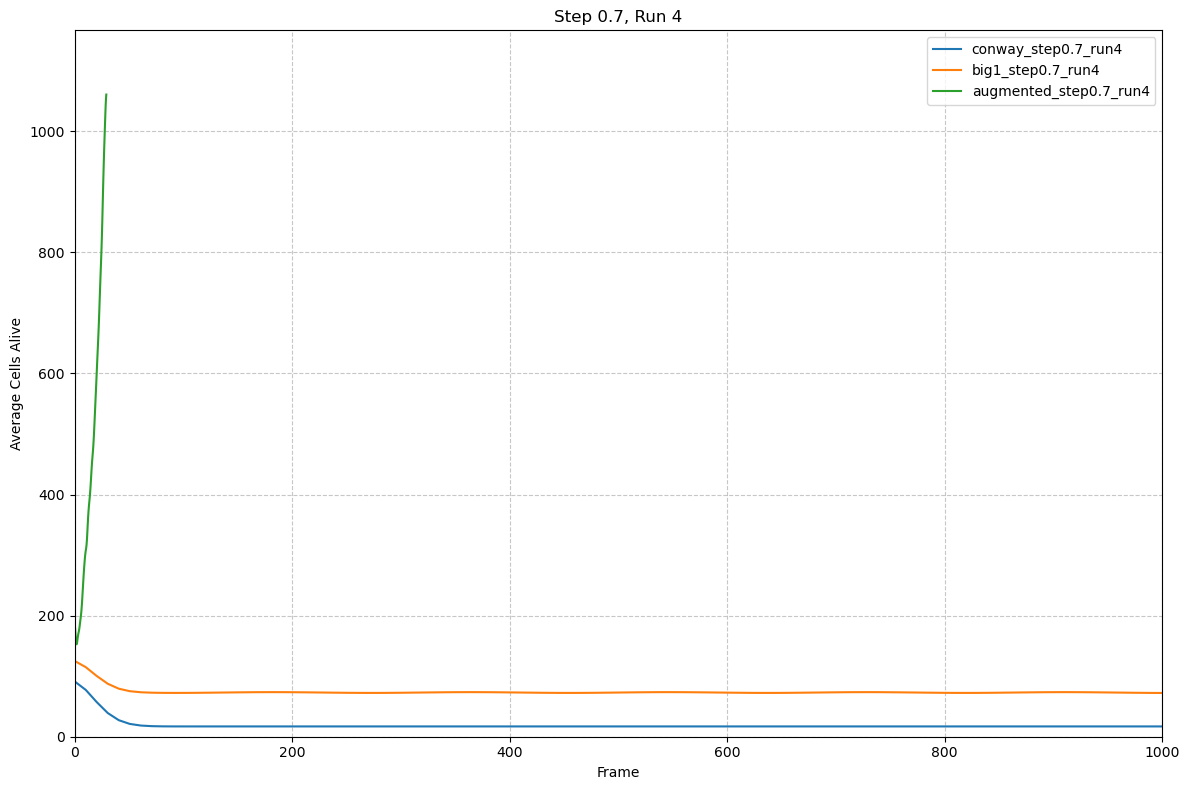

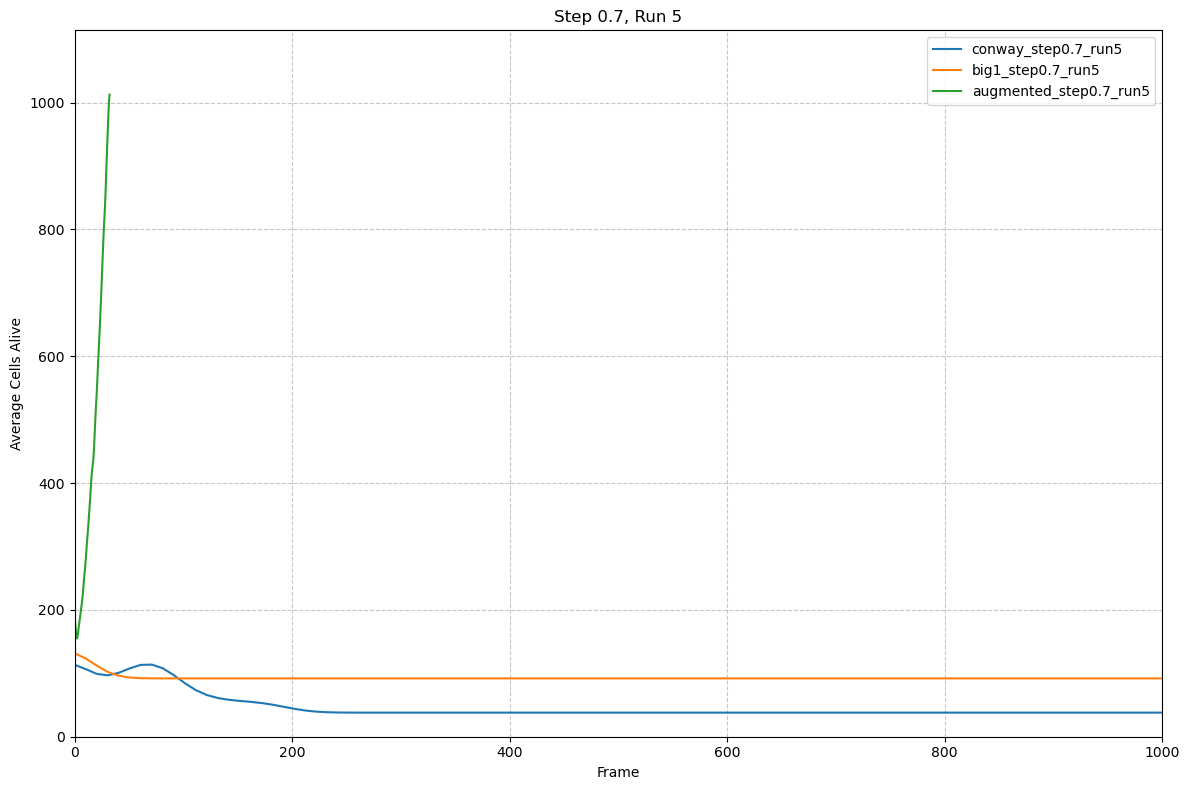

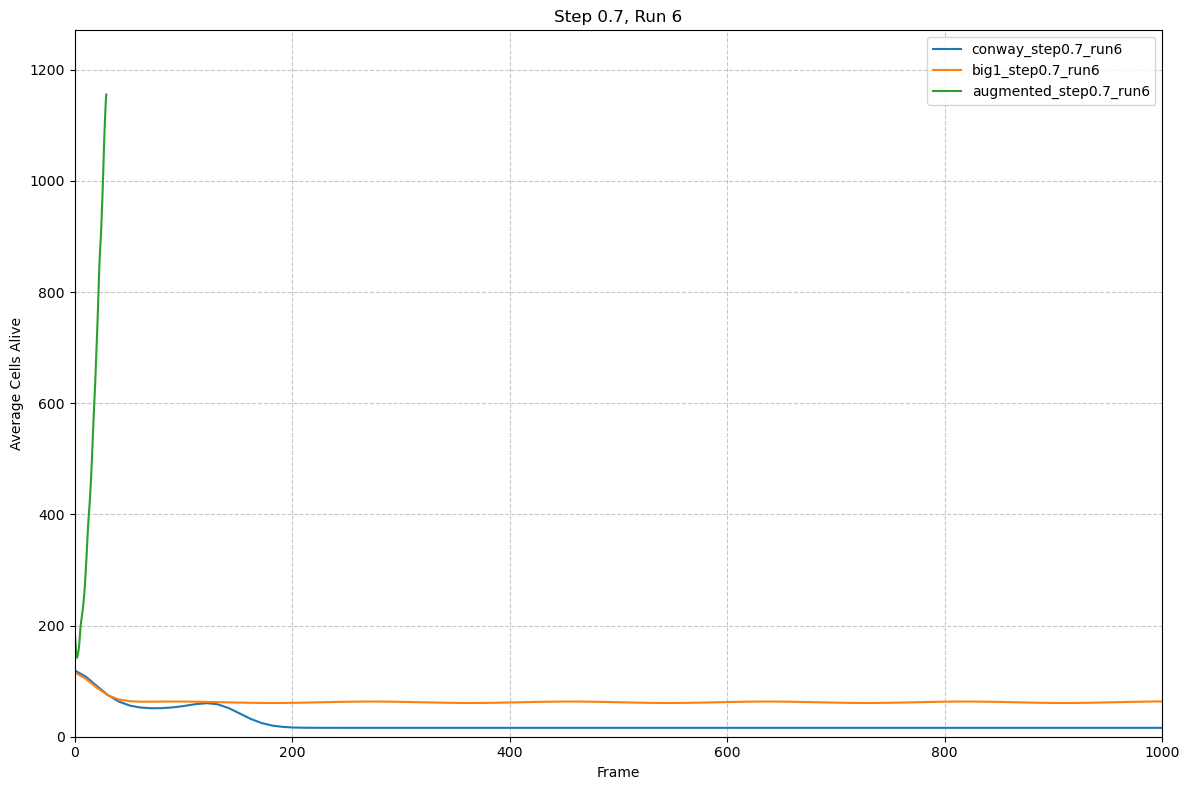

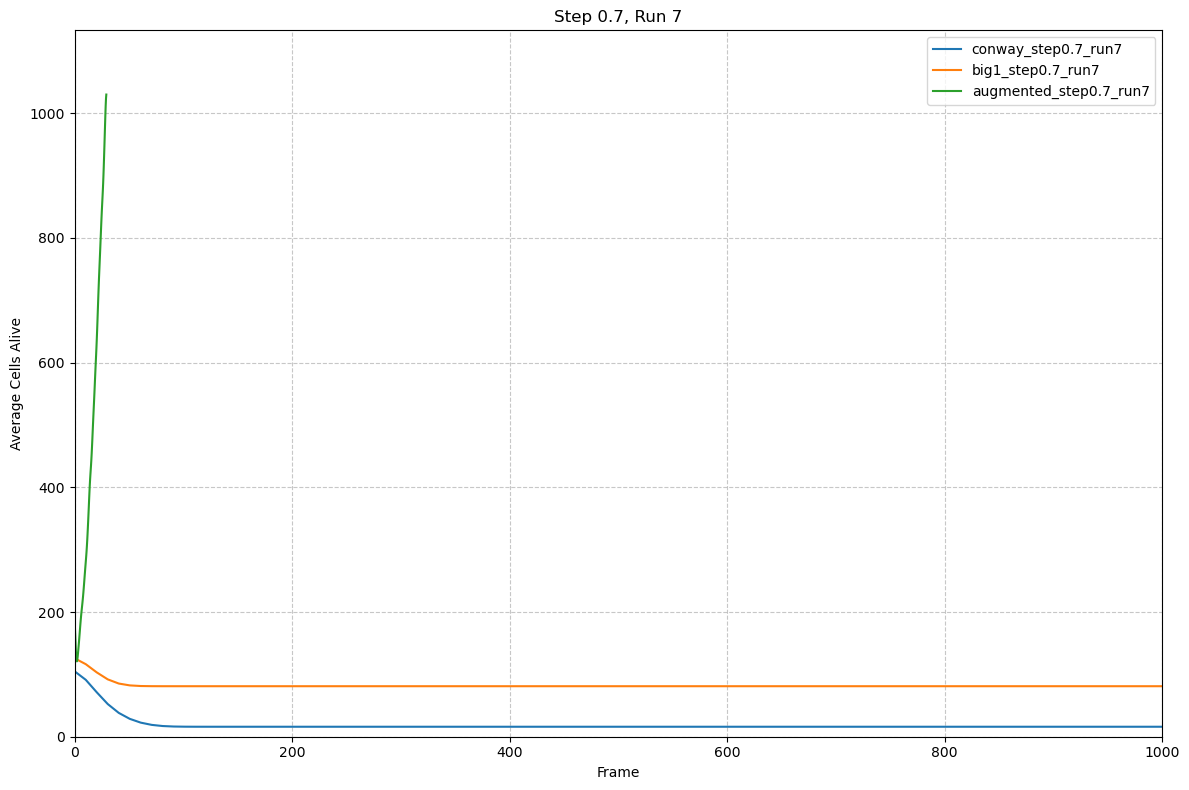

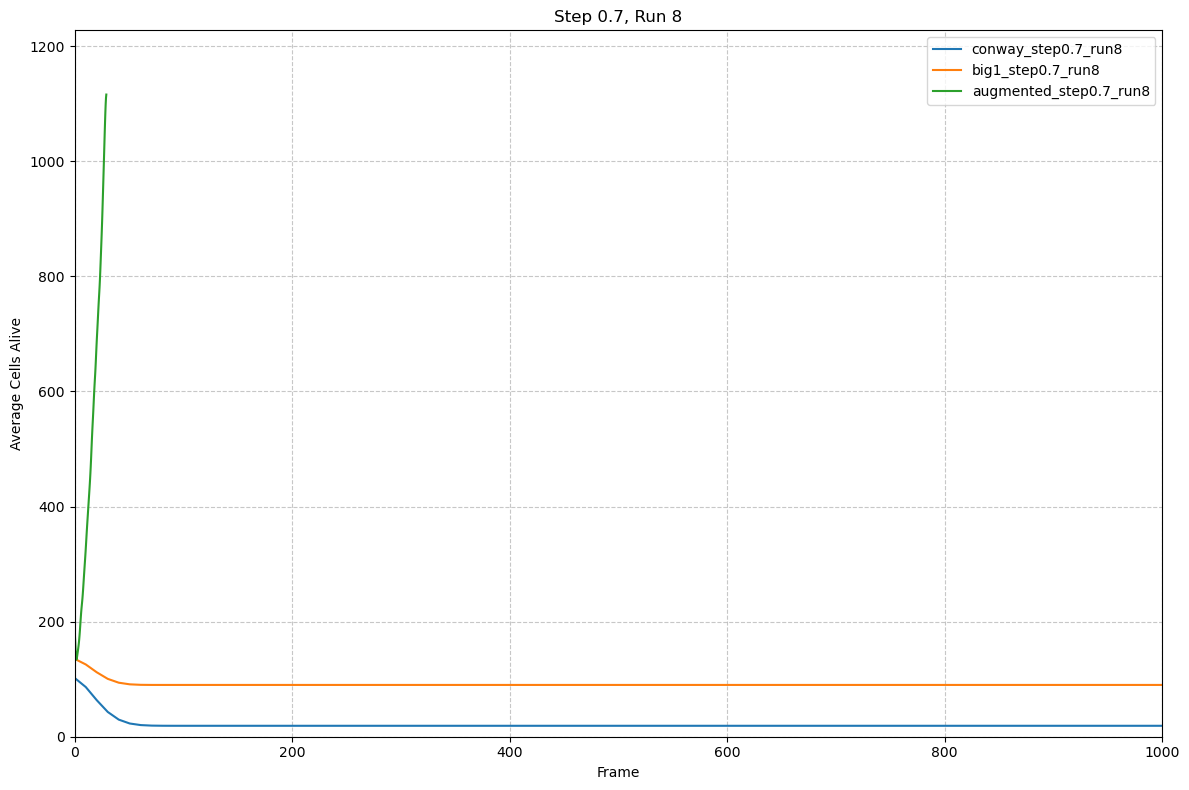

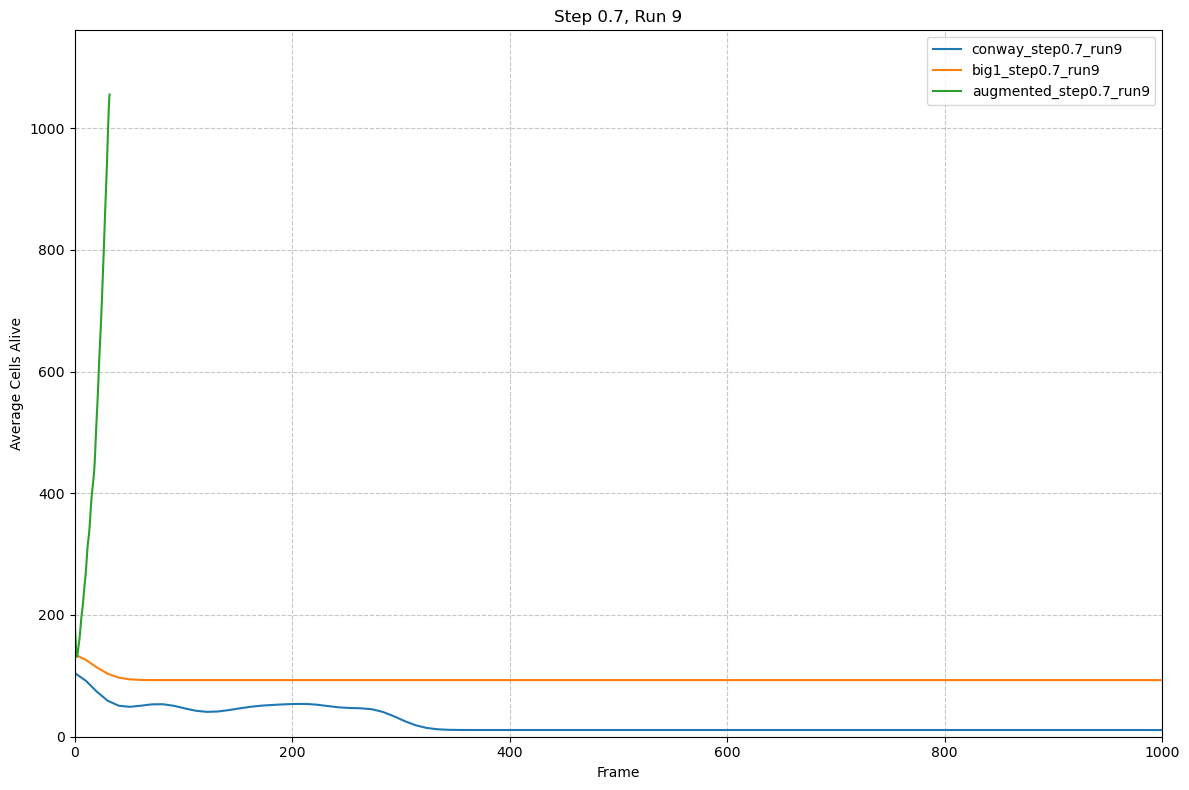

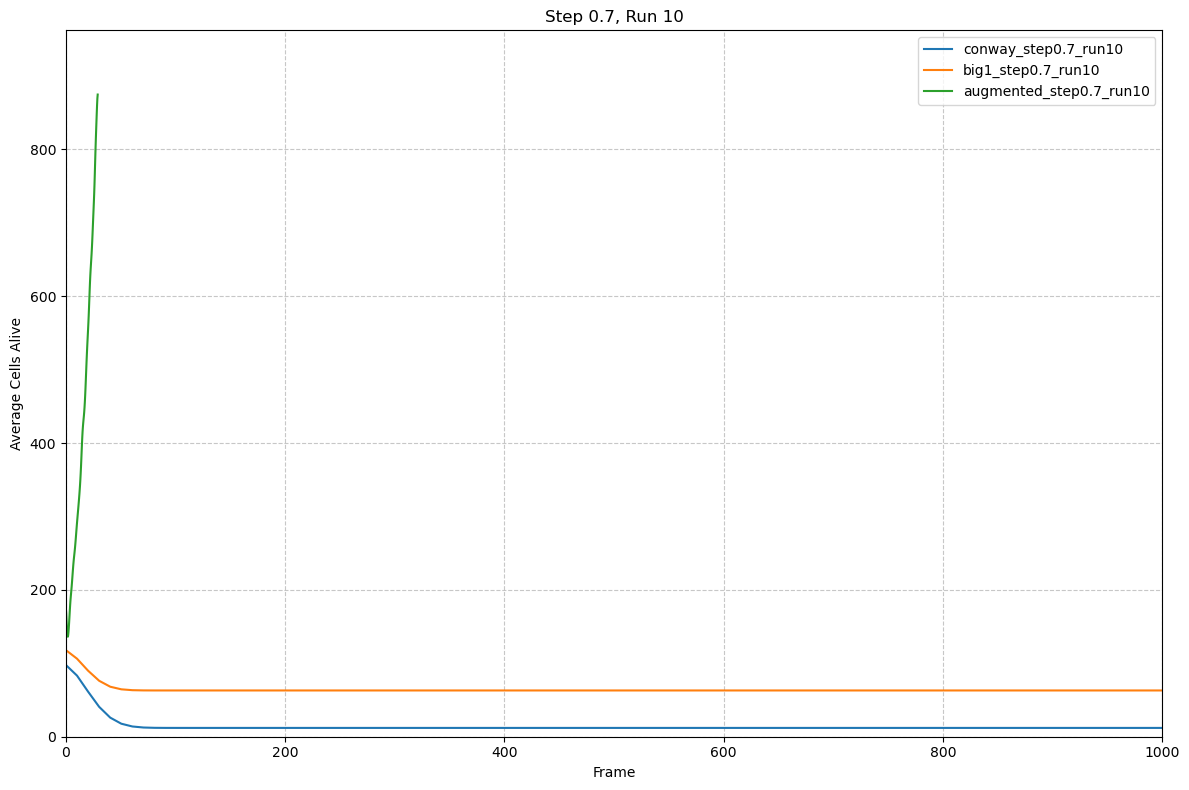

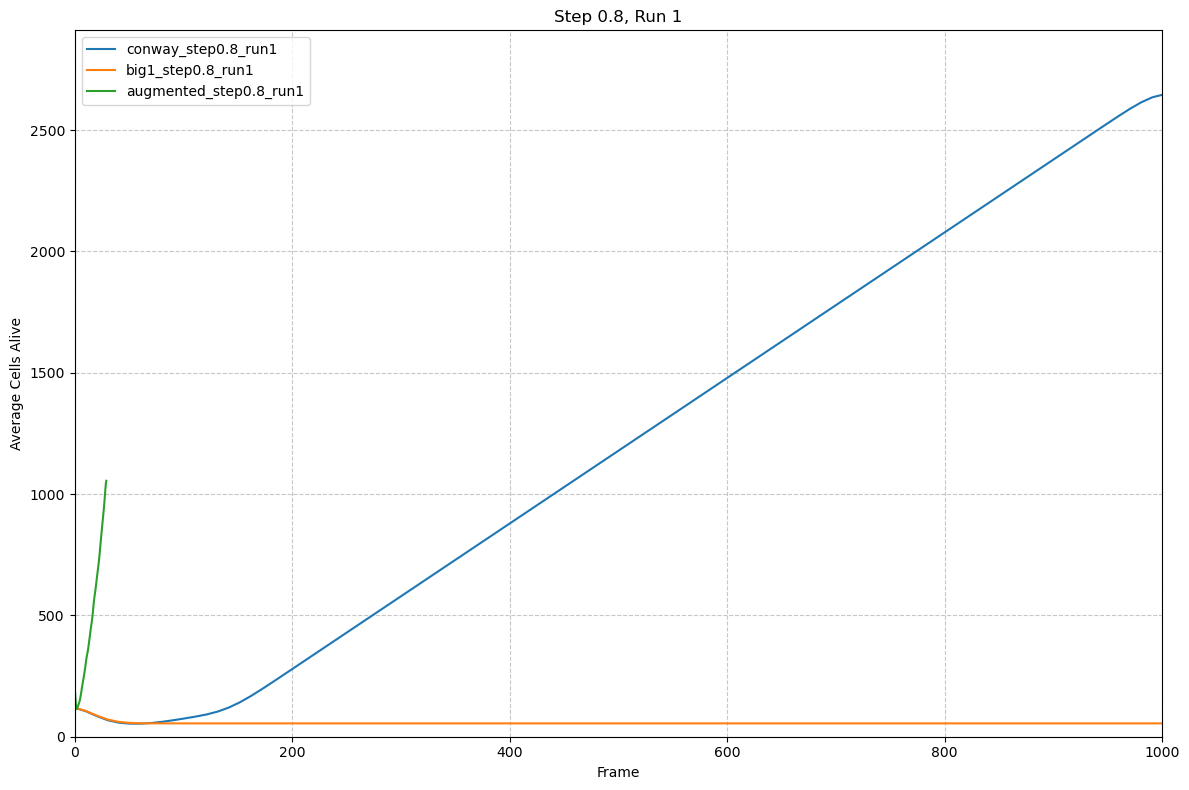

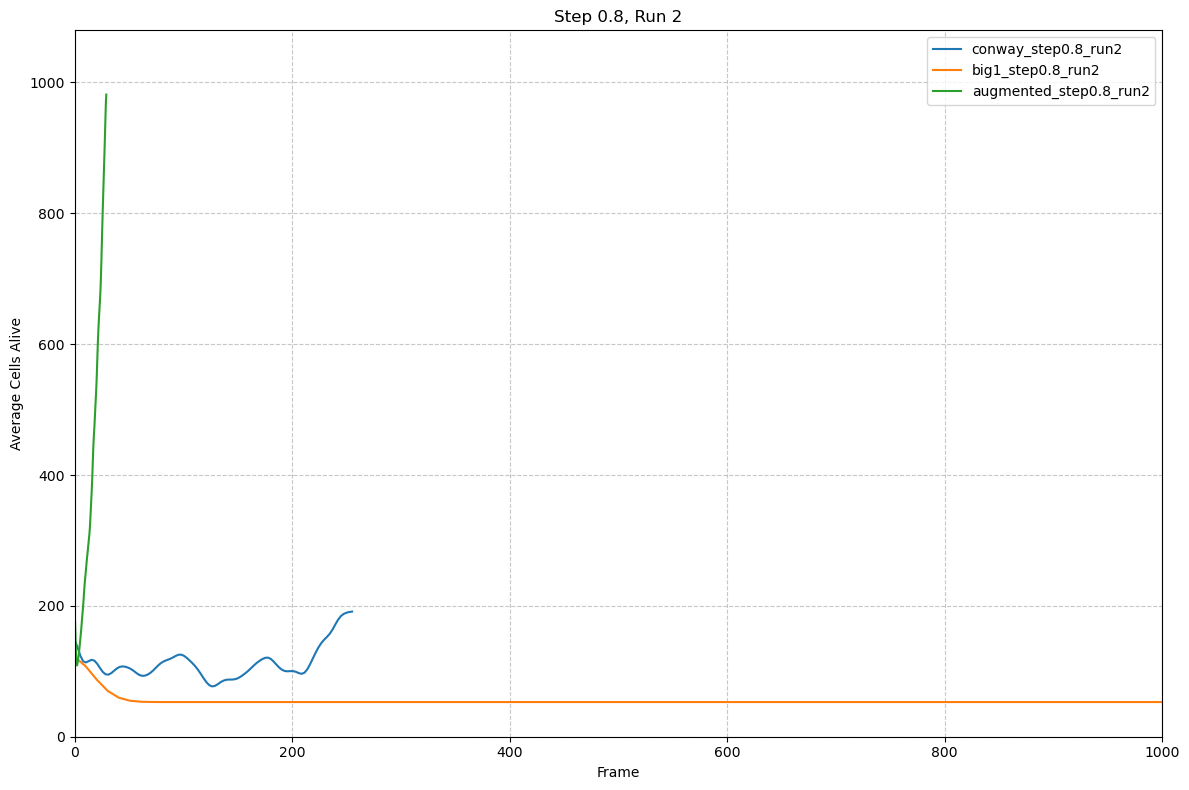

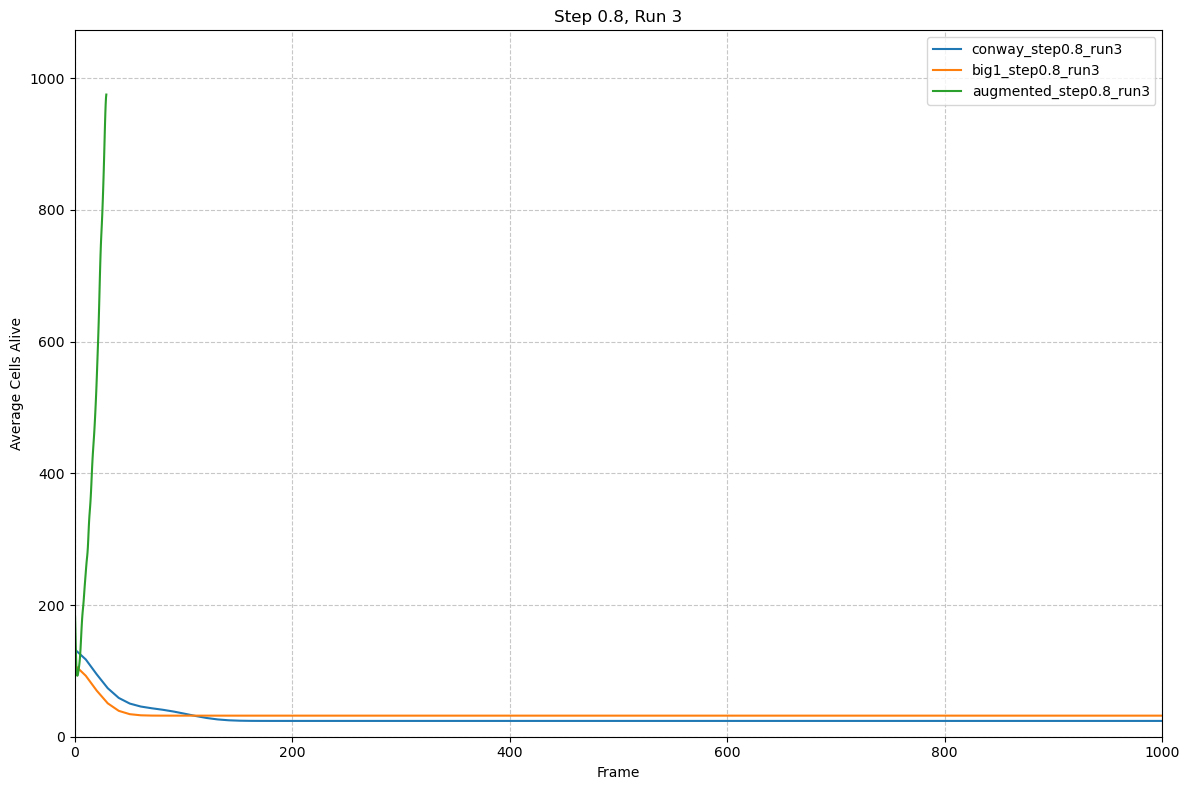

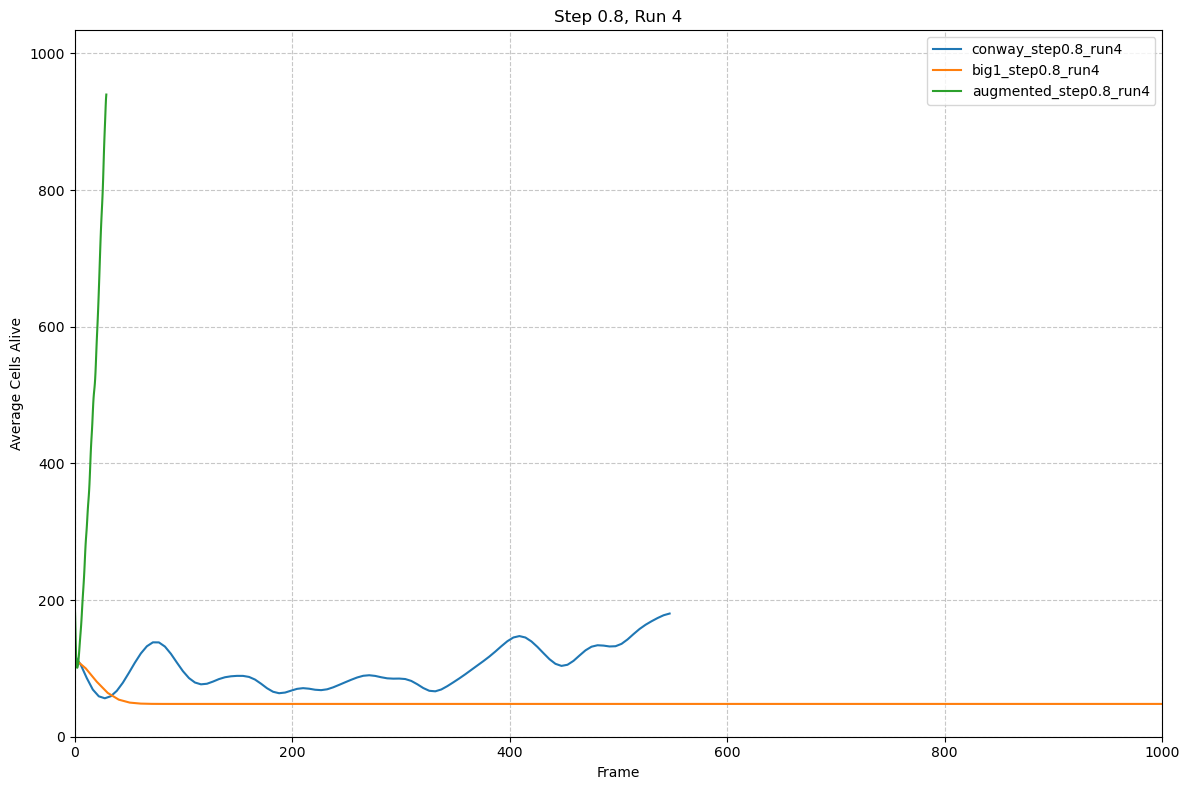

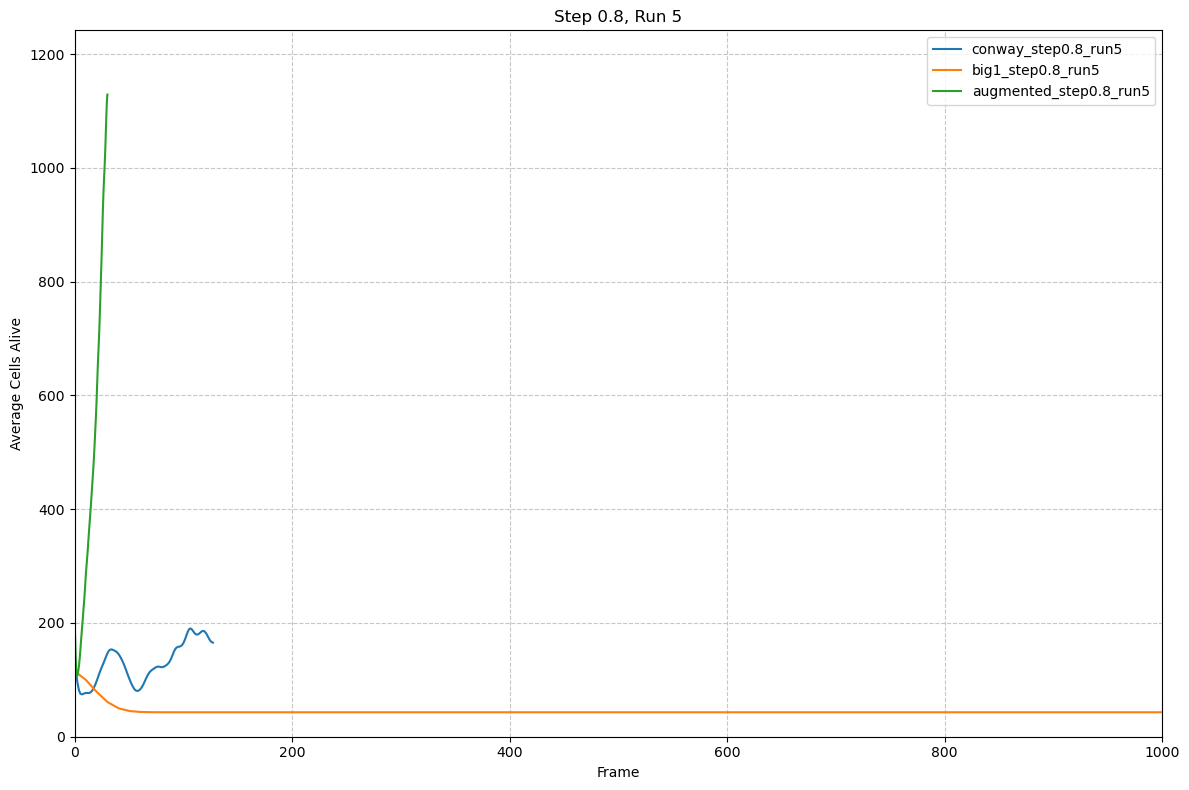

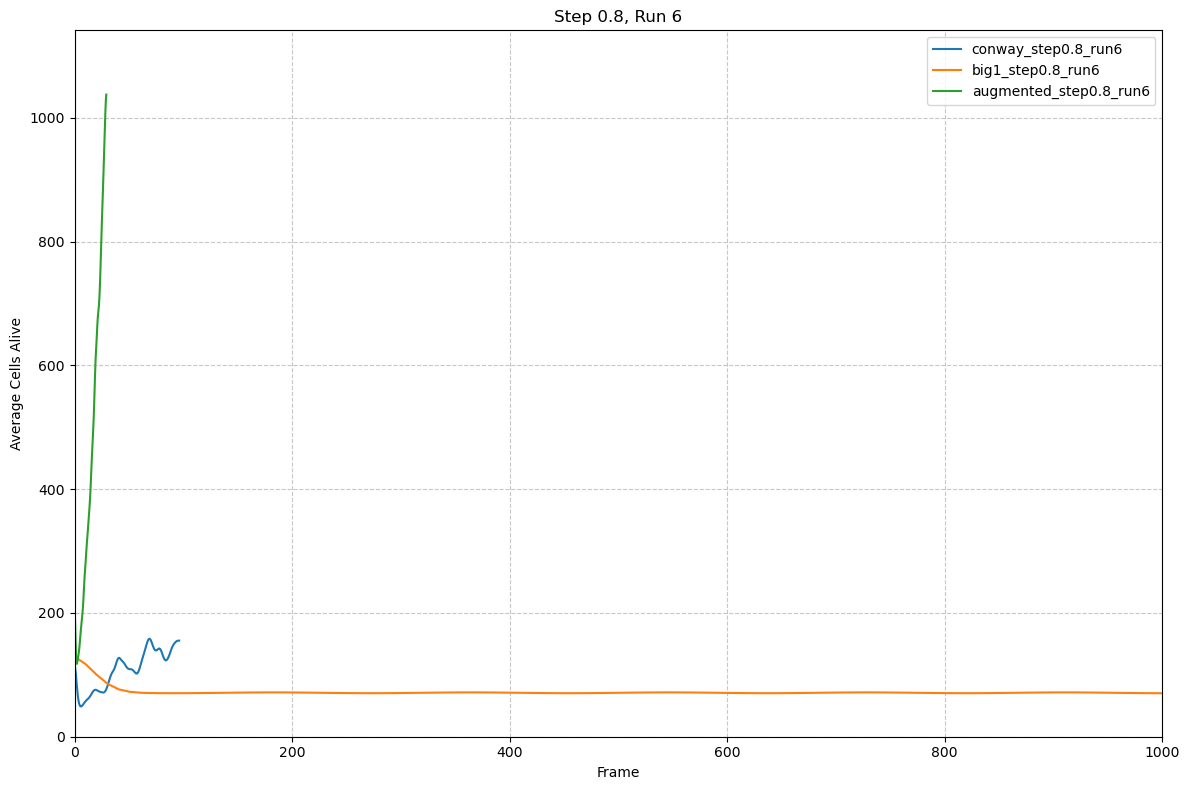

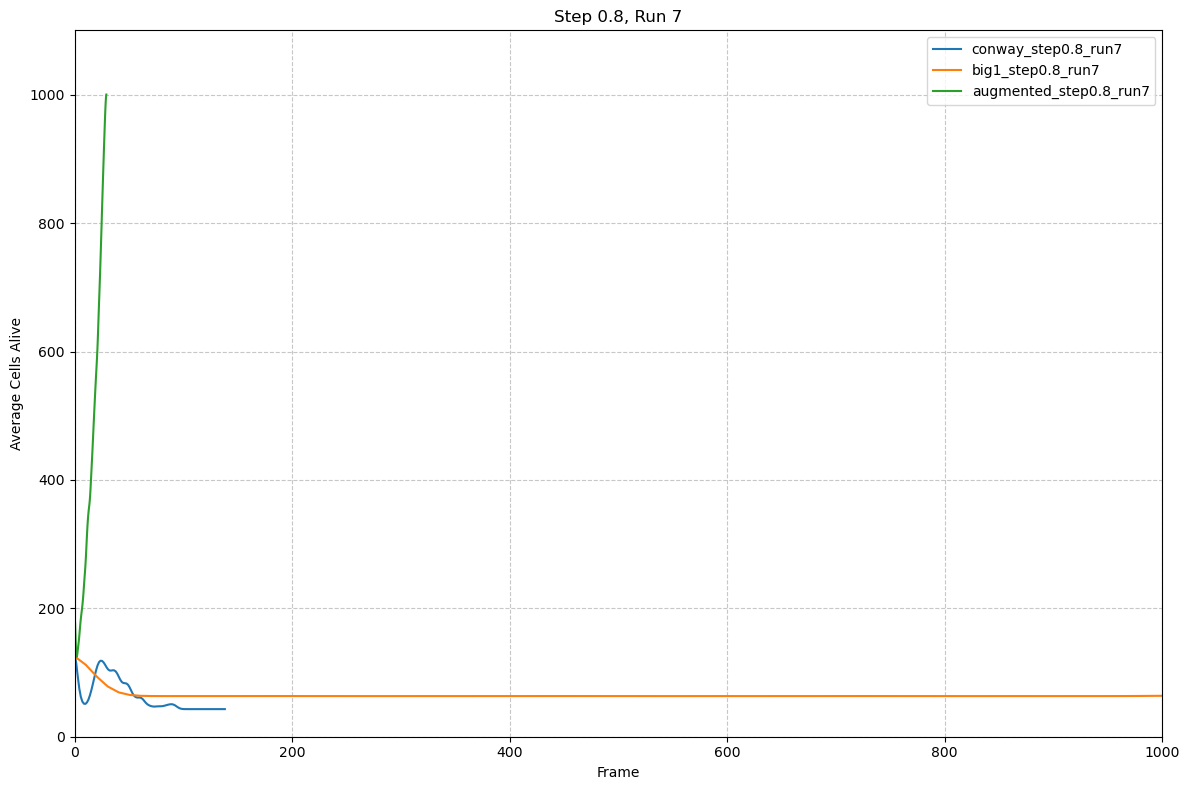

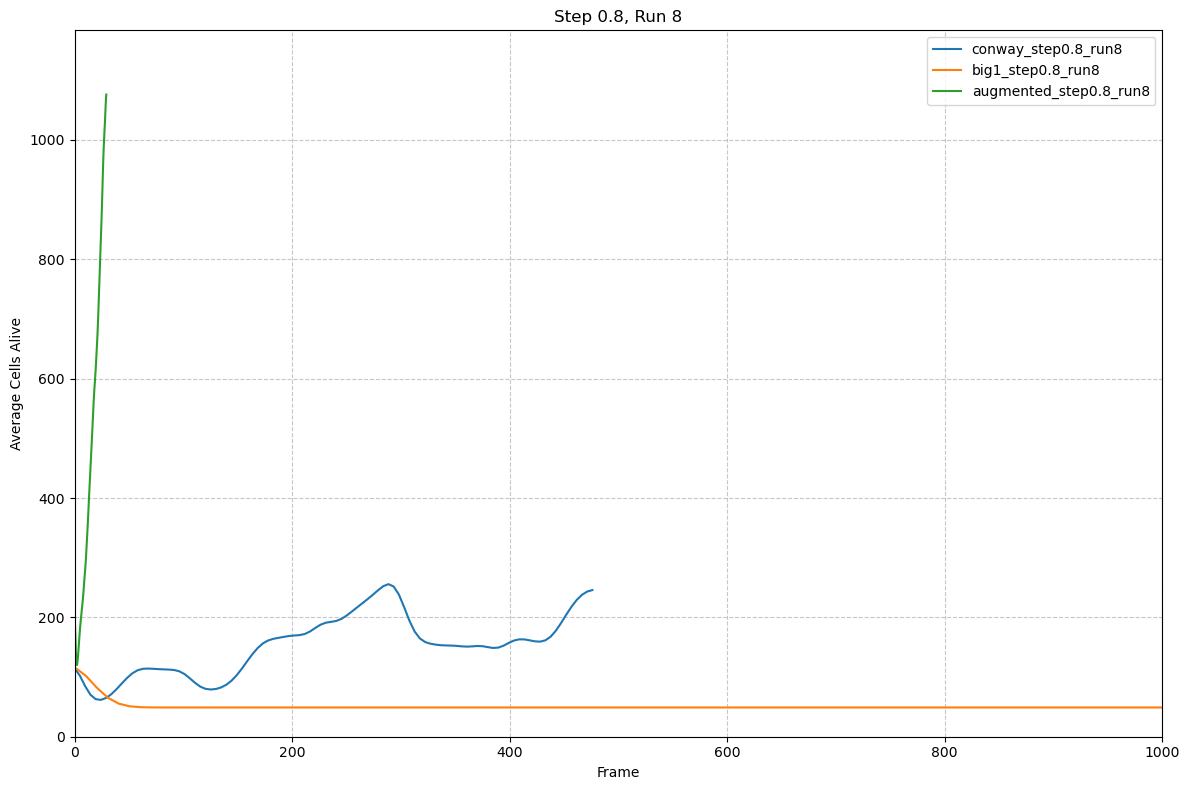

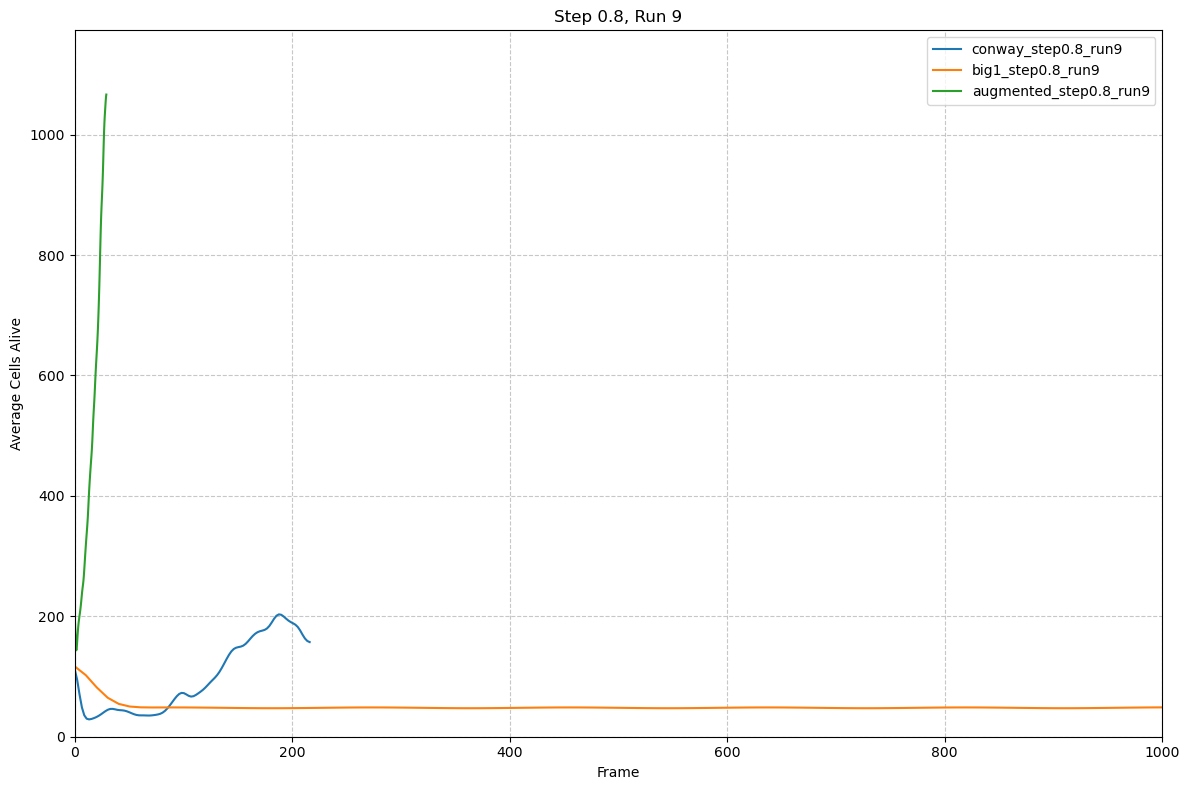

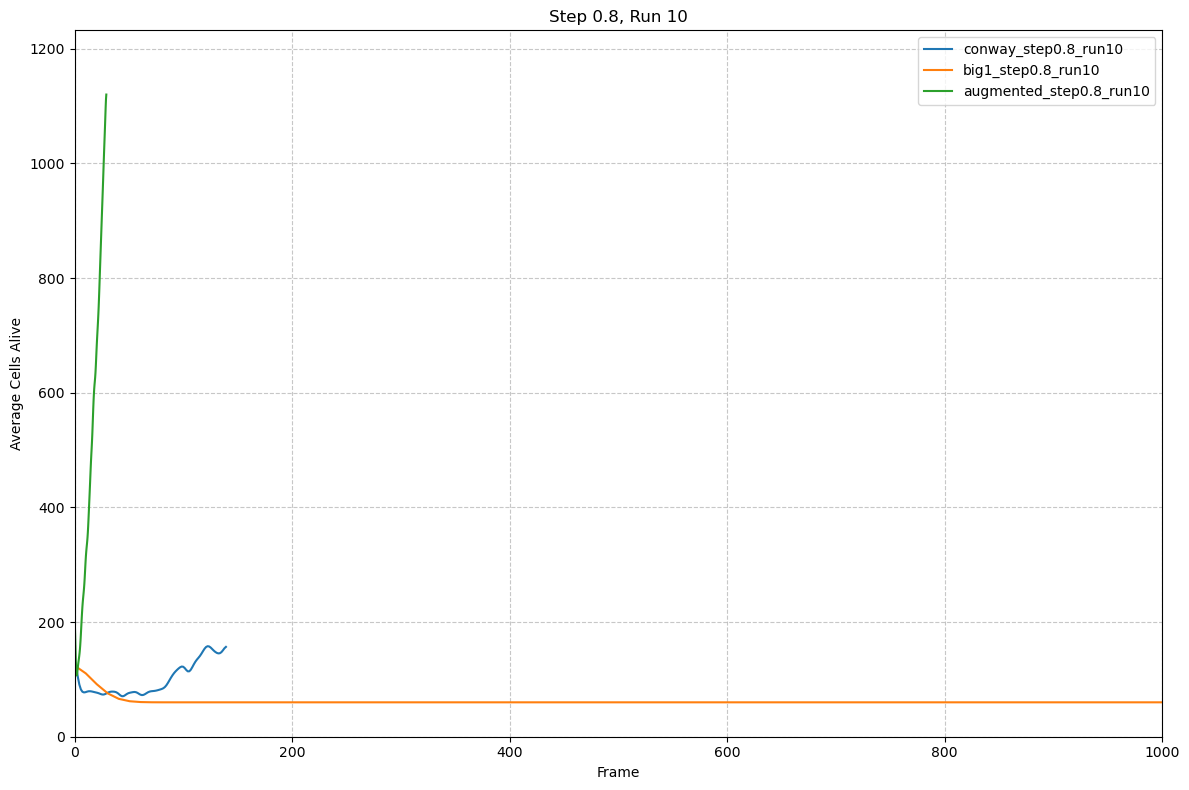

All plots have been generated and displayed.


In [42]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

# Function to process each file pattern and return interpolated and smoothed data
def process_files(file_pattern, label):
    file_names = glob.glob(file_pattern)
    data = []

    for file_name in file_names:
        df = pd.read_csv(file_name)
        frames = df["frame"].values  # Read the frame numbers directly
        cells_alive = df["average_alive_cells"].values
        data.append((frames, cells_alive))

    # Determine the maximum number of frames across all files
    max_frames = max(max(frames) for frames, _ in data)
    
    # Prepare for interpolation
    common_frames = np.linspace(0, max_frames, 100)  # 100 points from 0 to max_frames

    interpolated_data = []
    for frames, cells in data:
        interpolation_function = interp1d(
            frames, cells, kind="linear", fill_value="extrapolate"
        )
        interpolated_data.append(interpolation_function(common_frames))

    average_cells = np.mean(interpolated_data, axis=0)
    smooth_average_cells = gaussian_filter1d(average_cells, sigma=2)

    return common_frames, smooth_average_cells, label

# Define file patterns grouped by step and run
steps = ["0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8"]
systems = ["conway", "big1", "augmented"]
runs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Loop over each combination of step and run
for step in steps:
    for run in runs:
        fig, ax = plt.subplots(figsize=(12, 8))
        max_y_values = []

        for system in systems:
            file_pattern = f"../GOF/{system}_{step}_{run}*.csv"
            system_label = f"{system}_step{step}_run{run}"
            frames, smooth_cells, label = process_files(file_pattern, system_label)
            ax.plot(frames, smooth_cells, label=label)
            max_y_values.append(max(smooth_cells))

        # Set limits and labels
        ax.set_xlim(0, 1000)
        ax.set_ylim(0, max(max_y_values) * 1.1)
        ax.set_xlabel("Frame")
        ax.set_ylabel("Average Cells Alive")
        ax.set_title(f"Step {step}, Run {run}")
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)

        # Show the plot
        plt.tight_layout()
        plt.show()

# Notify that all plots have been generated and shown
print("All plots have been generated and displayed.")
